# Spotify 1928-2021 Top 100 Şarkı
## Veriseti Tanımı ve Proje Amacı
Her yıl için en çok dinlenen 100 şarkı bulunmaktadır ve bu şarkılar, **bulunduğu yılda çıkan diğer şarkılarla kıyaslanarak** ilk 100'e girmiştir. 

Amacımız bağımsız değişkenlerin bağımlı değişkene/değişkenlere olan etkisini inceleyip anlamlı bir çıkarım yapmaktır. Bunu yaparken gerek grafiklerden gerek makine öğrenmesinden gerek de dataframe'lerden faydalanacağız. 

Öncelikli olarak veriye genel bir bakış atıp değişkenlerini tanıtacağız. Ardından eksik değer olup olmadığını kontrol edeceğiz. Verideki değişkenleri grafiklere döküp yorumlayacak ve aykırı değerleri düzenlemeye çalışacağız. Makine öğrenmesine giriş yapıp doğrusal ve doğrusal olmayan regresyonları irdeleyeceğiz. Sınıflandırma problemlerinin farklı modellerini test edip son olarakta gözetimsiz öğrenmeye bakıp verisetimizi analiz etmeyi tamamlayacağız.

## 1. VERİYE İLK BAKIŞ

Sütun değerlerini şöyle açıklayabiliriz;
- **acousticness(akustiklik):** 0'dan 1'e kadar değer alan, akustiklik bilgisini verir (0 az 1 çok)
- **artists(sanatçılar):** sanatçı isimleri bu sütundadır
- **danceability(dans edilebilirlik):** 0'dan 1'e kadar değer alan, dans edilebilirlik bilgisini verir (0 az 1 çok)
- **duration_ms(süre_milisaniye):** milisaniye cinsinden şarkıların uzunluğunu verir. Genellikle 200k ile 300k arasında değer alır
- **energy(enerji):** ilgili parçanın enerji düzeyini 0 ile 1 arasındaki değerlerle ifade eder (0 az 1 çok)
- **explicit(+18 içerik):** ilgili parçanın seksüel içerik, şiddet, küfür vs içerip içermediğini gösterir. Aynı zamanda category değerlerdir (0 içermiyor 1 içeriyor)
- **id:** Spotify tarafından oluşturulan, parçanın kimlik numarasıdır ve benzersizdir. Aynı zamanda numerical değerlerdir
- **instrumentalness(araçsallık):** ilgili parçadaki enstürman yoğunluğunu 0 ile 1 arasındaki değerlerle ifade eder (0 az 1 çok)
- **key**: Oktav üzerindeki tüm tuşlar 0 ile 11 arasında değişen değerler olarak kodlanmıştır. C ile 0, C # ile 1 vs. şeklinde devam eder.
- **liveness(canlılık):** ilgili parçanın canlılık düzeyini 0 ile 1 arasındaki değerlerle ifade eder (0 az 1 çok)
- **loudness(ses yüksekliği):** parçanın gürültüsünü -60 ile 0 değerleri arasında gösterir (-60 çok 0 az)
- **mode(mod):** parçanın modunu 0 veya 1 değerleri ile gösterir (0 minör 1 majör)
- **NOT: Temel olarak minör, daha hüzünlü şarkıları temsil ederken majör, daha mutlu şarkıları temsil eder diyebiliriz**
- **name(isim):** parça isimleri bu sütundadır
- **popularity(popülerlik):** parçanın popülerliğini 0'dan 100'e kadar olan değerlerle gösterir (0 az 100 çok)
- **release_date(yayınlanma tarihi):** parçanın yayınlandığı tarihi (mümkünse gün-ay-yıl şeklinde) gösterir.
- **speechiness(konuşkanlık):** parçadaki konuşkanlık oranını 0 ile 1 arasındaki değerlerle gösterir (0 az 1 çok)
- **tempo:** tipik olarak 50 ile 150 arasındaki değerlerle ifade edilen, parça hızını temsil eder (50 yavaş 150 hızlı)
- **valence(valens):** parçanın valens değeri arttıkça pozitifliği artarken bu değer azalınca da negatifliği artar. 0 ile 1 arasında değerler alır (0 negatif 1 pozitif)
- **year(yıl):** parçanın yayınlandığı yılı gösterir

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp
import statsmodels.api as sm
import statsmodels.formula.api as smf
import xgboost as xgb

from pandas.api.types import CategoricalDtype
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV

from sklearn.svm import SVR
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

from skompiler import skompile
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from lightgbm import LGBMRegressor
from datetime import datetime

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

In [2]:
%matplotlib inline

In [3]:
spotify = pd.read_csv("spotify.csv") # csv dosyasını dizinden okuduk ve spotify değişkenine atadık
spotify # spotify değişkenini çağırdık. Veriler çok fazla olduğundan read komutu tablonun head&tail kısımlarını bize gösterdi

acousticness                                   artists  danceability  \
0             0.9950                       ['Carl Woitschach']         0.708   
1             0.9940  ['Robert Schumann', 'Vladimir Horowitz']         0.379   
2             0.6040                   ['Seweryn Goszczyński']         0.749   
3             0.9950                      ['Francisco Canaro']         0.781   
4             0.9900  ['Frédéric Chopin', 'Vladimir Horowitz']         0.210   
...              ...                                       ...           ...   
169904        0.1730                    ['DripReport', 'Tyga']         0.875   
169905        0.0167        ['Leon Bridges', 'Terrace Martin']         0.719   
169906        0.5380                     ['Kygo', 'Oh Wonder']         0.514   
169907        0.0714             ['Cash Cash', 'Andy Grammer']         0.646   
169908        0.1090                        ['Ingrid Andress']         0.512   

        duration_ms  energy  explicit                      id  \
0            158648  0.1950         0  6KbQ3uYMLKb5jDxLF7wYDD   
1            282133  0.0135         0  6KuQTIu1KoTTkLXKrwlLPV   
2            104300  0.2200         0  6L63VW0PibdM1HDSBoqnoM   
3            180760  0.1300         0  6M94FkXd15sOAOQYRnWPN8   
4            687733  0.2040         0  6N6tiFZ9vLTSOIxkj8qKrd   
...             ...     ...       ...                     ...   
169904       163800  0.4430         1  4KppkflX7I3vJQk7urOJaS   
169905       167468  0.3850         0  1ehhGlTvjtHo2e4xJFB0SZ   
169906       180700  0.5390         0  52eycxprLhK3lPcRLbQiVk   
169907       167308  0.7610         0  3wYOGJYD31sLRmBgCvWxa4   
169908       214787  0.4280         0  60RFlt48hm0l4Fu0JoccOl   

        instrumentalness  key  liveness  loudness  mode  \
0               0.563000   10    0.1510   -12.428     1   
1               0.901000    8    0.0763   -28.454     1   
2               0.000000    5    0.1190   -19.924     0   
3               0.887000    1    0.1110   -14.734     0   
4               0.908000   11    0.0980   -16.829     1   
...                  ...  ...       ...       ...   ...   
169904          0.000032    1    0.0891    -7.461     1   
169905          0.031300    8    0.1110   -10.907     1   
169906          0.002330    7    0.1080    -9.332     1   
169907          0.000000    1    0.2220    -2.557     1   
169908          0.000000    0    0.1050    -7.387     1   

                                                 name  popularity  \
0                         Singende Bataillone 1. Teil           0   
1            Fantasiestücke, Op. 111: Più tosto lento           0   
2                      Chapter 1.18 - Zamek kaniowski           0   
3       Bebamos Juntos - Instrumental (Remasterizado)           0   
4         Polonaise-Fantaisie in A-Flat Major, Op. 61           1   
...                                               ...         ...   
169904                  Skechers (feat. Tyga) - Remix          75   
169905                 Sweeter (feat. Terrace Martin)          64   
169906                               How Would I Know          70   
169907                                    I Found You          70   
169908                          More Hearts Than Mine          65   

       release_date  speechiness    tempo  valence  year  
0              1928       0.0506  118.469   0.7790  1928  
1              1928       0.0462   83.972   0.0767  1928  
2              1928       0.9290  107.177   0.8800  1928  
3        1928-09-25       0.0926  108.003   0.7200  1928  
4              1928       0.0424   62.149   0.0693  1928  
...             ...          ...      ...      ...   ...  
169904   2020-05-15       0.1430  100.012   0.3060  2020  
169905   2020-06-08       0.0403  128.000   0.2700  2020  
169906   2020-05-29       0.1050  123.700   0.1530  2020  
169907   2020-02-28       0.0385  129.916   0.4720  2020  
169908   2020-03-27       0.0271   80.588   0.3660  2020  

[169909 rows x 19 c

In [4]:
spotify.tail()

acousticness                             artists  danceability  \
169904        0.1730              ['DripReport', 'Tyga']         0.875   
169905        0.0167  ['Leon Bridges', 'Terrace Martin']         0.719   
169906        0.5380               ['Kygo', 'Oh Wonder']         0.514   
169907        0.0714       ['Cash Cash', 'Andy Grammer']         0.646   
169908        0.1090                  ['Ingrid Andress']         0.512   

        duration_ms  energy  explicit                      id  \
169904       163800   0.443         1  4KppkflX7I3vJQk7urOJaS   
169905       167468   0.385         0  1ehhGlTvjtHo2e4xJFB0SZ   
169906       180700   0.539         0  52eycxprLhK3lPcRLbQiVk   
169907       167308   0.761         0  3wYOGJYD31sLRmBgCvWxa4   
169908       214787   0.428         0  60RFlt48hm0l4Fu0JoccOl   

        instrumentalness  key  liveness  loudness  mode  \
169904          0.000032    1    0.0891    -7.461     1   
169905          0.031300    8    0.1110   -10.907     1   
169906          0.002330    7    0.1080    -9.332     1   
169907          0.000000    1    0.2220    -2.557     1   
169908          0.000000    0    0.1050    -7.387     1   

                                  name  popularity release_date  speechiness  \
169904   Skechers (feat. Tyga) - Remix          75   2020-05-15       0.1430   
169905  Sweeter (feat. Terrace Martin)          64   2020-06-08       0.0403   
169906                How Would I Know          70   2020-05-29       0.1050   
169907                     I Found You          70   2020-02-28       0.0385   
169908           More Hearts Than Mine          65   2020-03-27       0.0271   

          tempo  valence  year  
169904  100.012    0.306  2020  
169905  128.000    0.270  2020  
169906  123.700    0.153  2020  
169907  129.916    0.472  2020  
169908   80.588    0.366  2020

In [5]:
spotify.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

In [6]:
# integer olan explicit değişkenini kategorik değişkene çevirelim
spotify.explicit = pd.Categorical(spotify.explicit)
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   acousticness      169909 non-null  float64 
 1   artists           169909 non-null  object  
 2   danceability      169909 non-null  float64 
 3   duration_ms       169909 non-null  int64   
 4   energy            169909 non-null  float64 
 5   explicit          169909 non-null  category
 6   id                169909 non-null  object  
 7   instrumentalness  169909 non-null  float64 
 8   key               169909 non-null  int64   
 9   liveness          169909 non-null  float64 
 10  loudness          169909 non-null  float64 
 11  mode              169909 non-null  int64   
 12  name              169909 non-null  object  
 13  popularity        169909 non-null  int64   
 14  release_date      169909 non-null  object  
 15  speechiness       169909 non-null  float64 
 16  te

### 1.2 Veri Setinin Betimlenmesi

In [7]:
spotify.describe().T # eksik gözlemleri göz ardı eder ayrıca kategorik ve sayısal olmayan değişkenleri görmezden gelir

count           mean            std     min          25%  \
acousticness      169909.0       0.493214       0.376627     0.0       0.0945   
danceability      169909.0       0.538150       0.175346     0.0       0.4170   
duration_ms       169909.0  231406.158973  121321.923219  5108.0  171040.0000   
energy            169909.0       0.488593       0.267390     0.0       0.2630   
instrumentalness  169909.0       0.161937       0.309329     0.0       0.0000   
key               169909.0       5.200519       3.515257     0.0       2.0000   
liveness          169909.0       0.206690       0.176796     0.0       0.0984   
loudness          169909.0     -11.370289       5.666765   -60.0     -14.4700   
mode              169909.0       0.708556       0.454429     0.0       0.0000   
popularity        169909.0      31.556610      21.582614     0.0      12.0000   
speechiness       169909.0       0.094058       0.149937     0.0       0.0349   
tempo             169909.0     116.948017      30.726937     0.0      93.5160   
valence           169909.0       0.532095       0.262408     0.0       0.3220   
year              169909.0    1977.223231      25.593168  1921.0    1957.0000   

                            50%          75%          max  
acousticness           0.492000       0.8880        0.996  
danceability           0.548000       0.6670        0.988  
duration_ms       208600.000000  262960.0000  5403500.000  
energy                 0.481000       0.7100        1.000  
instrumentalness       0.000204       0.0868        1.000  
key                    5.000000       8.0000       11.000  
liveness               0.135000       0.2630        1.000  
loudness             -10.474000      -7.1180        3.855  
mode                   1.000000       1.0000        1.000  
popularity            33.000000      48.0000      100.000  
speechiness            0.045000       0.0754        0.969  
tempo                114.778000     135.7120      244.091  
valence                0.544000       0.7490        1.000  
year                1978.000000    1999.0000     2020.000

- **count:** girdilerin sayısı
- **mean :** girdilerin ortalaması
- **std  :** standart sapma
- **min  :** minimum veri değeri
- **25%  :** ilk çeyrek (alt medyan) Ortancadan küçük olan değerlerin medyanı
- **50%  :** medyan
- **75%  :** üçüncü çeyrek (üst medyan) Ortancadan büyük olan değerlerin medyanı
- **max  :** maksimum veri değeri

### 1.3 Eksik Değerlerin İncelenmesi 

Şimdi de verisetimizde eksik gözlem olup olmadığını kontrol edelim

In [8]:
print(spotify.isnull().values.any())
spotify.isnull().sum()
# aşağıda da görüldüğü üzere veri setinde null değerler bulunmamaktadır

False


acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

Görüldüğü gibi verisetinde hiç eksik değer bulunmamaktadır. 

### 1.4 Kategorik Değişken Özetleri
Obje türündeki tüm değerleri spotifyBasic değişkenine atayalım. Böylece elimizde sadece şarkının temel bilgileri olan bir tablo olmuş olacak.

In [9]:
# Verileri grafiğe dökmeden önce biraz küçültmek işimize yarayacaktır. Aksi halde çok karmaşık grafiklerle karşılaşabiliriz.
spotifyTail = spotify.tail(600) # Son 6 yılın top 100 şarkısını spotifyTail değişkenine atayalım

In [10]:
spotifyBasic = spotifyTail.select_dtypes(include = ["object"]) # obje tipindeki tüm değerler spotifySarkilar değişkenine atanıyor
spotifyBasic

artists                      id  \
169309  ['Big Sean', 'Chris Brown', 'Ty Dolla $ign']  3rsOs39rDAYxIOrDTHAgR9   
169310                                  ['Jamie xx']  2JQm8NNpFkwvhuKH3yhuC9   
169311             ['Justin Bieber', 'Travis Scott']  5L9WFUodzACitS1TiGm7Mi   
169312                               ['Beach House']  0qQGx2TyjtZNDNyRYO9Z0W   
169313                                     ['Dawin']  0mxoXsr14ILAYcXZBMJcOs   
...                                              ...                     ...   
169904                        ['DripReport', 'Tyga']  4KppkflX7I3vJQk7urOJaS   
169905            ['Leon Bridges', 'Terrace Martin']  1ehhGlTvjtHo2e4xJFB0SZ   
169906                         ['Kygo', 'Oh Wonder']  52eycxprLhK3lPcRLbQiVk   
169907                 ['Cash Cash', 'Andy Grammer']  3wYOGJYD31sLRmBgCvWxa4   
169908                            ['Ingrid Andress']  60RFlt48hm0l4Fu0JoccOl   

                                  name release_date  
169309                   Play No Games   2015-02-24  
169310        Loud Places (feat. Romy)   2015-06-02  
169311                        No Sense   2015-11-13  
169312                             PPP   2015-08-28  
169313                         Dessert   2015-09-25  
...                                ...          ...  
169904   Skechers (feat. Tyga) - Remix   2020-05-15  
169905  Sweeter (feat. Terrace Martin)   2020-06-08  
169906                How Would I Know   2020-05-29  
169907                     I Found You   2020-02-28  
169908           More Hearts Than Mine   2020-03-27  

[600 rows x 4 columns]

In [11]:
print(spotifyBasic.name.unique()) # name kategorisindeki şarkı isimlerini getirelim

['Play No Games' 'Loud Places (feat. Romy)' 'No Sense' 'PPP' 'Dessert'
 'Encantadora' 'Gutter Girl' 'The Greatest' 'Drinks On Us' 'Was It 26'
 'Piénsalo - Inédita' 'Secret Love Song, Pt. II' 'I Needed You'
 'Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano)'
 'If I Ain’t Got You - James Bay Spotify Session 2015 "Alicia Keys Cover"'
 'Supiste Hacerme Mal' 'Cirice' 'Now & Forever' 'Crazy in Love'
 'Yayo (feat. Snootie)' "Like I'm Gonna Lose You" 'Plastic Bag'
 'Brahms Lullaby and White Noise Ocean Waves'
 'Die In a Fire (feat. EileMonty & Orko)' 'Two Pina Coladas'
 'Come To the Table' "I'd Love To Change The World - Matstubs Remix"
 'Games' 'American You' 'Madonna' 'Yin Yang Girl' 'Pipe It Up'
 "Johnny Boy's Bones" 'Keep Going' 'Wonder If You Wonder' 'My Nemesis'
 'No Pressure' 'Love Like Ghosts' 'Mind (feat. Kai)' 'ILYSB' 'Stainless'
 'The Way You Look Tonight' 'Alien Blues' 'Freight Train'
 'Caretaker (feat. SZA)' 'Silhouette' 'Lose My Mind'
 'Kiss You in the Morning' 'U Mad' 'Outba

In [12]:
spotifyBasic["artists"].value_counts().count() # kaç şarkı var

520

In [13]:
spotifyBasic["artists"].value_counts() # kategorilerin frekansları neler

['Ellie Goulding']                 7
['YoungBoy Never Broke Again']     7
['Drake']                          5
['Lil Uzi Vert']                   4
['BTS']                            4
                                  ..
['Bastille', 'Don Diablo']         1
['Hatebreed']                      1
['Andy Black']                     1
['Gryffin', 'Bipolar Sunshine']    1
['Ingrid Andress']                 1
Name: artists, Length: 520, dtype: int64

### 1.5 Sürekli Değişken Özetleri

In [14]:
spotifyTail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 169309 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   acousticness      600 non-null    float64 
 1   artists           600 non-null    object  
 2   danceability      600 non-null    float64 
 3   duration_ms       600 non-null    int64   
 4   energy            600 non-null    float64 
 5   explicit          600 non-null    category
 6   id                600 non-null    object  
 7   instrumentalness  600 non-null    float64 
 8   key               600 non-null    int64   
 9   liveness          600 non-null    float64 
 10  loudness          600 non-null    float64 
 11  mode              600 non-null    int64   
 12  name              600 non-null    object  
 13  popularity        600 non-null    int64   
 14  release_date      600 non-null    object  
 15  speechiness       600 non-null    float64 
 16  tempo             

In [15]:
numSpotify = spotifyTail.select_dtypes(include = ["float64", "int64"])
numSpotify.head

<bound method NDFrame.head of         acousticness  danceability  duration_ms  energy  instrumentalness  \
169309       0.08460         0.755       216653   0.700          0.000000   
169310       0.00432         0.646       283067   0.625          0.291000   
169311       0.04780         0.643       275040   0.499          0.000000   
169312       0.38100         0.490       368547   0.464          0.894000   
169313       0.07960         0.866       210893   0.731          0.000000   
...              ...           ...          ...     ...               ...   
169904       0.17300         0.875       163800   0.443          0.000032   
169905       0.01670         0.719       167468   0.385          0.031300   
169906       0.53800         0.514       180700   0.539          0.002330   
169907       0.07140         0.646       167308   0.761          0.000000   
169908       0.10900         0.512       214787   0.428          0.000000   

        key  liveness  loudness  mode  popula

In [16]:
print("Ortalama: " + str(numSpotify["danceability"].mean()))
print("Dolu Gözlem Sayısı: " + str(numSpotify["danceability"].count())) 
print("Maksimum Değer: " + str(numSpotify["danceability"].max()))
print("Minimum Değer: " + str(numSpotify["danceability"].min()))
print("Medyan: " + str(numSpotify["danceability"].median()))
print("Standart Sapma: " + str(numSpotify["danceability"].std()))

Ortalama: 0.6157396666666667
Dolu Gözlem Sayısı: 600
Maksimum Değer: 0.96
Minimum Değer: 0.0
Medyan: 0.633
Standart Sapma: 0.17754825615964553


In [17]:
x = spotify["popularity"] >= 95     # Popülerlik oranı 95/100 ve üzerinde olan şarkıları listeleyelim
spotify[x]

acousticness                                     artists  danceability  \
87840       0.10400                             ['Roddy Ricch']         0.896   
87844       0.30500                  ['BENEE', 'Gus Dapperton']         0.863   
87852       0.06860                     ['Surf Mesa', 'Emilee']         0.674   
87940       0.24700                   ['DaBaby', 'Roddy Ricch']         0.746   
87941       0.23300  ['THE SCOTTS', 'Travis Scott', 'Kid Cudi']         0.716   
87942       0.00146                              ['The Weeknd']         0.514   
87946       0.32100                                   ['Drake']         0.834   
87949       0.73100                    ['Powfu', 'beabadoobee']         0.726   

       duration_ms  energy explicit                      id  instrumentalness  \
87840       196653   0.586        1  0nbXyq5TXYPCO7pr3N8S4I          0.000000   
87844       223480   0.631        1  4nK5YrxbMGZstTLbvj6Gxw          0.000030   
87852       176547   0.774        0  62aP9fBQKYKxi7PDXwcUAS          0.001880   
87940       181733   0.690        1  7ytR5pFWmSjzHJIeQkgog4          0.000000   
87941       165978   0.537        1  39Yp9wwQiSRIDOvrVg7mbk          0.000000   
87942       200040   0.730        0  0VjIjW4GlUZAMYd2vXMi3b          0.000095   
87946       247059   0.454        1  127QTOFJsJQp5LbJbu3A1y          0.000006   
87949       173333   0.431        0  7eJMfftS33KTjuF7lTsMCx          0.000000   

       key  liveness  loudness  mode  \
87840   10    0.7900    -6.687     0   
87844    7    0.1230    -4.689     1   
87852   11    0.3930    -7.567     0   
87940   11    0.1010    -7.956     1   
87941    0    0.1570    -7.648     0   
87942    1    0.0897    -5.934     1   
87946    1    0.1140    -9.750     0   
87949    8    0.6960    -8.765     0   

                                                    name  popularity  \
87840                                            The Box          95   
87844                                         Supalonely          95   
87852               ily (i love you baby) (feat. Emilee)          95   
87940                       ROCKSTAR (feat. Roddy Ricch)          99   
87941                                         THE SCOTTS          96   
87942                                    Blinding Lights         100   
87946                                       Toosie Slide          95   
87949  death bed (coffee for your head) (feat. beabad...          97   

      release_date  speechiness    tempo  valence  year  
87840   2019-12-06       0.0559  116.971    0.642  2019  
87844   2019-11-15       0.0534  128.977    0.817  2019  
87852   2019-11-26       0.0892  112.050    0.330  2019  
87940   2020-04-17       0.1640   89.977    0.497  2020  
87941   2020-04-24       0.0514  129.979    0.280  2020  
87942   2020-03-20       0.0598  171.005    0.334  2020  
87946   2020-04-03       0.2010   81.618    0.837  2020  
87949   2020-02-08       0.1350  144.026    0.348  2020

In [18]:
# şarkıların yüksek veya düşük tempolara sahip olup olmadığını sınıflayalım. Eşiğimiz ortalama tempo değeridir.
esikDegeri = sum(spotify.tempo)/len(spotify.tempo)
spotify["Tempolu mu"] = ["yüksek" if i > esikDegeri else "düşük" for i in spotify.tempo]
spotify.loc[8000:8010,["name", "artists", "tempo", "Tempolu mu"]]

name  \
8000                    Confessions of a Dangerous Mind   
8001                                             Not Ok   
8002         Remember The Name (feat. Eminem & 50 Cent)   
8003                                          Let Me Go   
8004                                         Relaxation   
8005                            Ain't Always The Cowboy   
8006  Big Boy Diamonds (feat. Kodak Black & London o...   
8007                                   My Sleeping Rose   
8008                                          Hit Me Up   
8009                                           Daylight   
8010                                      Another Place   

                                                artists    tempo Tempolu mu  
8000                                          ['Logic']  141.970     yüksek  
8001                         ['Kygo', 'Chelsea Cutler']  105.000      düşük  
8002                ['Ed Sheeran', 'Eminem', '50 Cent']   91.046      düşük  
8003                                             ['NF']  173.877     yüksek  
8004                                          ['Yolta']  135.488     yüksek  
8005                                      ['Jon Pardi']  151.913     yüksek  
8006  ['Gucci Mane', 'Kodak Black', 'London On Da Tr...  129.042     yüksek  
8007                                ['Havanna Chandri']   75.587      düşük  
8008     ['Omar Apollo', 'Dominic Fike', 'Kenny Beats']   84.975      düşük  
8009                                   ['Taylor Swift']  149.983     yüksek  
8010                       ['Bastille', 'Alessia Cara']  115.008      düşük

In [19]:
# Şarkı sözlerinde +18 ifadelerin bulunup bulunmama sıklığına bakalım.
print(spotify["explicit"].value_counts(dropna =False))  # eğer NaN(boş) değeler varsa onlarda sayılır.
# Aşağıda görüldüğü gibi 155490 şarkı +18 ifade içermezken 14419 şarkı +18 ifade içerir

0    155490
1     14419
Name: explicit, dtype: int64


<AxesSubplot:title={'center':'energy'}, xlabel='mode'>

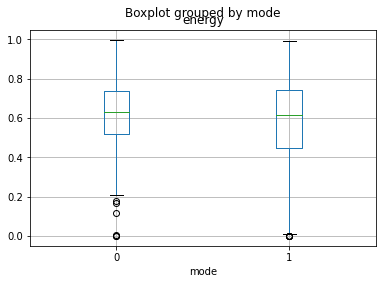

In [20]:
# Örneğin: minör ya da majör şarkıların enerjisini karşılaştır
# Üstteki siyah çizgi max
# Üstteki mavi çizgi 75%
# Yeşil çizgi ortancadır (50%)
# Alttaki mavi çizgi 25%
# Alttaki siyah çizgi min
# Ayırıcı yok
spotifyTail.boxplot(column = "energy", by = "mode")

## 2. GRAFİKLER
### 2.1 Dağılım Grafikleri

In [21]:
st = spotifyTail.copy()
st.head()

acousticness                                       artists  \
169309       0.08460  ['Big Sean', 'Chris Brown', 'Ty Dolla $ign']   
169310       0.00432                                  ['Jamie xx']   
169311       0.04780             ['Justin Bieber', 'Travis Scott']   
169312       0.38100                               ['Beach House']   
169313       0.07960                                     ['Dawin']   

        danceability  duration_ms  energy explicit                      id  \
169309         0.755       216653   0.700        1  3rsOs39rDAYxIOrDTHAgR9   
169310         0.646       283067   0.625        0  2JQm8NNpFkwvhuKH3yhuC9   
169311         0.643       275040   0.499        0  5L9WFUodzACitS1TiGm7Mi   
169312         0.490       368547   0.464        0  0qQGx2TyjtZNDNyRYO9Z0W   
169313         0.866       210893   0.731        0  0mxoXsr14ILAYcXZBMJcOs   

        instrumentalness  key  liveness  loudness  mode  \
169309             0.000    1    0.4520    -3.586     1   
169310             0.291    8    0.1190   -10.750     0   
169311             0.000    2    0.1080    -6.795     0   
169312             0.894    1    0.0555    -7.478     1   
169313             0.000    6    0.0402    -5.226     1   

                            name  popularity release_date  speechiness  \
169309             Play No Games          56   2015-02-24       0.0455   
169310  Loud Places (feat. Romy)          54   2015-06-02       0.0422   
169311                  No Sense          63   2015-11-13       0.0308   
169312                       PPP          55   2015-08-28       0.0284   
169313                   Dessert          57   2015-09-25       0.0407   

          tempo  valence  year  
169309   81.514    0.383  2015  
169310  109.019    0.186  2015  
169311  133.978    0.363  2015  
169312  104.896    0.142  2015  
169313   97.030    0.765  2015

In [22]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 169309 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   acousticness      600 non-null    float64 
 1   artists           600 non-null    object  
 2   danceability      600 non-null    float64 
 3   duration_ms       600 non-null    int64   
 4   energy            600 non-null    float64 
 5   explicit          600 non-null    category
 6   id                600 non-null    object  
 7   instrumentalness  600 non-null    float64 
 8   key               600 non-null    int64   
 9   liveness          600 non-null    float64 
 10  loudness          600 non-null    float64 
 11  mode              600 non-null    int64   
 12  name              600 non-null    object  
 13  popularity        600 non-null    int64   
 14  release_date      600 non-null    object  
 15  speechiness       600 non-null    float64 
 16  tempo             

In [23]:
st.describe().T

count           mean           std          min  \
acousticness      600.0       0.269260      0.286832      0.00001   
danceability      600.0       0.615740      0.177548      0.00000   
duration_ms       600.0  209789.276667  50551.197957  63784.00000   
energy            600.0       0.601587      0.206297      0.00002   
instrumentalness  600.0       0.064864      0.216906      0.00000   
key               600.0       5.275000      3.663570      0.00000   
liveness          600.0       0.175509      0.139636      0.02800   
loudness          600.0      -7.595083      4.717367    -38.64300   
mode              600.0       0.598333      0.490644      0.00000   
popularity        600.0      62.748333     10.640349      0.00000   
speechiness       600.0       0.119469      0.118384      0.00000   
tempo             600.0     119.933473     32.847939      0.00000   
valence           600.0       0.440663      0.235363      0.00000   
year              600.0    2017.500000      1.709250   2015.00000   

                            25%            50%            75%         max  
acousticness           0.038100       0.154000       0.430750       0.996  
danceability           0.509000       0.633000       0.749250       0.960  
duration_ms       181795.750000  208308.000000  233213.000000  489361.000  
energy                 0.481750       0.624000       0.741500       0.999  
instrumentalness       0.000000       0.000001       0.000426       0.999  
key                    2.000000       5.000000       8.000000      11.000  
liveness               0.099300       0.120000       0.206250       0.959  
loudness              -8.500750      -6.532000      -4.996750      -1.432  
mode                   0.000000       1.000000       1.000000       1.000  
popularity            60.000000      64.000000      68.000000      81.000  
speechiness            0.038475       0.063550       0.165000       0.699  
tempo                 94.979750     116.940500     143.569500     215.669  
valence                0.264000       0.435500       0.606250       0.976  
year                2016.000000    2017.500000    2019.000000    2020.000

In [24]:
st.head()

acousticness                                       artists  \
169309       0.08460  ['Big Sean', 'Chris Brown', 'Ty Dolla $ign']   
169310       0.00432                                  ['Jamie xx']   
169311       0.04780             ['Justin Bieber', 'Travis Scott']   
169312       0.38100                               ['Beach House']   
169313       0.07960                                     ['Dawin']   

        danceability  duration_ms  energy explicit                      id  \
169309         0.755       216653   0.700        1  3rsOs39rDAYxIOrDTHAgR9   
169310         0.646       283067   0.625        0  2JQm8NNpFkwvhuKH3yhuC9   
169311         0.643       275040   0.499        0  5L9WFUodzACitS1TiGm7Mi   
169312         0.490       368547   0.464        0  0qQGx2TyjtZNDNyRYO9Z0W   
169313         0.866       210893   0.731        0  0mxoXsr14ILAYcXZBMJcOs   

        instrumentalness  key  liveness  loudness  mode  \
169309             0.000    1    0.4520    -3.586     1   
169310             0.291    8    0.1190   -10.750     0   
169311             0.000    2    0.1080    -6.795     0   
169312             0.894    1    0.0555    -7.478     1   
169313             0.000    6    0.0402    -5.226     1   

                            name  popularity release_date  speechiness  \
169309             Play No Games          56   2015-02-24       0.0455   
169310  Loud Places (feat. Romy)          54   2015-06-02       0.0422   
169311                  No Sense          63   2015-11-13       0.0308   
169312                       PPP          55   2015-08-28       0.0284   
169313                   Dessert          57   2015-09-25       0.0407   

          tempo  valence  year  
169309   81.514    0.383  2015  
169310  109.019    0.186  2015  
169311  133.978    0.363  2015  
169312  104.896    0.142  2015  
169313   97.030    0.765  2015

2020 senesinin şarkılarında en çok tekrarlanan sanatçı isimleri

In [25]:
st["artists"].value_counts()

['Ellie Goulding']                 7
['YoungBoy Never Broke Again']     7
['Drake']                          5
['Lil Uzi Vert']                   4
['BTS']                            4
                                  ..
['Bastille', 'Don Diablo']         1
['Hatebreed']                      1
['Andy Black']                     1
['Gryffin', 'Bipolar Sunshine']    1
['Ingrid Andress']                 1
Name: artists, Length: 520, dtype: int64

### 2.1.1 Barplot (Sütun Grafik)

Elimizdeki kategorik değişkenleri görselleştirmek için kullanabiliriz.

Text(0.5, 1.0, 'Explicit Değişkeninin Dağılımı')

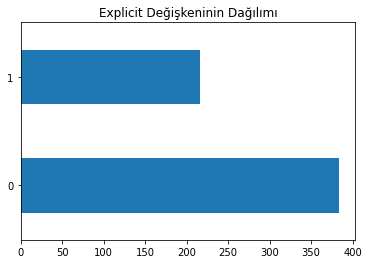

In [26]:
st["explicit"].value_counts().plot.barh().set_title("Explicit Değişkeninin Dağılımı")

### Sütun Grafiklerin Çaprazlanması

Explicit'in dans edilebilirliğe etkisini görüyoruz.

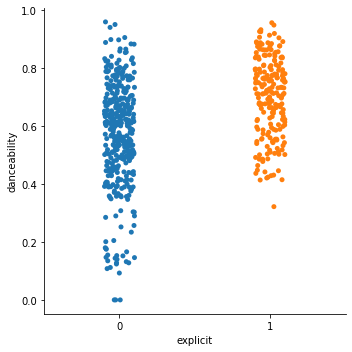

In [27]:
sns.catplot(x = "explicit", y = "danceability", data = st)

Üstteki grafiğe, st içindeki year değişkenini de ekleyip daha ayrıntılı görmeye çalışalım.

<AxesSubplot:xlabel='explicit', ylabel='danceability'>

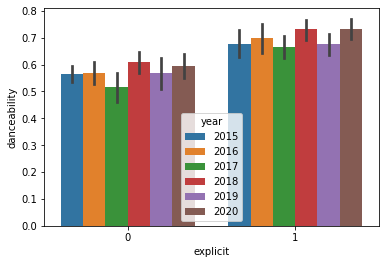

In [28]:
sns.barplot(x = "explicit", y = "danceability", hue = "year", data = st)

**Not:** Sütunların üzerinde bulunan siyah çubuklar standart sapma değerlerini ifade etmektedir.

**Çıkarım:** Yukarıdaki grafiğe bakarak, +18 ifadelerin olduğu şarkılar en çok 2018 ve 2020 yıllarında piyasaya çıkmıştır. Bununla beraber +18 ifadelerin olduğu şarkıların dans edilebilirliği daha yüksektir çıkarımı yapılabilir.

Üstteki grafiğin doğruluğunu da analiz etmemiz gerekiyor...

In [29]:
st.groupby(["explicit", "mode"])["danceability"].mean()

explicit  mode
0         0       0.568220
          1       0.567795
1         0       0.697119
          1       0.703843
Name: danceability, dtype: float64

### 2.1.2 Histogram ve Yoğunluk Grafiği

Eldeki sayısal değişkenleri görselleştirmek için kullanılır. Sayısal değişkenlerin dağılımını ifade eder.

**Bilgi:** 200.000 milisaniye yaklaşık olarak 3.33 dakika etmektedir.

<AxesSubplot:xlabel='duration_ms', ylabel='Count'>

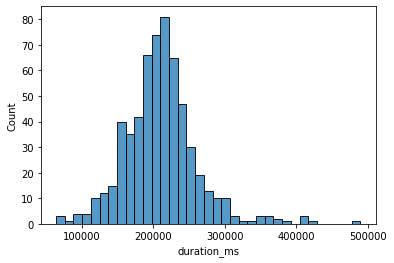

In [30]:
sns.histplot(st.duration_ms)

In [31]:
st["duration_ms"].describe()

count       600.000000
mean     209789.276667
std       50551.197957
min       63784.000000
25%      181795.750000
50%      208308.000000
75%      233213.000000
max      489361.000000
Name: duration_ms, dtype: float64

Aşağıdaki gibi bins değeri vererek bar sayısını arttırıp azaltabiliriz.

<AxesSubplot:xlabel='duration_ms', ylabel='Count'>

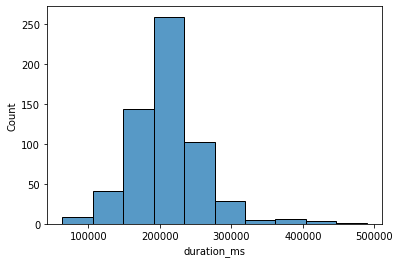

In [32]:
sns.histplot(st.duration_ms, bins = 10)

<AxesSubplot:xlabel='duration_ms', ylabel='Count'>

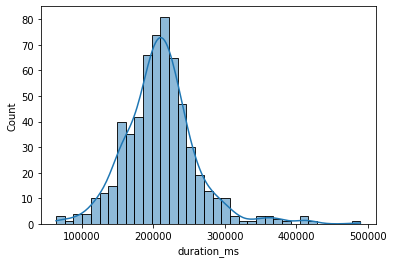

In [33]:
sns.histplot(st.duration_ms, kde = True)

<AxesSubplot:xlabel='duration_ms', ylabel='Density'>

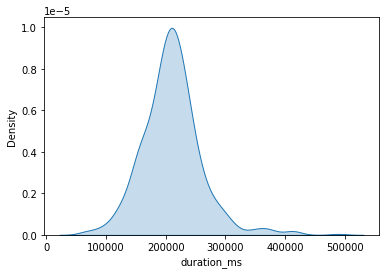

In [34]:
sns.kdeplot(st.duration_ms, shade = True)

### Histogram Grafiklerinin Çaprazlanması

Veriseti içerisinde bulunan değişkenlerin ve etkilerinin birlikte değerlendirilmesini, kırılımlarının incelenmesini sağlar.

<AxesSubplot:xlabel='duration_ms', ylabel='Density'>

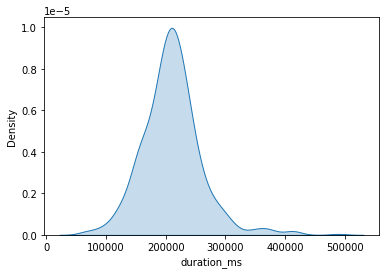

In [35]:
sns.kdeplot(st.duration_ms, shade = True)

**Not:** Üstteki grafikte 200.000 ve 350.000 milisaniye'deki kırılımları gözlemlemekteyiz, bu bize duration_ms değişkenini etkileyen farklı etkenler olduğunu gösteriyor

Grafik üzerinde eklenen boyutları bölerek görüntülemeye çalışalım. Üstte belirttiğimiz grafiği map'leyerek facegrid'e uyguladık. Böylece explicit degeri için aynı yoğunluk fonksiyonunu gözlemlemiş olacağız.

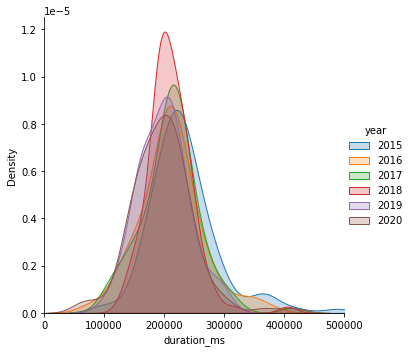

In [36]:
(sns
 .FacetGrid(st,
              hue = "year",
              height = 5,
              xlim = (0, 500000))
 .map(sns.kdeplot, "duration_ms", shade= True)
 .add_legend()
)

**Çıkarım:** Üstteki grafiğe bakarsak, çoğu şarkıların 3-4 dakika arasında olduğunu ama özellikle 2018 yılında çıkan parçaların burada daha yoğun olduğunu görebiliriz. Grafiğe daha fazla yayılan 2012 senesindeki parçalarda da standart sapmanın diğer yıllara göre daha fazla olduğunu tahmin edebiliriz.

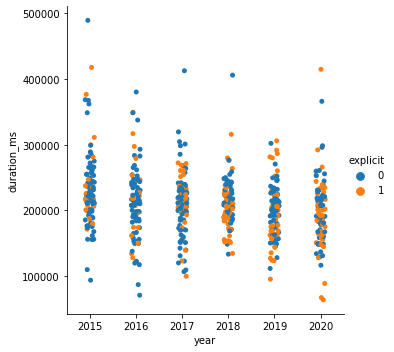

In [37]:
sns.catplot(x = "year", y = "duration_ms", hue = "explicit", data = st)

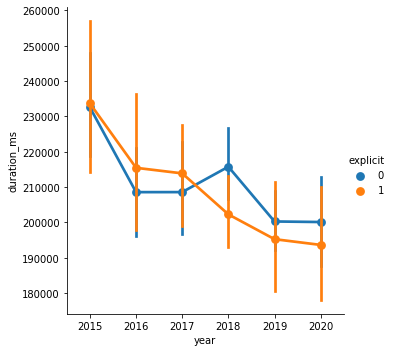

In [38]:
sns.catplot(x = "year", y = "duration_ms", hue = "explicit", kind = "point", data = st)

**Çıkarım:** Grafiğe bakarsak, 2015 yılından bu yana parçaların sürelerinin kısaldığını görebiliriz. Aynı zamanda 2015-2017 yıllarında +18 ifadelerin fazla olduğunu ama zamanla +18 şarkıların popülerliğini kaybettiğini görebiliriz.

### 2.1.3 Boxplot (Kutu Grafiği)

Sayısal değişkenleri görselleştirmek için kullanılır.

In [39]:
st["explicit"].value_counts()

0    384
1    216
Name: explicit, dtype: int64

In [40]:
st["mode"].value_counts()

1    359
0    241
Name: mode, dtype: int64

In [41]:
st["key"].value_counts()

1     70
0     70
5     63
2     59
7     55
11    55
10    53
6     45
8     42
9     40
4     32
3     16
Name: key, dtype: int64

1. En solda yer alan ufak dörtgenler minimum değeri,
2. Mavi dikdörtgenin başladığı nokta %25,
3. Mavi dikdörtgenin içindeki siyah çizgi %50(medyan),
4. Mavi dikdörtgenin bittiği nokta %75,
5. En sağda yer alan siyah çizgi de maksimum değeri temsil eder.

<AxesSubplot:xlabel='energy'>

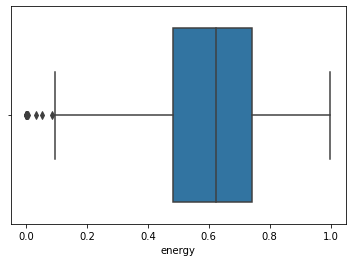

In [42]:
sns.boxplot(x = st["energy"])

### Boxplot (Kutu Grafiği) Çaprazlama

In [43]:
st.describe().T

count           mean           std          min  \
acousticness      600.0       0.269260      0.286832      0.00001   
danceability      600.0       0.615740      0.177548      0.00000   
duration_ms       600.0  209789.276667  50551.197957  63784.00000   
energy            600.0       0.601587      0.206297      0.00002   
instrumentalness  600.0       0.064864      0.216906      0.00000   
key               600.0       5.275000      3.663570      0.00000   
liveness          600.0       0.175509      0.139636      0.02800   
loudness          600.0      -7.595083      4.717367    -38.64300   
mode              600.0       0.598333      0.490644      0.00000   
popularity        600.0      62.748333     10.640349      0.00000   
speechiness       600.0       0.119469      0.118384      0.00000   
tempo             600.0     119.933473     32.847939      0.00000   
valence           600.0       0.440663      0.235363      0.00000   
year              600.0    2017.500000      1.709250   2015.00000   

                            25%            50%            75%         max  
acousticness           0.038100       0.154000       0.430750       0.996  
danceability           0.509000       0.633000       0.749250       0.960  
duration_ms       181795.750000  208308.000000  233213.000000  489361.000  
energy                 0.481750       0.624000       0.741500       0.999  
instrumentalness       0.000000       0.000001       0.000426       0.999  
key                    2.000000       5.000000       8.000000      11.000  
liveness               0.099300       0.120000       0.206250       0.959  
loudness              -8.500750      -6.532000      -4.996750      -1.432  
mode                   0.000000       1.000000       1.000000       1.000  
popularity            60.000000      64.000000      68.000000      81.000  
speechiness            0.038475       0.063550       0.165000       0.699  
tempo                 94.979750     116.940500     143.569500     215.669  
valence                0.264000       0.435500       0.606250       0.976  
year                2016.000000    2017.500000    2019.000000    2020.000

Hangi sene daha popüler şarkıların çıktığına bakalım.

**Soru:** +18 parçalarda mı daha çok dans edilebilirlik artıyor yoksa +18 olmayanlarda mı?

<AxesSubplot:xlabel='explicit', ylabel='danceability'>

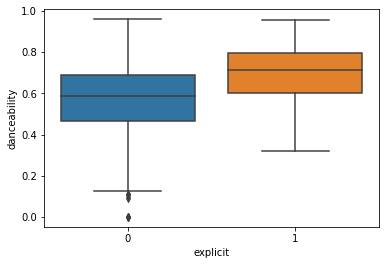

In [44]:
sns.boxplot(x = "explicit", y = "danceability", data = st)

**Soru:** Hangi yılda parçalardaki akustiklik daha fazladır?

<AxesSubplot:xlabel='year', ylabel='acousticness'>

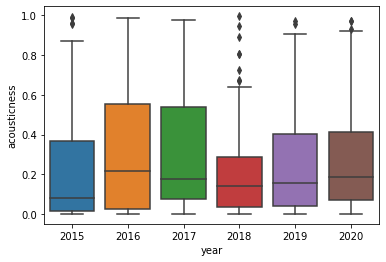

In [45]:
sns.boxplot(x = "year", y = "acousticness", data = st)

**Soru:** Hangi yıldaki parçalar daha popülerdir?

<AxesSubplot:xlabel='year', ylabel='popularity'>

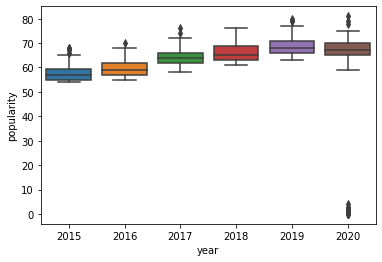

In [46]:
sns.boxplot(x = "year", y = "popularity", data = st)

<AxesSubplot:xlabel='year', ylabel='popularity'>

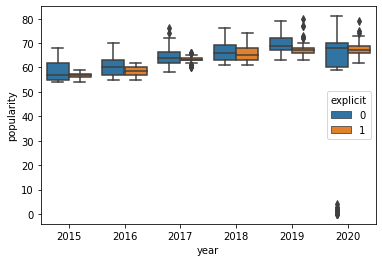

In [47]:
sns.boxplot(x = "year", y = "popularity", hue = "explicit", data = st)

**Çıkarım:** En popüler şarkıların 2019 yılında çıktığını ve majör parçaların standart sapmalarının minörlere göre çok daha küçük olduğu çıkarımını yapabiliriz.

## 2.2 Korelasyon Grafikleri

Değişkenler arasındaki ilişkiyi ifade eden istatistiksel bir terim.

### 2.2.1 Scatter Plot
Saçılım Grafiği, sayısal değişkenler arasındaki ilişkiyi gösterir.

Akustikliğin popülerlikle ilişkisini inceleyelim

<AxesSubplot:xlabel='acousticness', ylabel='popularity'>

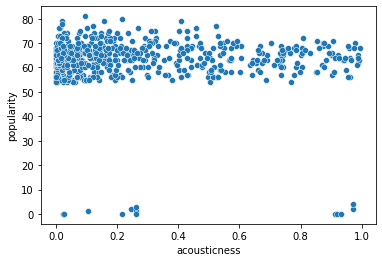

In [48]:
sns.scatterplot(x = "acousticness", y = "popularity", data = st)

### Scatter Plot Çaprazlama

<AxesSubplot:xlabel='acousticness', ylabel='popularity'>

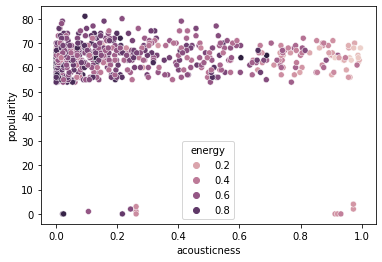

In [49]:
sns.scatterplot(x = "acousticness", y = "popularity", hue = "energy", data = st)

<AxesSubplot:xlabel='acousticness', ylabel='popularity'>

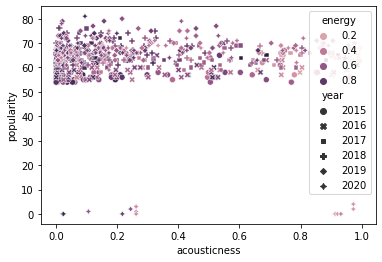

In [50]:
sns.scatterplot(x = "acousticness", y = "popularity", hue = "energy", style = "year", data = st)

### Doğrusal İlişkinin Gösterilmesi

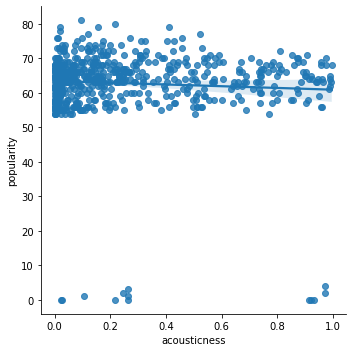

In [51]:
sns.lmplot(x = "acousticness", y = "popularity", data = st)

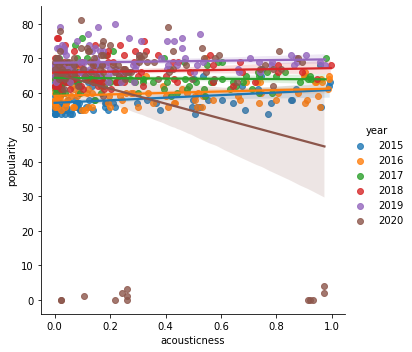

In [52]:
sns.lmplot(x = "acousticness", y = "popularity", hue = "year", data = st)

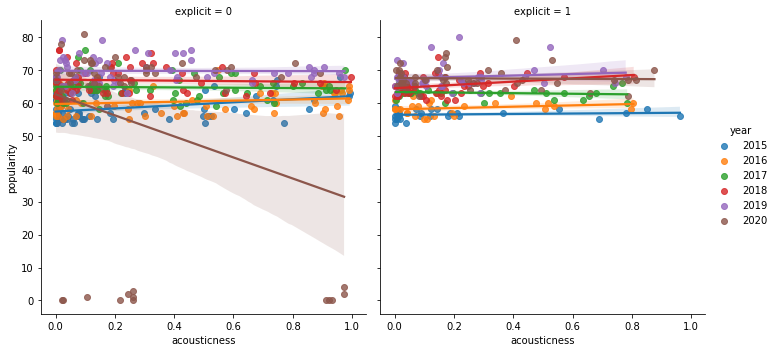

In [53]:
sns.lmplot(x = "acousticness", y = "popularity", hue = "year", col = "explicit", data = st)

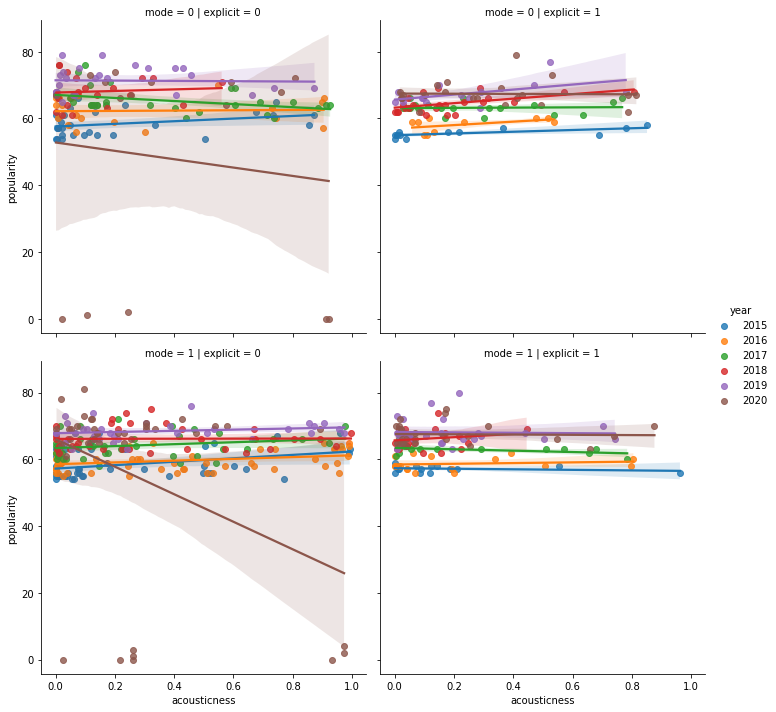

In [54]:
sns.lmplot(x = "acousticness", y = "popularity", hue = "year", col = "explicit", row = "mode", data = st)

### 2.2.2 Heat Map (Isı Haritası)
Isı Haritaları değişkenleri satırlara ve sütunlara yerleştirerek ve tablodaki hücreleri renklendirerek çok değişkenli verileri çapraz incelemek için kullanılmaktadır. Isı haritaları, birden çok değişken arasında varyans göstermek, herhangi bir tasarım ortaya çıkarmak, herhangi bir değişkenin birbirine benzer olup olmadığını göstermek ve aralarında herhangi bir korelasyon olup olmadığını tespit etmek için kullanılabilir.

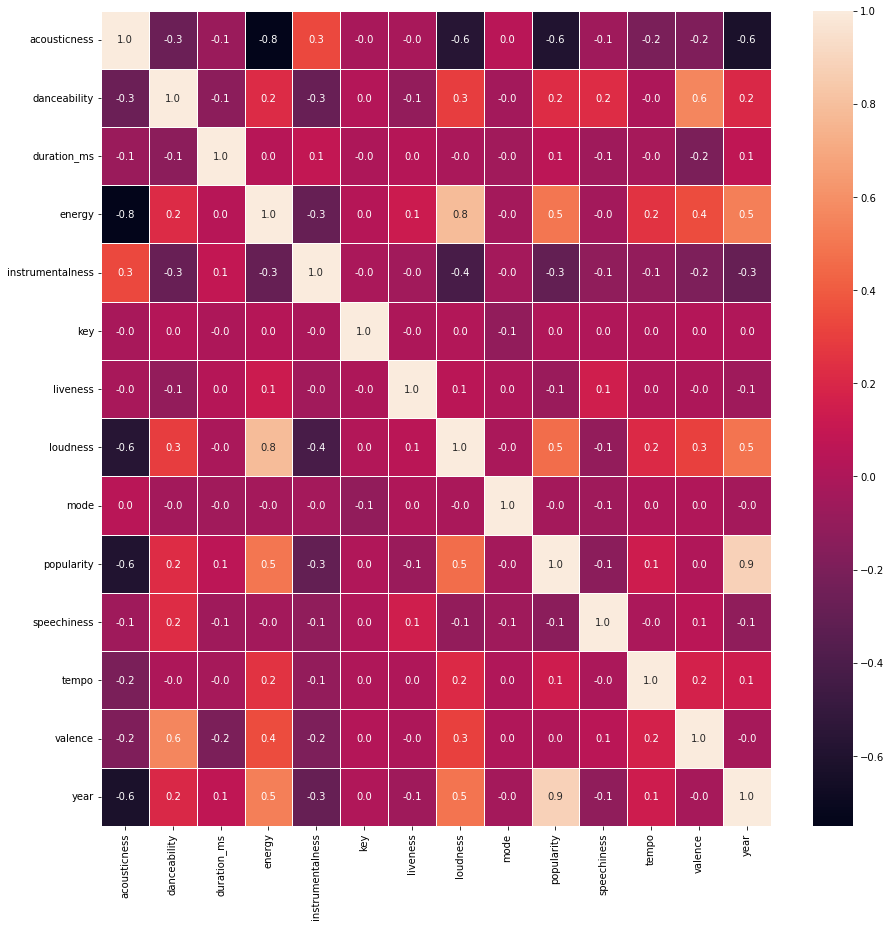

In [55]:
(isiFigur, ax) = plt.subplots(figsize=(15, 15))
sns.heatmap(spotify.corr(), annot = True, linewidths = 0.5, fmt = '.1f', ax = ax)
plt.show()

Yukarıda hesapladığımız korelasyon değerlerini incelersek;
- Dans edilebilirlik arttığında şarkının enerjisi de pozitif yönde 0.220569 oranında artmıştır
- Akustiklik arttığında şarkının popülerliğinin negatif yönde 0.593345 oranında azalmıştır
- Valens değeri arttığında şarkının dans edilebilirliği pozitif yönde 0.560242 oranında artmıştır

Gibi çıkarımlar yapabiliriz.

### 2.2.3 Çizgi Grafiği

In [56]:
st["popularity"].describe()

count    600.000000
mean      62.748333
std       10.640349
min        0.000000
25%       60.000000
50%       64.000000
75%       68.000000
max       81.000000
Name: popularity, dtype: float64

In [57]:
st["energy"].describe()

count    600.000000
mean       0.601587
std        0.206297
min        0.000020
25%        0.481750
50%        0.624000
75%        0.741500
max        0.999000
Name: energy, dtype: float64

In [58]:
st.groupby("popularity")["energy"].describe()

count      mean       std       min      25%     50%      75%  \
popularity                                                                  
0             7.0  0.547714  0.302195  0.267000  0.30300  0.3670  0.81800   
1             2.0  0.458000  0.200818  0.316000  0.38700  0.4580  0.52900   
2             2.0  0.464500  0.286378  0.262000  0.36325  0.4645  0.56575   
3             1.0  0.316000       NaN  0.316000  0.31600  0.3160  0.31600   
4             1.0  0.262000       NaN  0.262000  0.26200  0.2620  0.26200   
54           10.0  0.716000  0.162985  0.510000  0.58650  0.6870  0.84900   
55           22.0  0.727136  0.148348  0.431000  0.65225  0.7245  0.81500   
56           29.0  0.665724  0.199038  0.180000  0.55000  0.7140  0.82300   
57           27.0  0.649185  0.200838  0.167000  0.50050  0.6820  0.82100   
58           24.0  0.564208  0.155992  0.194000  0.43900  0.5850  0.68925   
59           18.0  0.553222  0.216773  0.178000  0.43800  0.5290  0.70350   
60           26.0  0.608154  0.197412  0.243000  0.48950  0.5840  0.71775   
61           25.0  0.651880  0.188496  0.271000  0.53900  0.6510  0.77500   
62           26.0  0.629647  0.238620  0.008320  0.54850  0.6605  0.79200   
63           54.0  0.543664  0.198306  0.000711  0.46075  0.5625  0.67175   
64           45.0  0.565672  0.286491  0.000164  0.39000  0.5860  0.76500   
65           39.0  0.575774  0.215904  0.084200  0.50950  0.5770  0.71400   
66           51.0  0.590314  0.190023  0.178000  0.48350  0.6270  0.72250   
67           32.0  0.632844  0.143617  0.349000  0.54875  0.6345  0.70550   
68           42.0  0.562998  0.251743  0.000020  0.41575  0.5960  0.72200   
69           31.0  0.563903  0.199034  0.148000  0.42200  0.6300  0.71900   
70           22.0  0.575591  0.186891  0.175000  0.44550  0.5360  0.75750   
71           14.0  0.560714  0.157971  0.292000  0.43725  0.5795  0.68350   
72           15.0  0.654467  0.141829  0.412000  0.58550  0.6630  0.73550   
73            8.0  0.650375  0.118172  0.503000  0.54525  0.6495  0.74625   
74            8.0  0.770125  0.079132  0.634000  0.72800  0.7895  0.82750   
75            6.0  0.585167  0.149732  0.443000  0.46500  0.5415  0.70650   
76            5.0  0.648600  0.128222  0.486000  0.54600  0.6930  0.72400   
77            2.0  0.654500  0.009192  0.648000  0.65125  0.6545  0.65775   
78            1.0  0.613000       NaN  0.613000  0.61300  0.6130  0.61300   
79            3.0  0.679667  0.051637  0.624000  0.65650  0.6890  0.70750   
80            1.0  0.643000       NaN  0.643000  0.64300  0.6430  0.64300   
81            1.0  0.921000       NaN  0.921000  0.92100  0.9210  0.92100   

              max  
popularity         
0           0.958  
1           0.600  
2           0.667  
3           0.316  
4           0.262  
54          0.970  
55          0.946  
56          0.958  
57          0.934  
58          0.779  
59          0.974  
60          0.990  
61          0.986  
62          0.950  
63          0.938  
64          0.999  
65          0.997  
66          0.890  
67          0.933  
68          0.939  
69          0.859  
70          0.859  
71          0.803  
72          0.944  
73          0.799  
74          0.858  
75          0.784  
76          0.794  
77          0.661  
78          0.613  
79          0.726  
80          0.643  
81          0.921

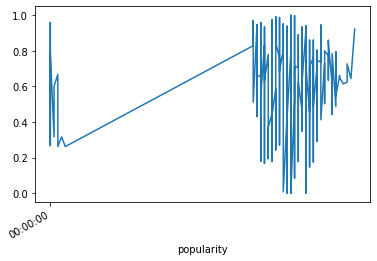

In [59]:
enerji = st["energy"]
enerji.index = pd.DatetimeIndex(st["popularity"])
enerji.plot();

<AxesSubplot:xlabel='popularity', ylabel='year'>

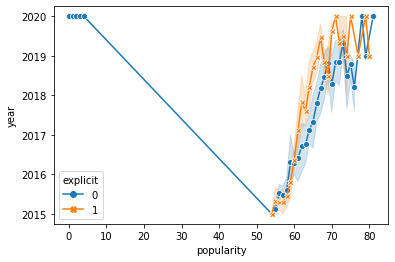

In [60]:
sns.lineplot(x = "popularity", 
             y = "year", 
             hue = "explicit", 
             style = "explicit", 
             markers = True, dashes = False,
             data = st)

## 3. VERİ BİLİMİ İÇİN İSTATİSTİK

### 3.1 Betimsel İstatistik

**Varyans:** ortalama etrafındaki dağılımın ölçüsü

**Kovaryans:** iki değişken arasındaki değişkenlik ölçüsü

**Korelasyon:** iki değişken arasındaki ilişkiyi, ilişkinin anlamlı olup olmadığını, ilişkenin şiddetini ve yönünü ifade eden istatistiksel bir tekniktir.

In [61]:
st.head()

acousticness                                       artists  \
169309       0.08460  ['Big Sean', 'Chris Brown', 'Ty Dolla $ign']   
169310       0.00432                                  ['Jamie xx']   
169311       0.04780             ['Justin Bieber', 'Travis Scott']   
169312       0.38100                               ['Beach House']   
169313       0.07960                                     ['Dawin']   

        danceability  duration_ms  energy explicit                      id  \
169309         0.755       216653   0.700        1  3rsOs39rDAYxIOrDTHAgR9   
169310         0.646       283067   0.625        0  2JQm8NNpFkwvhuKH3yhuC9   
169311         0.643       275040   0.499        0  5L9WFUodzACitS1TiGm7Mi   
169312         0.490       368547   0.464        0  0qQGx2TyjtZNDNyRYO9Z0W   
169313         0.866       210893   0.731        0  0mxoXsr14ILAYcXZBMJcOs   

        instrumentalness  key  liveness  loudness  mode  \
169309             0.000    1    0.4520    -3.586     1   
169310             0.291    8    0.1190   -10.750     0   
169311             0.000    2    0.1080    -6.795     0   
169312             0.894    1    0.0555    -7.478     1   
169313             0.000    6    0.0402    -5.226     1   

                            name  popularity release_date  speechiness  \
169309             Play No Games          56   2015-02-24       0.0455   
169310  Loud Places (feat. Romy)          54   2015-06-02       0.0422   
169311                  No Sense          63   2015-11-13       0.0308   
169312                       PPP          55   2015-08-28       0.0284   
169313                   Dessert          57   2015-09-25       0.0407   

          tempo  valence  year  
169309   81.514    0.383  2015  
169310  109.019    0.186  2015  
169311  133.978    0.363  2015  
169312  104.896    0.142  2015  
169313   97.030    0.765  2015

In [62]:
st.describe().T

count           mean           std          min  \
acousticness      600.0       0.269260      0.286832      0.00001   
danceability      600.0       0.615740      0.177548      0.00000   
duration_ms       600.0  209789.276667  50551.197957  63784.00000   
energy            600.0       0.601587      0.206297      0.00002   
instrumentalness  600.0       0.064864      0.216906      0.00000   
key               600.0       5.275000      3.663570      0.00000   
liveness          600.0       0.175509      0.139636      0.02800   
loudness          600.0      -7.595083      4.717367    -38.64300   
mode              600.0       0.598333      0.490644      0.00000   
popularity        600.0      62.748333     10.640349      0.00000   
speechiness       600.0       0.119469      0.118384      0.00000   
tempo             600.0     119.933473     32.847939      0.00000   
valence           600.0       0.440663      0.235363      0.00000   
year              600.0    2017.500000      1.709250   2015.00000   

                            25%            50%            75%         max  
acousticness           0.038100       0.154000       0.430750       0.996  
danceability           0.509000       0.633000       0.749250       0.960  
duration_ms       181795.750000  208308.000000  233213.000000  489361.000  
energy                 0.481750       0.624000       0.741500       0.999  
instrumentalness       0.000000       0.000001       0.000426       0.999  
key                    2.000000       5.000000       8.000000      11.000  
liveness               0.099300       0.120000       0.206250       0.959  
loudness              -8.500750      -6.532000      -4.996750      -1.432  
mode                   0.000000       1.000000       1.000000       1.000  
popularity            60.000000      64.000000      68.000000      81.000  
speechiness            0.038475       0.063550       0.165000       0.699  
tempo                 94.979750     116.940500     143.569500     215.669  
valence                0.264000       0.435500       0.606250       0.976  
year                2016.000000    2017.500000    2019.000000    2020.000

Sayısal değişkenler için kullanılır

In [63]:
rp.summary_cont(st[["energy","danceability","popularity"]])

Variable      N     Mean       SD      SE  95% Conf.  Interval
0        energy  600.0   0.6016   0.2063  0.0084     0.5850    0.6181
1  danceability  600.0   0.6157   0.1775  0.0072     0.6015    0.6300
2    popularity  600.0  62.7483  10.6403  0.4344    61.8952   63.6014

**Not:**

    N: eleman sayısı
    Mean: ortalama
    SD: Standart Deviation (Standart sapma)
    SE: Standart Error (Standart Hata)
    95% Conf. interval :(default değeri 95%) %95 güven aralığı, popülasyonun gerçek ortalamasını içerdiğinden %95 emin olabileceğiniz bir değerler aralığıdır. Doğal örnekleme değişkenliği nedeniyle, örnek ortalaması (CI'nin merkezi) örnekten örneğe değişecektir.

    Güven Aralığı: Anakütle parametresinin tahmini değerini kapsayabilecek iki sayıdan oluşan bir aralık bulunmasıdır.
        
Yukarıdaki örnek için: popularity

    N = 600
    Mean = 62.7483
    SD = 10.6403
    
    Peki güven aralığı kaç olacak? (Bizim örneğimiz için 95%)
    Z Tablo değeri 95% için ??? olacaktır o halde;
    62.7483 +- (?*(10.6403/pow(600,1/2)))

### 3.2 Olasılık Dağılımları
Rassal değişkenlerin alabilecekleri değerlere ve bu değerlere ilişkin olasılıklara bu değişkenin olasılık dağılımı denir.

    Kesikli olasılık dağılımları 
         ** Bernoulli
         ** Binom
         ** Poisson
         ** ...

    Sürekli Olasılık Dağılımları
        ** Normal Dağılım
        ** Uniform Dağılım
        ** Üstel Dağılım
        ** ...

## 4. ÖN İŞLEME

**Veri Ön İşleme**
    
    Veri Temizleme (Data Cleaning)
        Gürültülü Veri Analizi (Noisy Data Analysis)
        Aykırı Gözlem analizi (Outlier Analysis)
        Eksik Veri Analizi (Missing Data Analysis)
    Veri Standardizasyonu (Data Standardization, Feature Scaling)
        0-1 Dönüşümü (Normalization)
        z-skoru Dönüşümü (Standardization)
        Logaritmik Dönüşüm (Log Transformation)
    Veri İndirgeme (Data Reduction)
        Gözlem (Observation) Sayısının azaltılması
        Değişken (Vasiable) Sayısının azaltılması
    Değişken Dönüşümleri (Variable Transformation)
        Sürekli değişken dönüşümleri
        Kategorik Değişken Dönüşümleri

### 4.1 Aykırı Gözlem 
Veride genel eğilimin oldukça dışına çıkan ya da diğer gözlemlerden oldukça farklı olan gözlemlere aykırı gözlem denir.

Aykırılığı ifade eden nümerik değere **aykırı değer** denir.

Aykırı değeri barındıran gözlem birimine **aykırı gözlem** denir.

Genellenebilirlik kaygısıyla oluşturulan kural setlerini yanıltır. Yanlılığa sebep olur. Bu nedenle genellemenin dışında kalacak aykırı verilerin çalışmanın dışına çıkartılması gerekir.

**Standart Sapma Yaklaşımı**

    Eşik değer= Ortalama + 1 X Standart Sapma
    Eşik değer= Ortalama + 2 X Standart Sapma
    Eşik değer= Ortalama + 3 X Standart Sapma
    
**Z-Skoru Yaklaşımı**

    Standart sapma yöntemine benzer şekilde, dağılımın sağından ve solundan -+2.5 eşiklenebilir.
    
**Boxplot Yöntemi**

    En sık kullanılan yöntemlerden biridir. Değişken değerleri küçükten büyüğe sıralanır. Q1,Q3 değerlerinin üzerinden bir eşik değer hesaplanır.
    
    IQR (Inter Quartile) = 1.5 x (Q3-Q1)
    Alt Eşik Değer = Q1 - IQR
    Üst Eşik Değer = Q3 + IQR

#### 4.1.1 Aykırı Değerlerin Tespiti

In [64]:
stfi = st.select_dtypes(include = ["float64", "int64"]) #sadece sayısal değerler
stfi = stfi.dropna()
stfi.head()

acousticness  danceability  duration_ms  energy  instrumentalness  \
169309       0.08460         0.755       216653   0.700             0.000   
169310       0.00432         0.646       283067   0.625             0.291   
169311       0.04780         0.643       275040   0.499             0.000   
169312       0.38100         0.490       368547   0.464             0.894   
169313       0.07960         0.866       210893   0.731             0.000   

        key  liveness  loudness  mode  popularity  speechiness    tempo  \
169309    1    0.4520    -3.586     1          56       0.0455   81.514   
169310    8    0.1190   -10.750     0          54       0.0422  109.019   
169311    2    0.1080    -6.795     0          63       0.0308  133.978   
169312    1    0.0555    -7.478     1          55       0.0284  104.896   
169313    6    0.0402    -5.226     1          57       0.0407   97.030   

        valence  year  
169309    0.383  2015  
169310    0.186  2015  
169311    0.363  2015  
169312    0.142  2015  
169313    0.765  2015

In [65]:
stfi_loudness = stfi["loudness"]
stfi_loudness.head()

169309    -3.586
169310   -10.750
169311    -6.795
169312    -7.478
169313    -5.226
Name: loudness, dtype: float64

<AxesSubplot:xlabel='loudness'>

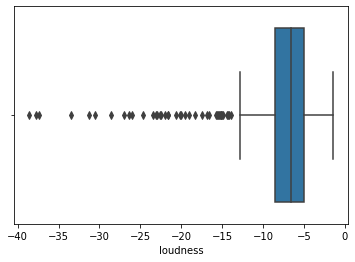

In [66]:
sns.boxplot(x = stfi_loudness)

In [67]:
Q1 = stfi_loudness.quantile(0.25)
Q3 = stfi_loudness.quantile(0.75)
IQR = Q3-Q1
print(Q1)
print(Q3)
print(IQR)

-8.50075
-4.9967500000000005
3.5039999999999996


In [68]:
alt_sinir = Q1 - 1.5*IQR
ust_sinir = Q3 + 1.5*IQR
print(alt_sinir)
print(ust_sinir)

-13.75675
0.25924999999999887


In [69]:
(stfi_loudness < alt_sinir) | (stfi_loudness > ust_sinir)

169309    False
169310    False
169311    False
169312    False
169313    False
          ...  
169904    False
169905    False
169906    False
169907    False
169908    False
Name: loudness, Length: 600, dtype: bool

In [70]:
aykiri_tf = (stfi_loudness < alt_sinir) | (stfi_loudness > ust_sinir)
stfi_loudness[aykiri_tf]

169322   -33.503
169331   -22.462
169409   -37.424
169410   -13.975
169412   -17.490
169416   -15.150
169429   -37.801
169446   -23.030
169459   -38.643
169463   -15.725
169465   -15.065
169491   -14.368
169502   -15.265
169512   -14.309
169520   -14.929
169522   -31.221
169529   -22.591
169533   -15.639
169547   -18.295
169548   -19.566
169549   -21.578
169551   -20.181
169558   -20.669
169560   -19.075
169564   -23.489
169569   -16.574
169576   -14.125
169577   -28.548
169579   -21.618
169584   -15.117
169598   -15.351
169607   -22.985
169609   -30.569
169710   -26.940
169717   -20.070
169737   -24.715
169743   -16.873
169755   -26.433
169770   -22.012
169791   -15.545
169796   -26.058
Name: loudness, dtype: float64

In [71]:
stfi_loudness[aykiri_tf].index

Int64Index([169322, 169331, 169409, 169410, 169412, 169416, 169429, 169446,
            169459, 169463, 169465, 169491, 169502, 169512, 169520, 169522,
            169529, 169533, 169547, 169548, 169549, 169551, 169558, 169560,
            169564, 169569, 169576, 169577, 169579, 169584, 169598, 169607,
            169609, 169710, 169717, 169737, 169743, 169755, 169770, 169791,
            169796],
           dtype='int64')

#### 4.1.2 Aykırı Değerler Sorununun Çözülmesi

In [72]:
stfi_loudness[aykiri_tf]

169322   -33.503
169331   -22.462
169409   -37.424
169410   -13.975
169412   -17.490
169416   -15.150
169429   -37.801
169446   -23.030
169459   -38.643
169463   -15.725
169465   -15.065
169491   -14.368
169502   -15.265
169512   -14.309
169520   -14.929
169522   -31.221
169529   -22.591
169533   -15.639
169547   -18.295
169548   -19.566
169549   -21.578
169551   -20.181
169558   -20.669
169560   -19.075
169564   -23.489
169569   -16.574
169576   -14.125
169577   -28.548
169579   -21.618
169584   -15.117
169598   -15.351
169607   -22.985
169609   -30.569
169710   -26.940
169717   -20.070
169737   -24.715
169743   -16.873
169755   -26.433
169770   -22.012
169791   -15.545
169796   -26.058
Name: loudness, dtype: float64

**Not:** Aykırı değerler sorununun çözülmesi için dört farklı yöntem vardır. Bunlar;
1- Silme
2- Ortalama ile Doldurma
3- Baskılama Yöntemi
4- Çok Değişkenli Aykırı Gözlem Analizi

Biz bu projede ortalama ile dolduracağız. Çünkü verisetimizdeki değerlerin çoğu 0 ile 1 aralığında değerler aldığından aykırı değerlerin ortalamayı çok değiştirmesini istemiyoruz.

In [73]:
aykiri_tf.head()

169309    False
169310    False
169311    False
169312    False
169313    False
Name: loudness, dtype: bool

In [74]:
stfi_loudness[aykiri_tf]

169322   -33.503
169331   -22.462
169409   -37.424
169410   -13.975
169412   -17.490
169416   -15.150
169429   -37.801
169446   -23.030
169459   -38.643
169463   -15.725
169465   -15.065
169491   -14.368
169502   -15.265
169512   -14.309
169520   -14.929
169522   -31.221
169529   -22.591
169533   -15.639
169547   -18.295
169548   -19.566
169549   -21.578
169551   -20.181
169558   -20.669
169560   -19.075
169564   -23.489
169569   -16.574
169576   -14.125
169577   -28.548
169579   -21.618
169584   -15.117
169598   -15.351
169607   -22.985
169609   -30.569
169710   -26.940
169717   -20.070
169737   -24.715
169743   -16.873
169755   -26.433
169770   -22.012
169791   -15.545
169796   -26.058
Name: loudness, dtype: float64

In [75]:
stfi_loudness.mean()

-7.595083333333332

In [76]:
##stfi_loudness[aykiri_tf] = stfi_loudness.mean()

In [77]:
stfi_loudness[aykiri_tf]

169322   -33.503
169331   -22.462
169409   -37.424
169410   -13.975
169412   -17.490
169416   -15.150
169429   -37.801
169446   -23.030
169459   -38.643
169463   -15.725
169465   -15.065
169491   -14.368
169502   -15.265
169512   -14.309
169520   -14.929
169522   -31.221
169529   -22.591
169533   -15.639
169547   -18.295
169548   -19.566
169549   -21.578
169551   -20.181
169558   -20.669
169560   -19.075
169564   -23.489
169569   -16.574
169576   -14.125
169577   -28.548
169579   -21.618
169584   -15.117
169598   -15.351
169607   -22.985
169609   -30.569
169710   -26.940
169717   -20.070
169737   -24.715
169743   -16.873
169755   -26.433
169770   -22.012
169791   -15.545
169796   -26.058
Name: loudness, dtype: float64

###  4.2 Eksik Veri Analizi
Eksik değerlere sahip gözlemlerin veri setinden doğrudan çıkarılması ve rassallığının incelenmemesi yapılacak istatistiksel çıkarımların, modelleme çalışmalarıın güvenirliğini düşürecektir (Alpar,2011).

O halde eksik değerleri tespit edelim.

In [78]:
spotify.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
Tempolu mu          0
dtype: int64

In [79]:
spotify.notnull().sum()

acousticness        169909
artists             169909
danceability        169909
duration_ms         169909
energy              169909
explicit            169909
id                  169909
instrumentalness    169909
key                 169909
liveness            169909
loudness            169909
mode                169909
name                169909
popularity          169909
release_date        169909
speechiness         169909
tempo               169909
valence             169909
year                169909
Tempolu mu          169909
dtype: int64

Verisetimizde eksik değerler bulunmadığından ekstra bir işlem yapmamıza gerek yoktur.

### 4.3 Değişken Standardizasyonu

**Standardizasyon**

Verisetinin taşıdığı bilginin özütünü bozmadan (varyansı değişmez), belirli bir standarta getirir (bilgiyi değiştirir).

Dönüştürme ise bilgiyi bazen bozar bazen de temsil şeklini değiştirir.

Verisetimizde standardizasyon veya normalizasyon kullanmayacağız ancak genel mantığını anlamak açısından bir örnek yapalım.

In [80]:
V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3})

df = df.astype(float)
var_names = list(df)
df

V1    V2    V3
0  1.0   7.0   6.0
1  3.0   7.0  12.0
2  6.0   5.0   5.0
3  5.0   8.0   6.0
4  7.0  12.0  14.0

In [81]:
from sklearn import preprocessing 
df2=preprocessing.scale(df)

In [82]:
df

V1    V2    V3
0  1.0   7.0   6.0
1  3.0   7.0  12.0
2  6.0   5.0   5.0
3  5.0   8.0   6.0
4  7.0  12.0  14.0

In [83]:
df2 = pd.DataFrame(df2, columns = var_names)
df2

V1        V2        V3
0 -1.578410 -0.345547 -0.709208
1 -0.649934 -0.345547  0.927426
2  0.742781 -1.209416 -0.981981
3  0.278543  0.086387 -0.709208
4  1.207020  1.814124  1.472971

Yukarıda da görüldüğü gibi veriyi değiştirmek yerine verinin aldığı değerleri diğer verilerle orantısını bozmayacak şekilde bir standarta oturtuyoruz.

**Normalizasyon** 

Değerleri 0 ve 1 aralığına dönüştürür.

In [84]:
df3=preprocessing.normalize(df)
df3 = pd.DataFrame(df3, columns = var_names)
df3

V1        V2        V3
0  0.107833  0.754829  0.646997
1  0.211079  0.492518  0.844317
2  0.646997  0.539164  0.539164
3  0.447214  0.715542  0.536656
4  0.354914  0.608424  0.709828

**Min-Max Dönüşümü**

Değerleri belirlediğimiz bir aralıkta olacak şekilde dönüştürür.

In [85]:
scaler=preprocessing.MinMaxScaler(feature_range = (100,200))
df4=scaler.fit_transform(df)
df4 = pd.DataFrame(df4, columns = var_names)
df4

V1          V2          V3
0  100.000000  128.571429  111.111111
1  133.333333  128.571429  177.777778
2  183.333333  100.000000  100.000000
3  166.666667  142.857143  111.111111
4  200.000000  200.000000  200.000000

Şimdi yaptığımız tüm bu değişiklikleri görebilmek açısından hepsinin ortalamasını yazdıralım.

In [86]:
print(df.mean())
print(df2.mean())
print(df3.mean())
print(df4.mean())

V1    4.4
V2    7.8
V3    8.6
dtype: float64
V1   -1.332268e-16
V2    4.440892e-17
V3    8.881784e-17
dtype: float64
V1    0.353607
V2    0.622095
V3    0.655392
dtype: float64
V1    156.666667
V2    140.000000
V3    140.000000
dtype: float64


### 4.4 Değişken Dönüşümleri

Değişken dönüşümleri sekiz farklı şekilde yapılabilir. Bunlar;

   * Standardizasyon
   
   * Binarize Dönüşüm
   
   * (0-1) Dönüşümü
   
   * "1 ve Diğerleri (0)" Dönüşümü
   
   * Çok Sınıflı Dönüşüm
   
   * One-Hot Dönüşümü ve Dummy Değişken Tuzağı
   
   * Sürekli Değişkenin Kategorik Değişkene Dönüştürülmesi
   
   * Değişken - Index, Index - Değişken Dönüşümleri
   
Verisetimizdeki verilerin her birinin aldığı değerlerin teknik olarak anlamlı bir karşılığı olduğundan değişken dönüşümleri yapılması orijinalliği bozabilir. Dolayısıyla verisetine değişken dönüşümleri yapılmamıştır.

# 5. MAKİNE ÖĞRENMESİ

## 5.1 Doğrusal Regresyon

### 5.1.1 Basit Doğrusal Regresyon

#### 5.1.1.1 Modelleme

In [87]:
st = spotify.tail(1000).copy()
st.head

<bound method NDFrame.head of         acousticness                             artists  danceability  \
168909      0.012600                     ['The Strokes']         0.515   
168910      0.000009       ['Ted Poley', 'Tony Harnell']         0.573   
168911      0.001160                       ['Lady Gaga']         0.570   
168912      0.008030                  ['The Black Keys']         0.638   
168913      0.414000                         ['Amy Liz']         0.777   
...              ...                                 ...           ...   
169904      0.173000              ['DripReport', 'Tyga']         0.875   
169905      0.016700  ['Leon Bridges', 'Terrace Martin']         0.719   
169906      0.538000               ['Kygo', 'Oh Wonder']         0.514   
169907      0.071400       ['Cash Cash', 'Andy Grammer']         0.646   
169908      0.109000                  ['Ingrid Andress']         0.512   

        duration_ms  energy explicit                      id  \
168909       2552

In [88]:
st.isnull().values.any()

False

Bağımsız değişkenlerin bağımlı değişken (popularity) üzerindeki etkisine dikkat etmeliyiz

In [89]:
st.corr()

acousticness  danceability  duration_ms    energy  \
acousticness          1.000000     -0.139809    -0.068098 -0.653889   
danceability         -0.139809      1.000000    -0.166341  0.110214   
duration_ms          -0.068098     -0.166341     1.000000  0.094862   
energy               -0.653889      0.110214     0.094862  1.000000   
instrumentalness      0.222559     -0.338035    -0.040067 -0.277199   
key                   0.029908      0.011361    -0.011447  0.036768   
liveness             -0.101916     -0.131695     0.083973  0.135609   
loudness             -0.512472      0.334699     0.093820  0.686467   
mode                  0.052445     -0.036616    -0.003832 -0.045532   
popularity           -0.000897      0.098753    -0.169820 -0.031572   
speechiness          -0.074524      0.277632    -0.053500  0.072968   
tempo                -0.186024      0.012303     0.052061  0.168198   
valence              -0.189520      0.460604    -0.144337  0.376049   
year                  0.044354      0.162655    -0.312072 -0.134042   

                  instrumentalness       key  liveness  loudness      mode  \
acousticness              0.222559  0.029908 -0.101916 -0.512472  0.052445   
danceability             -0.338035  0.011361 -0.131695  0.334699 -0.036616   
duration_ms              -0.040067 -0.011447  0.083973  0.093820 -0.003832   
energy                   -0.277199  0.036768  0.135609  0.686467 -0.045532   
instrumentalness          1.000000 -0.023238  0.141159 -0.629583 -0.043518   
key                      -0.023238  1.000000  0.018133  0.055093 -0.191255   
liveness                  0.141159  0.018133  1.000000 -0.030144 -0.085755   
loudness                 -0.629583  0.055093 -0.030144  1.000000 -0.024584   
mode                     -0.043518 -0.191255 -0.085755 -0.024584  1.000000   
popularity                0.023217  0.027568 -0.007566 -0.021136 -0.062279   
speechiness              -0.150789  0.005625  0.062960  0.053573 -0.113055   
tempo                    -0.165830 -0.022290 -0.005526  0.207665  0.033429   
valence                  -0.282487  0.021677 -0.087930  0.402819 -0.006803   
year                     -0.046617  0.013489 -0.078275 -0.024782 -0.045478   

                  popularity  speechiness     tempo   valence      year  
acousticness       -0.000897    -0.074524 -0.186024 -0.189520  0.044354  
danceability        0.098753     0.277632  0.012303  0.460604  0.162655  
duration_ms        -0.169820    -0.053500  0.052061 -0.144337 -0.312072  
energy             -0.031572     0.072968  0.168198  0.376049 -0.134042  
instrumentalness    0.023217    -0.150789 -0.165830 -0.282487 -0.046617  
key                 0.027568     0.005625 -0.022290  0.021677  0.013489  
liveness           -0.007566     0.062960 -0.005526 -0.087930 -0.078275  
loudness           -0.021136     0.053573  0.207665  0.402819 -0.024782  
mode               -0.062279    -0.113055  0.033429 -0.006803 -0.045478  
popularity          1.000000     0.086298 -0.026812 -0.014026  0.478960  
speechiness         0.086298     1.000000  0.098957  0.130966  0.151954  
tempo              -0.026812     0.098957  1.000000  0.094354 -0.048596  
valence            -0.014026     0.130966  0.094354  1.000000  0.006401  
year                0.478960     0.151954 -0.048596  0.006401  1.000000

In [90]:
df = st.select_dtypes(include = ["float64", "int64"])

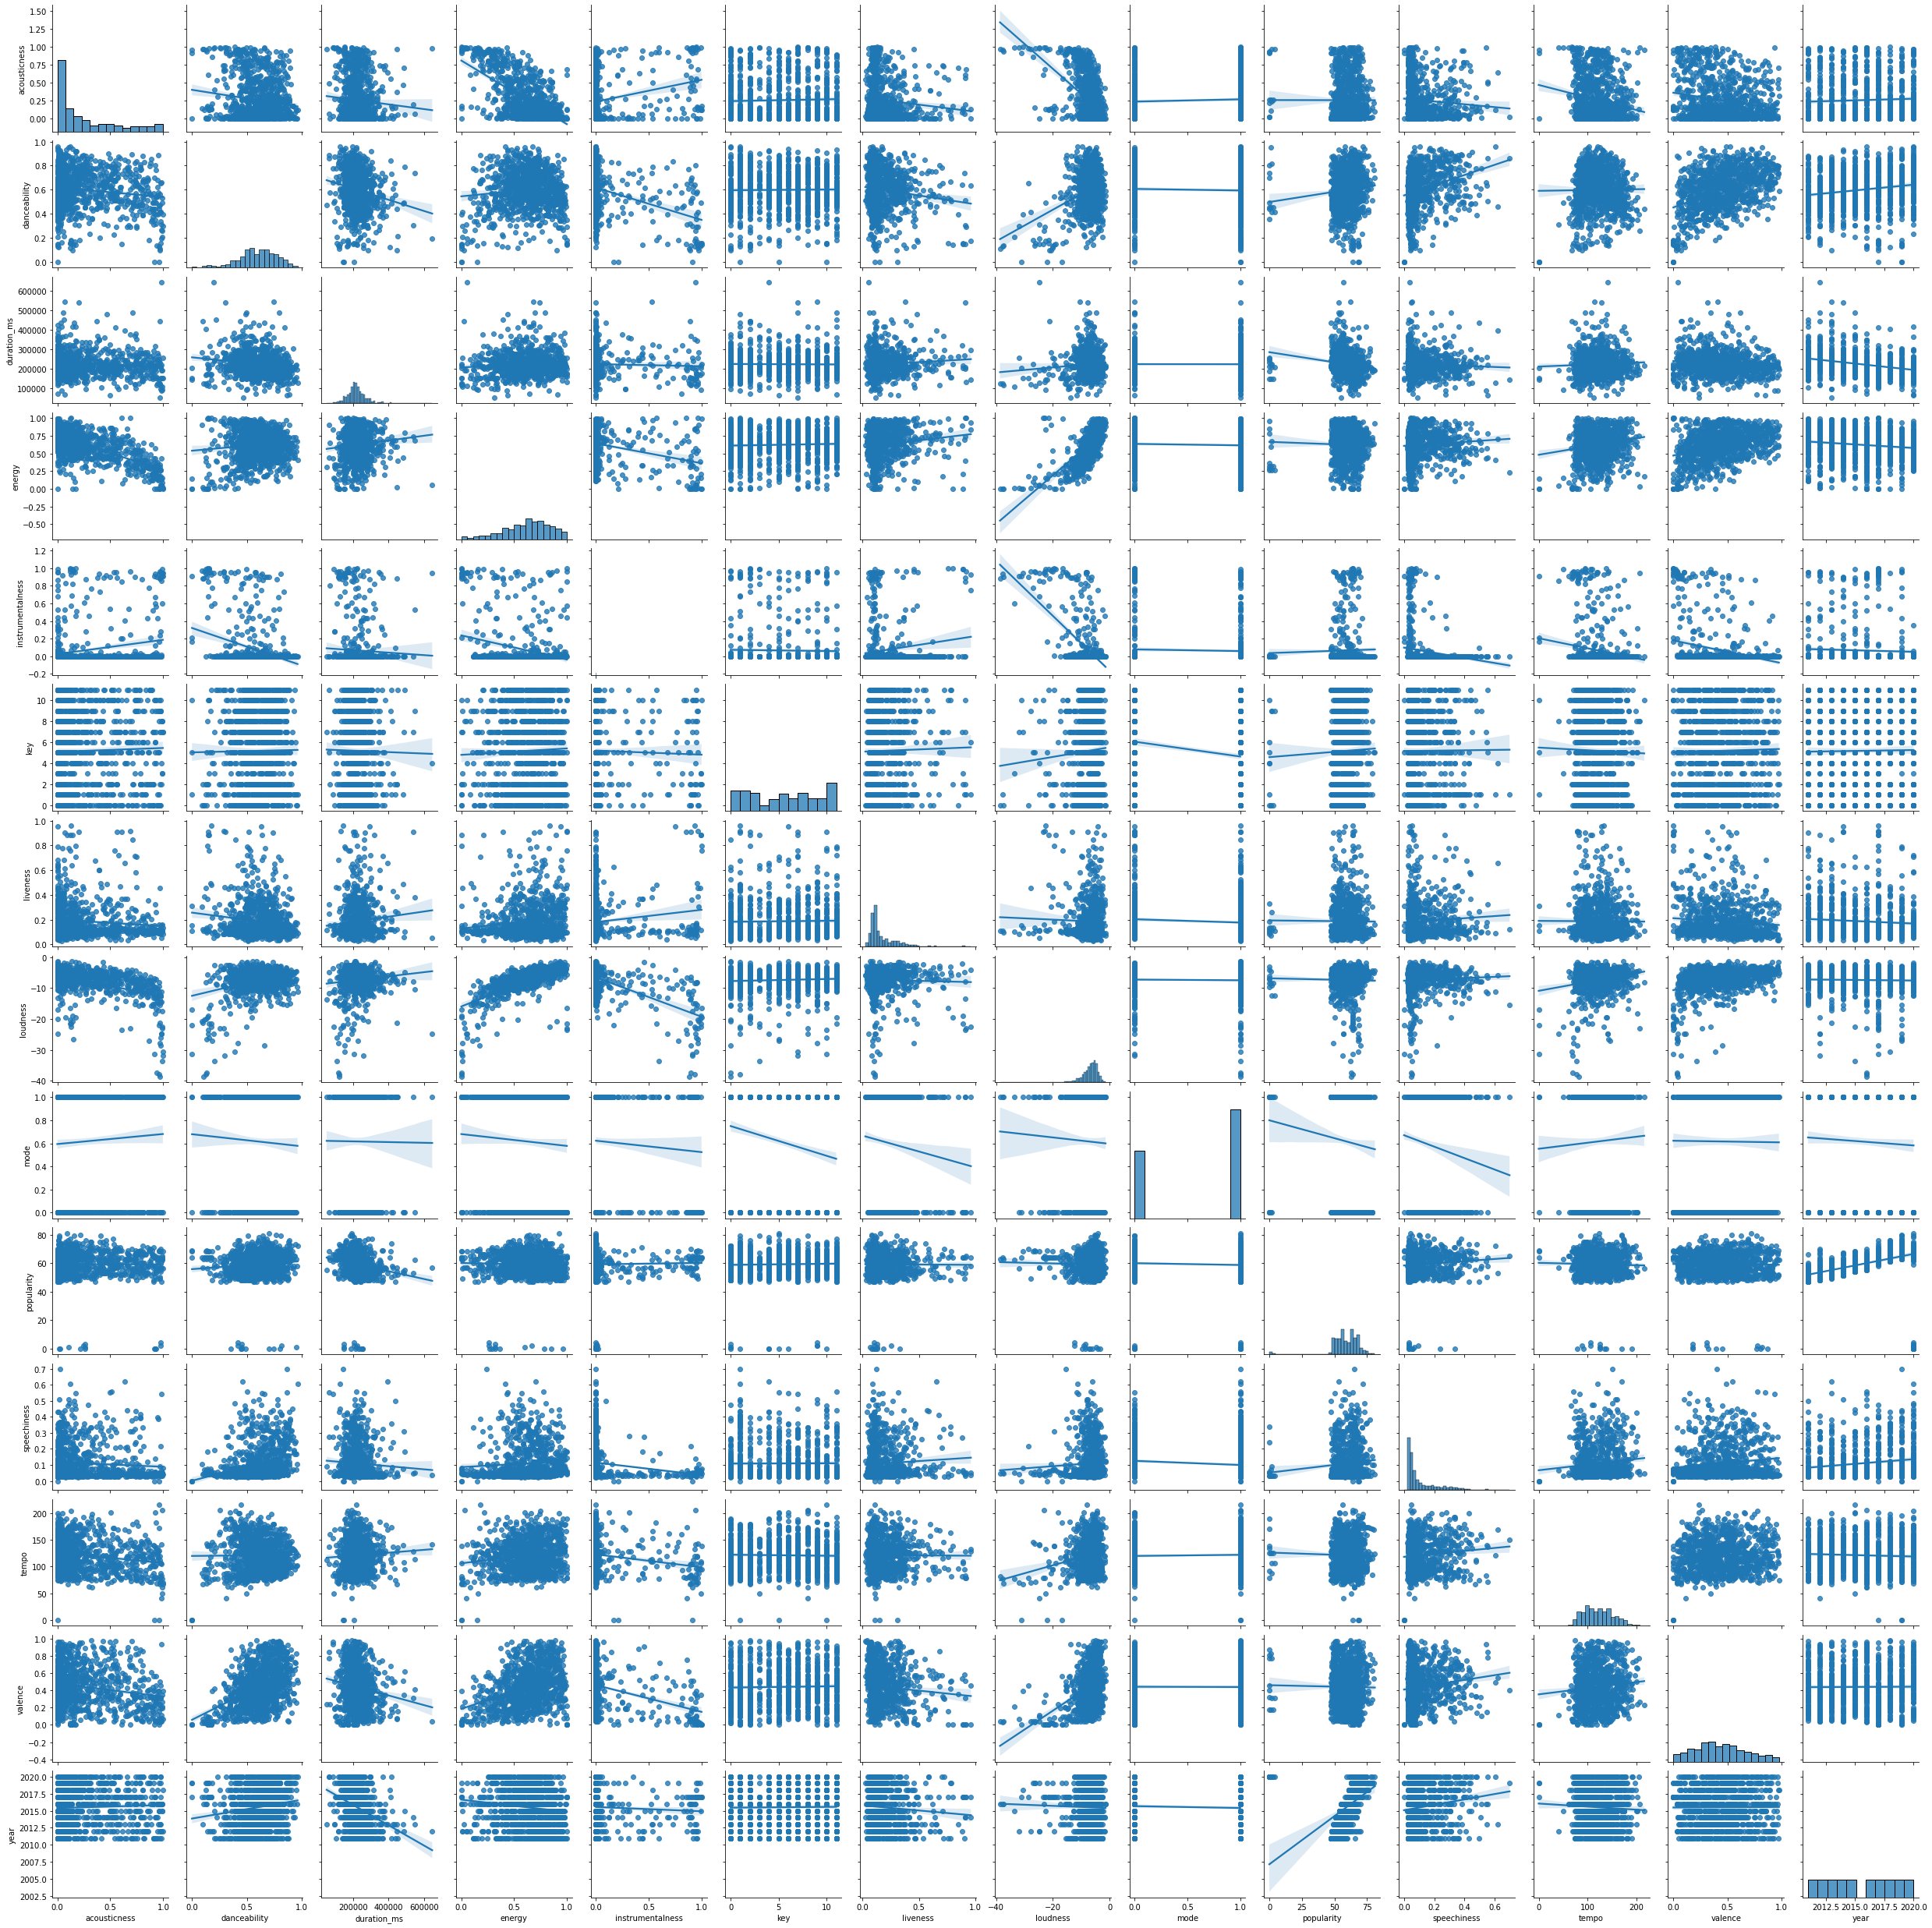

In [91]:
sns.pairplot(df, kind  ="reg");

Üstteki grafiğe göre;

* Değişkenlerin popülerliğe olan etkisini ve korelasyon eğrisini görebiliyoruz. 
* Year, speechiness, liveness, energy ve danceability değişkenlerinin popülerliğe olan etkisini, korelasyon eğrisini görebiliyoruz. 
* Mode, duration_ms ve acousticness değişkenlerinin popülerliğe olan etkisinin azaldığını, korelasyon eğrisinin eğiminin düşüşte olduğunu görebiliyoruz. 
* Liveness ve speechiness, energy ve danceability arasındaki korelasyonun azlığı da popülerlikteki varyasyonu açıklama noktasında yıl gibi enerji ve ses yüksekliği değişkenlerini de modelleme işleminde kullanabileceğimiz anlamına gelmektedir.

Şarkılardaki dans edilebilirlik oranının popülerliğe etkisini daha yakından inceleyelim

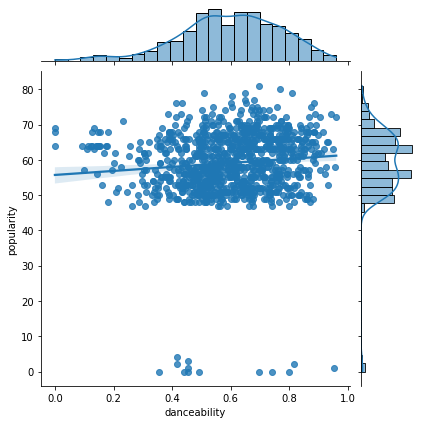

In [92]:
sns.jointplot(x = "danceability", y = "popularity", data = df, kind = "reg")

**Statsmodels ile Modelleme**

In [93]:
X = df[["danceability"]]
X[0:5]

danceability
168909         0.515
168910         0.573
168911         0.570
168912         0.638
168913         0.777

In [94]:
from warnings import filterwarnings
filterwarnings('ignore')
#uyarıları kapatmak icin

Elimizde tek değişkenli bir matris var ve regresyon problemini çözmek için, matris işlemlerinin yapılabilmesi için matrise sabit 1 ifadesi eklememiz gerekiyor (beta0 için kullanacağız).

In [95]:
X = sm.add_constant(data=X)
X[0:5]

const  danceability
168909    1.0         0.515
168910    1.0         0.573
168911    1.0         0.570
168912    1.0         0.638
168913    1.0         0.777

Bağımlı değişkenimizi de alıyoruz.

In [96]:
y = df["popularity"]
y[0:5]

168909    54
168910    52
168911    49
168912    54
168913    53
Name: popularity, dtype: int64

In [97]:
#modelin kurulması
lm = sm.OLS(y,X)
#modelin fit edilmesi
model = lm.fit()
#model ciktilarinin alinmasi
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     9.828
Date:                Mon, 13 Jun 2022   Prob (F-statistic):            0.00177
Time:                        14:54:19   Log-Likelihood:                -3691.3
No. Observations:                1000   AIC:                             7387.
Df Residuals:                     998   BIC:                             7396.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           55.7143      1.128     49.393      0.000      53.501      57.928
danceability     5.6871      1.814      3.135      0.002       2.127       9.247
==============================================================================
Omnibus:                      623.331   Durbin-Watson:                   0.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9700.855
Skew:                          -2.584   Prob(JB):                         0.00
Kurtosis:                      17.357   Cond. No.                         8.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**R-squared**:	Bağımsız değişkenin, bağımlı değişkendeki değişkenliği açıklama başarısı. Bu örnek için energy değişkeni popülerlikteki değişkenliğin %1'i gibi çok küçük bir kısmını açıklayabilmektedir. Bunun nedeni verileri son 10 yıldan çekmemiz. Son 10 yıldaki parçaların popülerlik değerleri çok değişmediğinden bunun gibi bir değerle karşılaştık.

**Adj. R-squared**: R'karenin her parametre eklendiğinde artmasına olan duyarlılığının törpülenmiş halidir.

**F-statistic**: Modelin anlamlılığının ifade edilmesi için kullanılan bir test istatistiğidir.

**Prob (F-statistic)**: F istatistiğinin p-value değeridir.

**const**: coef'le kesiştiği noktada beta0 değerini ifade etmektedir. Diğer değişkenlerde herhangi bir değişiklik olmadığında y'nin beklenen değerini ifade eder. beta0 eğrinin y eksenini kestiği noktayı ifade ediyordu. 

**energy**: coef'le kesiştiği noktada beta1 katsayısını ifade etmektedir. Aynı zamanda tablonun devamında güven aralıkları da verilmiş. Yine coef'le kesiştiği noktadan şu yorum da çıkartılabilir: danceability değerinde 1 birimlik bir artış olduğunda popülerlikte de 5.6871 kadar ortalama bir artış olması beklenir.

Sadece katsayıları görelim

In [98]:
model.params

const           55.714344
danceability     5.687149
dtype: float64

Katsayı detaylarını görelim

In [99]:
model.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

Katsayıların güven aralıkları

In [100]:
model.conf_int()

0          1
const         53.500853  57.927835
danceability   2.127333   9.246964

Modelin anlamlılığına dair p-value değerini görelim

In [101]:
model.f_pvalue

0.0017685630767459819

In [102]:
print("f_pvalue: ", "%.4f" % model.f_pvalue)

f_pvalue:  0.0018


f istatistiği

In [103]:
print("f_pvalue: ", "%.2f" % model.fvalue)

f_pvalue:  9.83


###### Modelin hata kareler ortalaması. 

**!** Ortalaması 60 olan popülerlik değişkeni için mse çok yüksek çıkmış.

In [104]:
model.mse_model

927.1052807203669

Düzeltilmiş r-kare değeri

In [105]:
model.rsquared_adj

0.008759860866099256

Modelden tahmin edilen y değerleri

In [106]:
model.fittedvalues[0:5]

168909    58.643226
168910    58.973080
168911    58.956019
168912    59.342745
168913    60.133259
dtype: float64

Gerçek y değerleri

In [107]:
y[0:5]

168909    54
168910    52
168911    49
168912    54
168913    53
Name: popularity, dtype: int64

Model denklemi

In [108]:
print("popularity = " +  str("%.2f" % model.params[0]) + " + danceability" + "*" + str("%.2f" % model.params[1]))

popularity = 55.71 + danceability*5.69


Modelin görsel olarak ifade edilmesi 

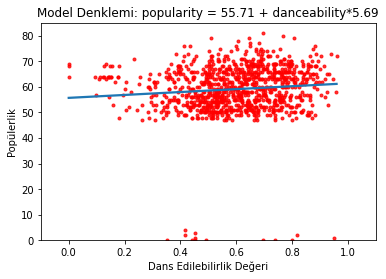

In [109]:
g = sns.regplot(df["danceability"], df["popularity"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: popularity = 55.71 + danceability*5.69")
g.set_ylabel("Popülerlik")
g.set_xlabel("Dans Edilebilirlik Değeri")
import matplotlib.pyplot as plt
plt.xlim(-0.1,1.1)
plt.ylim(bottom=0);

#### 5.1.1.2 Tahmin
Model Denklemi:

popularity = 55.71 + danceability*5.69

Örneğin danceability değeri (0'la 1 arasında) 0.67 olsun. O halde tahmini değer ne olur?

In [110]:
55.71 + 0.67*5.69

59.5223

In [111]:
from sklearn.linear_model import LinearRegression

X = df[["danceability"]]
y = df["popularity"]
reg = LinearRegression()
model = reg.fit(X, y)
model.predict([[0.67]])

array([59.52473388])

**Bilgi:** Üsttekinden farklı olmasının sebebi virgülden sonraki yuvarlama işleminde kaynaklanıyor.

Çoklu tahmin işlemi

In [112]:
yeni_veri = [[0.12],[0.43],[0.79]]
model.predict(yeni_veri)

array([56.39680201, 58.15981815, 60.20719175])

**Artıkların Makine Öğrenmesindeki Önemi**

In [113]:
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.formula.api as smf
lm = smf.ols("popularity ~ danceability", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     9.828
Date:                Mon, 13 Jun 2022   Prob (F-statistic):            0.00177
Time:                        14:54:21   Log-Likelihood:                -3691.3
No. Observations:                1000   AIC:                             7387.
Df Residuals:                     998   BIC:                             7396.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       55.7143      1.128     49.393      0.000      53.501      57.928
danceability     5.6871      1.814      3.135      0.002       2.127       9.247
==============================================================================
Omnibus:                      623.331   Durbin-Watson:                   0.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9700.855
Skew:                          -2.584   Prob(JB):                         0.00
Kurtosis:                      17.357   Cond. No.                         8.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Gerçek değerler ile tahmin edilen değerler arasındaki farkların karelerinin ortalamasını alalım.

In [114]:
mse = mean_squared_error(y, model.fittedvalues)
mse

94.1402057192796

In [115]:
rmse = np.sqrt(mse)
rmse

9.702587578542108

In [116]:
#model.predict(X)[0:10]

In [117]:
y[0:10]

168909    54
168910    52
168911    49
168912    54
168913    53
168914    49
168915    51
168916    53
168917    50
168918    57
Name: popularity, dtype: int64

Hata değerini gerçek değerden tahmin edilen değeri çıkartarak bulalım. Mantıken değer ne kadar 0'a yakın olursa hata oranı o kadar azdır çıkarımı yapabiliriz.

In [118]:
k_t = pd.DataFrame({"gercek_y" : y[0:10],
                   "tahmin_y" : model.predict(X)[0:10]})
k_t

gercek_y   tahmin_y
168909        54  58.643226
168910        52  58.973080
168911        49  58.956019
168912        54  59.342745
168913        53  60.133259
168914        49  60.724722
168915        51  59.012890
168916        53  59.951270
168917        50  59.883024
168918        57  58.102947

In [119]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t["hata_kare"] = k_t["hata"]**2
k_t

gercek_y   tahmin_y       hata   hata_kare
168909        54  58.643226  -4.643226   21.559546
168910        52  58.973080  -6.973080   48.623851
168911        49  58.956019  -9.956019   99.122314
168912        54  59.342745  -5.342745   28.544925
168913        53  60.133259  -7.133259   50.883381
168914        49  60.724722 -11.724722  137.469113
168915        51  59.012890  -8.012890   64.206414
168916        53  59.951270  -6.951270   48.320155
168917        50  59.883024  -9.883024   97.674169
168918        57  58.102947  -1.102947    1.216491

Toplam Hata

In [120]:
np.sum(k_t["hata_kare"])

597.6203595335095

Hata kareler ortalaması

In [121]:
np.mean(k_t["hata_kare"])

59.762035953350946

Hata kareler ortalamasının karekoku

In [122]:
np.sqrt(np.mean(k_t["hata_kare"]))

7.7305909187688195

Burada elde edilen hata katsayıları kullanılarak sonraki modellerin parametre optimizasyonları yapılır.

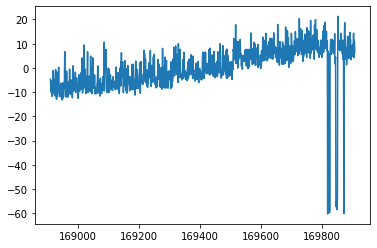

In [123]:
plt.plot(model.resid)

### 5.1.2 Çoklu Doğrusal Regresyon

Temel amaç, bağımlı ve bağımsız değişken**ler** arasındaki ilişkiyi ifade eden doğrusal fonksiyonu bulmaktır. Bağımlı değişkeni etkilediği düşünülen bağımsız değişkenlerden hangisinin ya da hangilerinin bağımlı değişkeni ne yönde ne şekilde etkilediğini tespit edebilmek için kullanılabilir.

**Verisetinin Eğitim ve Test Verisetlerine Bölünmesi**

In [124]:
df = st.copy()
df.head()

acousticness                        artists  danceability  \
168909      0.012600                ['The Strokes']         0.515   
168910      0.000009  ['Ted Poley', 'Tony Harnell']         0.573   
168911      0.001160                  ['Lady Gaga']         0.570   
168912      0.008030             ['The Black Keys']         0.638   
168913      0.414000                    ['Amy Liz']         0.777   

        duration_ms  energy explicit                      id  \
168909       255240   0.697        0  4ileLT7ldd2uX8bMemWqbm   
168910       139920   0.956        0  5CZNuQZszsDSa0VX7kpFsV   
168911       307893   0.923        0  2uk0YH2ahN0UE5jaCMa5jn   
168912       221027   0.709        0  3UD4sghkq8dHUwvKxln1nB   
168913       103493   0.111        0  7toIqSTfa9Phsmu2hKwTyx   

        instrumentalness  key  liveness  loudness  mode  \
168909          0.000343    6    0.0912    -5.850     0   
168910          0.000000    6    0.1300    -4.629     0   
168911          0.000009    5    0.1410    -3.433     1   
168912          0.000002    7    0.3350    -5.464     0   
168913          0.000000    4    0.4590   -14.423     1   

                                           name  popularity release_date  \
168909          Life Is Simple in the Moonlight          54   2011-03-18   
168910  Escape From The City ...for City Escape          52   2011-06-22   
168911                                     Hair          49   2011-01-01   
168912                            Dead and Gone          54   2011-12-06   
168913                            Slippery Fish          53   2011-12-12   

        speechiness    tempo  valence  year Tempolu mu  
168909       0.0313  134.893    0.513  2011     yüksek  
168910       0.0800  129.956    0.754  2011     yüksek  
168911       0.0630  135.006    0.403  2011     yüksek  
168912       0.0390  143.984    0.913  2011     yüksek  
168913       0.3350  139.888    0.556  2011     yüksek

Randomstate her üretme işleminde farklı değerler çıkmasını istemedigimizden rastgele bir değer veriyoruz.

In [125]:
X = df.drop("popularity", axis = 1)
y = df["popularity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 19)
(800,)
(200, 19)
(200,)


Verisetinin son 10 yılının kopyasını alalım.

In [126]:
training = df.copy()
training.shape

(1000, 20)

#### 5.1.2.1 Model

**Statsmodels ile modelleme**

Yorumlama yapmak gibi bir niyetimiz var ise statsmodels kullanmak daha avantajlı olacaktır. Ancak başlamadan önce X_train ve X_test adlı değişkenlerimizde yalnızca float64 ve int64 değerleri olan verileri çekelim.

In [127]:
X_train = X_train.select_dtypes(include = ["float64", "int64"])
X_test = X_test.select_dtypes(include = ["float64", "int64"])

In [128]:
lm = sm.OLS(y_train, X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             popularity   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              2662.
Date:                Mon, 13 Jun 2022   Prob (F-statistic):                        0.00
Time:                        14:54:21   Log-Likelihood:                         -2888.2
No. Observations:                 800   AIC:                                      5802.
Df Residuals:                     787   BIC:                                      5863.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
acousticness         0.2065      1.493      0.138      0.890      -2.724       3.137
danceability         3.7977      2.346      1.619      0.106      -0.807       8.403
duration_ms      -2.716e-05   5.29e-06     -5.136      0.000   -3.75e-05   -1.68e-05
energy              -1.2938      2.571     -0.503      0.615      -6.341       3.754
instrumentalness     1.0500      2.021      0.519      0.604      -2.918       5.018
key                  0.0988      0.091      1.084      0.279      -0.080       0.278
liveness             0.2932      2.158      0.136      0.892      -3.944       4.530
loudness             0.0621      0.137      0.454      0.650      -0.206       0.330
mode                -1.1214      0.677     -1.657      0.098      -2.450       0.207
speechiness          5.9369      3.160      1.878      0.061      -0.267      12.141
tempo               -0.0055      0.011     -0.526      0.599      -0.026       0.015
valence             -3.0846      1.710     -1.804      0.072      -6.442       0.273
year                 0.0327      0.002     18.208      0.000       0.029       0.036
==============================================================================
Omnibus:                      513.409   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9640.083
Skew:                          -2.576   Prob(JB):                         0.00
Kurtosis:                      19.207   Cond. No.                     2.47e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Rkare değerinin arttığı gözlemleniyor. artık bu verisetinde satış değişkeninin değişkenliğinin %97'ini açıklayabiliyoruz. p-value değeri oldukça düşük. katsayılardaki p-value değerlerine bakıldığında tüm değişkenlerin de anlamlı olduğu gözlemlenmekte.

**scikit-learn ile modelleme**

Diğer makine öürenmesi algoritmalarıyla uyumlu ancak yorumlama konusunda statsmodels kadar becerikli değildir.

In [129]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
#sabit katsayı
print(model.intercept_)
#bağımsız deşişken katsayıları 
print(model.coef_)

-3430.278638797015
[ 1.16322868e+00  1.39629384e+00 -5.48135358e-06  3.13146879e+00
  1.20992757e+00  1.04698220e-01  1.33843183e+00 -6.31918141e-02
 -6.85337186e-01 -1.16389148e+00  7.88027538e-04 -1.88803396e+00
  1.73043774e+00]


#### 5.1.2.2 Tahmin

Model denklemi:

popularity = -3430.27 + accousticness*1.16 + danceability*1.39 + duration.ms*(-5.48) + energy*3.13 + instrumentalness*1.2 + key*1.04 + liveness*1.33 + loudness*(-6.31) + mode*(-6.85) + speechiness*(-1.16) + tempo*7.88 + valence*(-1.88) + year*1.73

In [130]:
yeni_veri = [[0.21], [0.63], [230000], [0.58], [0.31], [4], [0.66], [0.47], [1], [0.73], [120], [0.7], [2017]]
yeni_veri = pd.DataFrame(yeni_veri).T
yeni_veri

0     1         2     3     4    5     6     7    8     9      10   11  \
0  0.21  0.63  230000.0  0.58  0.31  4.0  0.66  0.47  1.0  0.73  120.0  0.7   

       12  
0  2017.0

In [131]:
model.predict(yeni_veri)

array([60.57925381])

In [132]:
#eğitim hatası
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
rmse

7.734786367175137

In [133]:
#test hatası
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
rmse

11.176737382605939

#### 5.1.2.3. Model Tuning / Model Doğrulama

In [134]:
df = df.select_dtypes(include = ["float64", "int64"])
df.head()

acousticness  danceability  duration_ms  energy  instrumentalness  \
168909      0.012600         0.515       255240   0.697          0.000343   
168910      0.000009         0.573       139920   0.956          0.000000   
168911      0.001160         0.570       307893   0.923          0.000009   
168912      0.008030         0.638       221027   0.709          0.000002   
168913      0.414000         0.777       103493   0.111          0.000000   

        key  liveness  loudness  mode  popularity  speechiness    tempo  \
168909    6    0.0912    -5.850     0          54       0.0313  134.893   
168910    6    0.1300    -4.629     0          52       0.0800  129.956   
168911    5    0.1410    -3.433     1          49       0.0630  135.006   
168912    7    0.3350    -5.464     0          54       0.0390  143.984   
168913    4    0.4590   -14.423     1          53       0.3350  139.888   

        valence  year  
168909    0.513  2011  
168910    0.754  2011  
168911    0.403  2011  
168912    0.913  2011  
168913    0.556  2011

In [135]:
X = df.drop('popularity', axis=1)
y = df["popularity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=90)
lm = LinearRegression() 
model = lm.fit(X_train, y_train)

In [136]:
rmseTrain=np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
print(rmseTrain)
rmseTest=np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
print(rmseTest)
model.score(X_train, y_train)

7.696118846481772
11.249862005008275


0.29561993722478697

**Not:** Test ve train için eleman seçerken rastgelelilik kullanıyoruz ancak bu durum test skorlarımızı etkileyecektir. bunun için de cross validation (çapraz doğrulama) yöntemini kullanabiliriz. Aşağıda 10 çevrimlik bir cross validation gerçekleştirilip ortalamaları alınarak daha güvenilir bir hata bilgisine sahip olabiliriz.

Eğitim verileri için çapraz doğrulama ile elde edilmiş ortalama r2 skoru.

In [137]:
cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2").mean()

0.4079032417879776

Aşağıda neg_mean_squared_error'da sonuc negatif olacağı için aşağıda (-) ile çarpıyoruz

In [138]:
rmseTrain=np.sqrt(-cross_val_score(model, 
                X_train, 
                y_train, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()
print(rmseTrain)
rmseTest=np.sqrt(-cross_val_score(model, 
                X_test, 
                y_test, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()
print(rmseTest)

6.972291291050636
10.27406513496579


## 5.2 Doğrusal Olmayan Regresyon 

Bu başlıkta incelenecek Doğrusal Olmayan Regresyon yöntemleri:

* K En Yakın Komşu (KNN)
* Destek Vektör Regresyonu (SVR)
* Karar Ağaçları / Classification and Regression Trees (CART)
* Bagging (Bootstrap Aggregation)
* Extreme Gradient Boosting (XGBoost)
* LightGBM
* CatBoost

In [139]:
!pip install skompiler
!pip install astor
!pip install xgboost
!pip install catboost
!pip install lightgbm

### 5.2.1 K En Yakın Komşu (KNN)

KNN en basit anlamı ile içerisinde tahmin edilecek değerin bağımsız değişkenlerinin oluşturduğu vektörün en yakın komşularının hangi sınıfta yoğun olduğu bilgisi üzerinden sınıf tahmin etmeye dayanır.

İşlem Adımları;

* Komşu sayısını belirle (K)
* Bilinmeyen nokta ile diğer tüm noktalar arasındaki uzaklıkları hesapla
* Uzaklıkları sırala ve belirlenen K değerine göre en yakın K sayısındaki gözlemi seç
* Sınıflandırma yapılıyorsa en sık karşılaşılan sınıf, regresyon yapılıyor ise ortalama değeri tahmin değeri olarak belirle.

#### 5.2.1.1 Model

Model oluşturmaya başlamadan önce modeli oluşturmamıza engel olan iki değişkeni tablodan çıkartmamız gerekiyor. Ayrıca bilgisayarı zorlamamak için key değişkenini de çıkartıyorum. 

In [140]:
st = spotify.tail(1000)
df = st.drop("Tempolu mu", axis = 1)
df = df.drop("release_date", axis = 1)
df = df.drop("key", axis = 1)
st = df
df

acousticness                             artists  danceability  \
168909      0.012600                     ['The Strokes']         0.515   
168910      0.000009       ['Ted Poley', 'Tony Harnell']         0.573   
168911      0.001160                       ['Lady Gaga']         0.570   
168912      0.008030                  ['The Black Keys']         0.638   
168913      0.414000                         ['Amy Liz']         0.777   
...              ...                                 ...           ...   
169904      0.173000              ['DripReport', 'Tyga']         0.875   
169905      0.016700  ['Leon Bridges', 'Terrace Martin']         0.719   
169906      0.538000               ['Kygo', 'Oh Wonder']         0.514   
169907      0.071400       ['Cash Cash', 'Andy Grammer']         0.646   
169908      0.109000                  ['Ingrid Andress']         0.512   

        duration_ms  energy explicit                      id  \
168909       255240   0.697        0  4ileLT7ldd2uX8bMemWqbm   
168910       139920   0.956        0  5CZNuQZszsDSa0VX7kpFsV   
168911       307893   0.923        0  2uk0YH2ahN0UE5jaCMa5jn   
168912       221027   0.709        0  3UD4sghkq8dHUwvKxln1nB   
168913       103493   0.111        0  7toIqSTfa9Phsmu2hKwTyx   
...             ...     ...      ...                     ...   
169904       163800   0.443        1  4KppkflX7I3vJQk7urOJaS   
169905       167468   0.385        0  1ehhGlTvjtHo2e4xJFB0SZ   
169906       180700   0.539        0  52eycxprLhK3lPcRLbQiVk   
169907       167308   0.761        0  3wYOGJYD31sLRmBgCvWxa4   
169908       214787   0.428        0  60RFlt48hm0l4Fu0JoccOl   

        instrumentalness  liveness  loudness  mode  \
168909          0.000343    0.0912    -5.850     0   
168910          0.000000    0.1300    -4.629     0   
168911          0.000009    0.1410    -3.433     1   
168912          0.000002    0.3350    -5.464     0   
168913          0.000000    0.4590   -14.423     1   
...                  ...       ...       ...   ...   
169904          0.000032    0.0891    -7.461     1   
169905          0.031300    0.1110   -10.907     1   
169906          0.002330    0.1080    -9.332     1   
169907          0.000000    0.2220    -2.557     1   
169908          0.000000    0.1050    -7.387     1   

                                           name  popularity  speechiness  \
168909          Life Is Simple in the Moonlight          54       0.0313   
168910  Escape From The City ...for City Escape          52       0.0800   
168911                                     Hair          49       0.0630   
168912                            Dead and Gone          54       0.0390   
168913                            Slippery Fish          53       0.3350   
...                                         ...         ...          ...   
169904            Skechers (feat. Tyga) - Remix          75       0.1430   
169905           Sweeter (feat. Terrace Martin)          64       0.0403   
169906                         How Would I Know          70       0.1050   
169907                              I Found You          70       0.0385   
169908                    More Hearts Than Mine          65       0.0271   

          tempo  valence  year  
168909  134.893    0.513  2011  
168910  129.956    0.754  2011  
168911  135.006    0.403  2011  
168912  143.984    0.913  2011  
168913  139.888    0.556  2011  
...         ...      ...   ...  
169904  100.012    0.306  2020  
169905  128.000    0.270  2020  
169906  123.700    0.153  2020  
169907  129.916    0.472  2020  
169908   80.588    0.366  2020  

[1000 rows x 17 columns]

Kategorik değişkenleri dummies ediyoruz. Verisetimizin tek kategorik değişkeni explicit olduğundan sadece onu seçiyoruz. 

In [141]:
df = df.copy()
df = df.dropna()
dms = pd.get_dummies(df[["explicit"]])
y = df["popularity"]
X_ = df.drop(['popularity', 'artists', 'id', 'name'], axis=1).astype("float64")
X = pd.concat([X_, dms[["explicit_1"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

knn_model = KNeighborsRegressor().fit(X_train, y_train)
knn_model

KNeighborsRegressor()

X_train değişkenimizin ne hale geldiğini kontrol edelim.

In [142]:
X_train.head()

acousticness  danceability  duration_ms  energy  explicit  \
168991        0.5410         0.530     185933.0   0.455       0.0   
169900        0.0452         0.655     216107.0   0.719       0.0   
169698        0.1780         0.586     161139.0   0.539       1.0   
169803        0.0342         0.906     191502.0   0.638       0.0   
169307        0.2450         0.602     195707.0   0.755       0.0   

        instrumentalness  liveness  loudness  mode  speechiness    tempo  \
168991          0.000007    0.7550    -7.448   1.0       0.0284  117.883   
169900          0.000018    0.1090    -7.400   1.0       0.0368  124.034   
169698          0.000000    0.1050    -8.743   0.0       0.1990  158.116   
169803          0.000017    0.0725    -7.917   0.0       0.2560   99.959   
169307          0.000000    0.1780    -4.991   1.0       0.0710  159.965   

        valence    year  explicit_1  
168991    0.161  2011.0           0  
169900    0.435  2020.0           0  
169698    0.197  2018.0           1  
169803    0.789  2019.0           0  
169307    0.495  2014.0           0

Komşu sayısı default olarak 5'tir.

In [143]:
knn_model.n_neighbors 

5

Öklid şeklinde kümelenme vardır.

In [144]:
knn_model.effective_metric_

'euclidean'

#### 5.2.1.2 Tahmin

Kendi yazdığımız for döngüsü ile k değeri için çıkacak olan RMSE hata değerini gösterelim

In [145]:
y_pred = knn_model.predict(X_test)

print("test hatası:" , np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE = [] 
#cross validation yapmadan hatalara bir bakalim
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)


test hatası: 11.488310580759906
k = 1 için RMSE değeri:  0.10954451150103323
k = 2 için RMSE değeri:  5.749115874056926
k = 3 için RMSE değeri:  6.707585534579764
k = 4 için RMSE değeri:  7.4133269634265195
k = 5 için RMSE değeri:  7.966891489156859
k = 6 için RMSE değeri:  8.138475150651857
k = 7 için RMSE değeri:  8.266638139077395
k = 8 için RMSE değeri:  8.352160399162203
k = 9 için RMSE değeri:  8.39601120266203
k = 10 için RMSE değeri:  8.400435702985888


Şimdi de yukarıda yaptığımız işlemi yapan fonksiyonu kullanarak aynı aşamaları katedelim.

In [146]:
#GridSearchCV ile optimum k sayisinin belirlenmesi
knn_params = {'n_neighbors': np.arange(1,30,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

Girilen aralıkta, modelimiz için en uygun parametre değerini kaç bulduğuna bakalım.

In [147]:
knn_cv_model.best_params_["n_neighbors"]

29

In [148]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    #cross validation olmadan hatalar
    RMSE.append(rmse) 
    #cross validation kullanilarak alindan hatalar
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )


k = 1 için RMSE değeri:  0.10954451150103323 RMSE_CV değeri:  11.436199835026786
k = 2 için RMSE değeri:  5.749115874056926 RMSE_CV değeri:  10.312403534902359
k = 3 için RMSE değeri:  6.707585534579764 RMSE_CV değeri:  10.101411709187905
k = 4 için RMSE değeri:  7.4133269634265195 RMSE_CV değeri:  9.894472362553413
k = 5 için RMSE değeri:  7.966891489156859 RMSE_CV değeri:  9.74260197962194
k = 6 için RMSE değeri:  8.138475150651857 RMSE_CV değeri:  9.636051135267053
k = 7 için RMSE değeri:  8.266638139077395 RMSE_CV değeri:  9.536444951496609
k = 8 için RMSE değeri:  8.352160399162203 RMSE_CV değeri:  9.440835503280418
k = 9 için RMSE değeri:  8.39601120266203 RMSE_CV değeri:  9.361202659185274
k = 10 için RMSE değeri:  8.400435702985888 RMSE_CV değeri:  9.313043899105526


k=2 için train degil test setini denediğimizde

In [149]:
knn_tuned = KNeighborsRegressor(n_neighbors =2)
knn_tuned.fit(X_train, y_train)
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

12.38414308702867

In [150]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=29)

In [151]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

11.35803507482693

### 5.2.2. Destek Vektör Regresyonu (SVR)

Destek vektör regresyonu uyguladığımızda, çizeceğimiz aralığın maksimum noktayı içerisine almasını sağlamaktır. Bu çizilen maksimum aralıkların kestiği noktalara destek noktaları denir.

#### 5.2.2.1. Model (Doğrusal SVR)

Kategorik değişkenleri dummies ediyoruz. Verisetimizin tek kategorik değişkeni explicit olduğundan sadece onu seçiyoruz. 

In [152]:
df = df.copy()
df = df.dropna()
dms = pd.get_dummies(df[["explicit"]])
y = df["popularity"]
X_ = df.drop(['popularity', 'artists', 'id', 'name'], axis=1).astype("float64")
X = pd.concat([X_, dms[["explicit_1"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

Burada örnek olması açısından sadece energy parametresi alınıyor ancak tüm parametreleri de alabiliriz. Model tuning altinda tum parametreler icin de deneyecegiz.

In [153]:
X_train = pd.DataFrame(X_train["energy"])
X_test = pd.DataFrame(X_test["energy"])
svr_model = LinearSVR().fit(X_train, y_train)

In [154]:
svr_model.predict(X_train)[0:5]
#ilk değer için modelimizi deneyebiliriz

array([57.90522831, 59.02470144, 58.26142431, 58.68122673, 59.17735687])

In [155]:
#dogrusal modelimizin parametre katsayilari
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0])) 

y = 55.9758333335373 + 4.240428521035505 x


In [156]:
X_train["energy"][0:1]

168991    0.455
Name: energy, dtype: float64

Değerleri formülde yerine yazıp sonucu aldığımızda doğru y değerine ulaştığımızı görüyoruz.

In [157]:
55.95740460800174 + 4.1851380907816615*0.455

57.861642439307396

y_pred değişkenine model formülünü atıyoruz

In [158]:
y_pred = svr_model.predict(X_train)

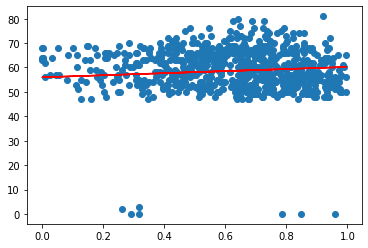

In [159]:
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred, color = "r")

svm modeli ile elde ettiğimiz parametre katsayilari

In [160]:
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = 60.7075723788052 + -2.1440652153402757 x


Lineer regresyon ile elde ettigimiz parametre katsayilari

In [161]:
60.7075723788052 + (-2.1440652153402757)*0.455

59.73202270582538

lineer regresyon modeliyle svm modelini görsel karsilastiralim

Text(0, 0.5, 'Popülerlik')

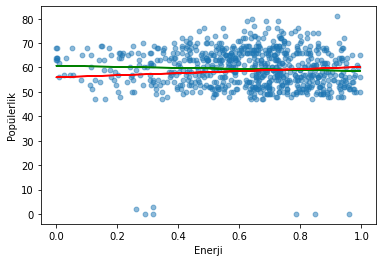

In [162]:
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, y_pred, color='r')

plt.xlabel("Enerji")
plt.ylabel("Popülerlik")

**Not:** Yukarıdaki grafik gözlemlendiğinde,

Lineer regresyon yöntemiyle elde edilen doğru (yeşil) enerji değerine göre daha az popüler olma eğilimindedir. bunun sebebi grafiğin altında görülen aykırı değerlerin lineer modelin tahminini aşağı çekmesidir.

SVR'de ise (robust bir yontem oldugundan) aykırı gözlemlerin etkisi daha düşüktür.

#### 5.2.2.2. Tahmin (Doğrusal SVR)

Doğrusal tahminimizin parametre katsayıları

In [163]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0])) 

y = 55.9758333335373 + 4.240428521035505 x


Modelimizin k = 91 için alacağı hata değerine bakalım.

In [164]:
svr_model.predict([[91]])

array([441.85482875])

Şimdi de X_test değişkenimizi aynı parametre yerine koyup hata değerini kontrol edelim.

In [165]:
y_pred = svr_model.predict(X_test)

In [166]:
np.sqrt(mean_squared_error(y_test, y_pred))

11.376872478919031

#### 5.2.2.3. Model Tuning (Doğrusal SVR)

0.1'den 2 ye kadar 0.1 arta arta giden bir dizi değişkeni tanımlıyoruz 

In [167]:
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

In [168]:
pd.Series(svr_cv_model.best_params_)[0]

1.9000000000000001

In [169]:
svr_tuned = LinearSVR(C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [170]:
y_pred = svr_tuned.predict(X_test)

In [171]:
np.sqrt(mean_squared_error(y_test, y_pred))

11.376234022306727

In [172]:
#svr modelin tum degiskenler icin calistirilmasi
df = st.copy()
df = df.dropna()
dms = pd.get_dummies(df[["explicit"]])
y = df["popularity"]
X_ = df.drop(['popularity', 'artists', 'id', 'name'], axis=1).astype("float64")
X = pd.concat([X_, dms[["explicit_1"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

svr_model = LinearSVR().fit(X_train, y_train)
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

print(pd.Series(svr_cv_model.best_params_)[0])

svr_tuned = LinearSVR(C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

0.2


11.84694085146633

In [173]:
svr_model.intercept_

array([1.56856656e-05])

In [174]:
svr_model.coef_

array([ 7.66576541e-06,  1.22788797e-05,  7.81089581e-05,  5.46934730e-06,
        1.48899634e-05,  4.59108377e-06,  2.16450522e-06, -2.34377443e-04,
        3.76378554e-06,  4.48566317e-06,  1.49769642e-03,  6.41089086e-06,
        3.18988049e-02,  1.48899634e-05])

#### 5.2.2.4. Model (Doğrusal Olmayan SVR)

Bir veriseti oluşturup lineer regresyon ile SVR'yi görsel olarak karşılaştıralım.

In [175]:
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)
#aykırı gözlemler
x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

In [176]:
#lineer regresyon
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

#SVR
eps = 0.1 #default degeri
svr = SVR(kernel='rbf', epsilon = eps)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])

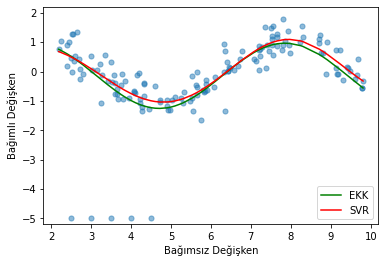

In [177]:
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color='r')
plt.xlabel("Bağımsız Değişken")
plt.ylabel("Bağımlı Değişken")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4);

**Not:** Grafikte sol altta eklenen aykırı değerlere dikkat edelim. Önceki bölümde olduğu gibi En Küçük Kareler yöntemini kullanan lineer regresyon yönteminin eğrisini aşağı çektiğini gözlemleyebiliriz.

In [178]:
df = st.copy()
df = df.dropna()
dms = pd.get_dummies(df[["explicit"]])
y = df["popularity"]
X_ = df.drop(['popularity', 'artists', 'id', 'name'], axis=1).astype("float64")
X = pd.concat([X_, dms[["explicit_1"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [179]:
svr_rbf = SVR(kernel="rbf").fit(X_train, y_train)

#### 5.2.2.5 Tahmin (Doğrusal Olmayan SVR)

In [180]:
y_pred = svr_rbf.predict(X_test)

In [181]:
np.sqrt(mean_squared_error(y_test, y_pred))

11.393036394420934

#### 5.2.2.6. Model Tuning (Doğrusal Olmayan SVR)

In [182]:
svr_params = {"C": [0.01, 0.1,0.4,5,10,20,30,40,50,60,70,80,90,100,110,120,130,140,200,300,400,500,600,700,800,900,1000,2000,3000,4000,5000,6000]}
svr_cv_model = GridSearchCV(svr_rbf,svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50, 60, 70,
                               80, 90, 100, 110, 120, 130, 140, 200, 300, 400,
                               500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, ...]})

In [183]:
svr_cv_model.best_params_

{'C': 0.4}

In [184]:
svr_tuned = SVR(kernel="rbf", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, 
                                                                        y_train)

In [185]:
y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

11.375483669656253

### 5.2.3 Karar Ağaçları / Classification and Regression Trees (CART)
Temel amaç veriseti içerisindeki karmaşık yapıları basit karar yapılarına dönüştürmektir.
Heterojen verisetleri belirlenmiş bir hedef değişkene göre homojen alt gruplara ayrılır.

#### 5.2.3.1 Model

In [186]:
df = st.copy()
df = df.dropna()
dms = pd.get_dummies(df[["explicit"]])
y = df["popularity"]
X_ = df.drop(['popularity', 'artists', 'id', 'name'], axis=1).astype("float64")
X = pd.concat([X_, dms[["explicit_1"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [187]:
#tek bir bagimsiz degiskenle deneyelim
X_train = pd.DataFrame(X_train["energy"])
X_test = pd.DataFrame(X_test["energy"])

In [188]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

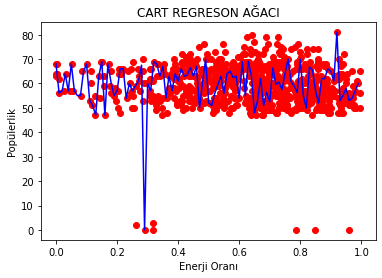

In [189]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESON AĞACI')  
plt.xlabel('Enerji Oranı') 
plt.ylabel('Popülerlik') ;

In [190]:
#skompiler kutuphanesi ile karar agacinin karar modelini python koduna ceviriyoruz
print(skompile(cart_model.predict).to('python/code'))

(((((68.0 if x[0] <= 0.00036559999989549397 else (63.0 if x[0] <= 
    0.0007519999926444143 else 64.0 if x[0] <= 0.0019699999829754233 else 
    63.0) if x[0] <= 0.0022749999770894647 else 68.0 if x[0] <= 
    0.0026000000070780516 else 64.0) if x[0] <= 0.0055550000397488475 else 
    (((((((((((62.0 if x[0] <= 0.008640000130981207 else (56.0 if x[0] <= 
    0.018080000299960375 else 57.0) if x[0] <= 0.029450000263750553 else 
    64.0 if x[0] <= 0.03910000063478947 else 57.0) if x[0] <= 
    0.04900000058114529 else 68.0) if x[0] <= 0.05299999937415123 else 57.0 if
    x[0] <= 0.06825000047683716 else 55.0) if x[0] <= 0.08310000225901604 else
    (65.0 if x[0] <= 0.09360000118613243 else 68.0) if x[0] <= 
    0.10700000077486038 else 53.0 if x[0] <= 0.11300000175833702 else 60.0 if
    x[0] <= 0.11549999937415123 else 65.0) if x[0] <= 0.11749999970197678 else
    ((51.0 if x[0] <= 0.12350000441074371 else 55.0) if x[0] <= 
    0.12849999964237213 else 47.0) if x[0] <= 0.1354999989271

#### 5.2.3.2. Tahmin

In [191]:
x = [91]

Az önce elde ettiğimiz karar ağacı python kodunu tahmin için test edelim.

In [192]:
(((((68.0 if x[0] <= 0.00036559999989549397 else (63.0 if x[0] <= 
    0.0007519999926444143 else 64.0 if x[0] <= 0.0019699999829754233 else 
    63.0) if x[0] <= 0.0022749999770894647 else 68.0 if x[0] <= 
    0.0026000000070780516 else 64.0) if x[0] <= 0.0055550000397488475 else 
    (((((((((((62.0 if x[0] <= 0.008640000130981207 else (56.0 if x[0] <= 
    0.018080000299960375 else 57.0) if x[0] <= 0.029450000263750553 else 
    64.0 if x[0] <= 0.03910000063478947 else 57.0) if x[0] <= 
    0.04900000058114529 else 68.0) if x[0] <= 0.05299999937415123 else 57.0 if
    x[0] <= 0.06825000047683716 else 55.0) if x[0] <= 0.08310000225901604 else
    (65.0 if x[0] <= 0.09360000118613243 else 68.0) if x[0] <= 
    0.10700000077486038 else 53.0 if x[0] <= 0.11300000175833702 else 60.0 if
    x[0] <= 0.11549999937415123 else 65.0) if x[0] <= 0.11749999970197678 else
    ((51.0 if x[0] <= 0.12350000441074371 else 55.0) if x[0] <= 
    0.12849999964237213 else 47.0) if x[0] <= 0.1354999989271164 else 63.0 if
    x[0] <= 0.14350000023841858 else 54.0) if x[0] <= 0.14649999886751175 else
    69.0 if x[0] <= 0.15399999916553497 else ((63.0 if x[0] <= 
    0.15700000524520874 else 59.0) if x[0] <= 0.15850000083446503 else 47.0
    ) if x[0] <= 0.16649999469518661 else 68.0 if x[0] <= 
    0.17599999904632568 else 59.0 if x[0] <= 0.17900000512599945 else 60.5) if
    x[0] <= 0.18550000339746475 else ((55.0 if x[0] <= 0.19250000268220901 else
    58.0) if x[0] <= 0.19449999928474426 else 53.0 if x[0] <= 
    0.19849999994039536 else 57.0) if x[0] <= 0.2030000016093254 else 50.0) if
    x[0] <= 0.2044999971985817 else 66.0 if x[0] <= 0.20549999922513962 else
    64.0) if x[0] <= 0.2070000022649765 else 48.0) if x[0] <= 
    0.20850000530481339 else (66.0 if x[0] <= 0.21150000393390656 else 64.0 if
    x[0] <= 0.21450000256299973 else 65.0 if x[0] <= 0.21700000017881393 else
    66.0) if x[0] <= 0.2264999970793724 else 54.0 if x[0] <= 
    0.2344999983906746 else (65.0 if x[0] <= 0.23900000005960464 else 60.0) if
    x[0] <= 0.2435000017285347 else 66.0) if x[0] <= 0.24450000375509262 else
    (56.0 if x[0] <= 0.24700000137090683 else 50.0) if x[0] <= 
    0.24949999898672104 else 57.0 if x[0] <= 0.2510000020265579 else 55.0) if
    x[0] <= 0.2524999976158142 else 69.0) if x[0] <= 0.2539999932050705 else
    ((50.0 if x[0] <= 0.2580000013113022 else 59.0) if x[0] <= 
    0.2615000009536743 else 2.0) if x[0] <= 0.2644999921321869 else (((66.0 if
    x[0] <= 0.26899999380111694 else 61.0 if x[0] <= 0.2719999998807907 else
    63.0) if x[0] <= 0.27400000393390656 else 57.0) if x[0] <= 
    0.2800000011920929 else 67.5) if x[0] <= 0.28550000488758087 else ((
    53.0 if x[0] <= 0.28700000047683716 else 60.0) if x[0] <= 
    0.2889999896287918 else 0.0) if x[0] <= 0.29349999129772186 else (((((
    60.0 if x[0] <= 0.30249999463558197 else 59.5) if x[0] <= 
    0.3084999918937683 else 60.5) if x[0] <= 0.30949999392032623 else 57.0) if
    x[0] <= 0.31049999594688416 else 62.0) if x[0] <= 0.3114999979734421 else
    66.0) if x[0] <= 0.3140000104904175 else 29.75 if x[0] <= 
    0.3175000101327896 else (((54.0 if x[0] <= 0.31949999928474426 else 
    69.0) if x[0] <= 0.32199999690055847 else 53.0 if x[0] <= 
    0.32500000298023224 else 51.0 if x[0] <= 0.32750000059604645 else 49.0) if
    x[0] <= 0.3295000046491623 else 68.0 if x[0] <= 0.3305000066757202 else
    ((63.0 if x[0] <= 0.33249999582767487 else 55.0) if x[0] <= 
    0.3344999998807907 else 68.0) if x[0] <= 0.3369999974966049 else 53.0 if
    x[0] <= 0.33949999511241913 else 63.0) if x[0] <= 0.34299999475479126 else
    50.0 if x[0] <= 0.3464999943971634 else 47.0) if x[0] <= 
    0.34800000488758087 else ((((((67.0 if x[0] <= 0.3505000025033951 else 
    60.0) if x[0] <= 0.35349999368190765 else 68.0 if x[0] <= 
    0.3564999997615814 else 64.0) if x[0] <= 0.35999999940395355 else (54.0 if
    x[0] <= 0.3629999905824661 else 48.0) if x[0] <= 0.36649999022483826 else
    ((((((((((((58.0 if x[0] <= 0.3699999898672104 else 63.0) if x[0] <= 
    0.37150000035762787 else 56.0) if x[0] <= 0.3739999979734421 else 64.0) if
    x[0] <= 0.3764999955892563 else 58.0 if x[0] <= 0.3774999976158142 else
    57.0) if x[0] <= 0.3804999887943268 else 66.0 if x[0] <= 
    0.3839999884366989 else 63.0) if x[0] <= 0.3854999989271164 else 54.0) if
    x[0] <= 0.3865000009536743 else 64.0 if x[0] <= 0.3879999965429306 else
    68.0 if x[0] <= 0.3894999921321869 else 64.0) if x[0] <= 
    0.39149999618530273 else ((57.0 if x[0] <= 0.39400000870227814 else 
    52.0) if x[0] <= 0.3955000042915344 else 66.0 if x[0] <= 
    0.39650000631809235 else 51.0 if x[0] <= 0.39750000834465027 else (61.0 if
    x[0] <= 0.40049999952316284 else 62.0) if x[0] <= 0.4035000056028366 else
    (58.0 if x[0] <= 0.40450000762939453 else 53.0) if x[0] <= 
    0.4060000032186508 else 60.0) if x[0] <= 0.4074999988079071 else 51.0) if
    x[0] <= 0.40950000286102295 else (66.0 if x[0] <= 0.4115000069141388 else
    70.0) if x[0] <= 0.4124999940395355 else ((53.0 if x[0] <= 
    0.41349999606609344 else 69.0) if x[0] <= 0.4150000065565109 else 54.0 if
    x[0] <= 0.4165000021457672 else 55.0) if x[0] <= 0.4179999977350235 else
    ((((((63.0 if x[0] <= 0.42249999940395355 else 57.0) if x[0] <= 
    0.42649999260902405 else 63.0 if x[0] <= 0.42749999463558197 else 65.0 if
    x[0] <= 0.42900000512599945 else 63.5) if x[0] <= 0.43050000071525574 else
    55.0) if x[0] <= 0.4324999898672104 else 70.0) if x[0] <= 
    0.43449999392032623 else 56.0) if x[0] <= 0.4360000044107437 else 
    64.66666666666667 if x[0] <= 0.4375 else 72.0 if x[0] <= 
    0.4385000020265579 else 66.0 if x[0] <= 0.43950000405311584 else 66.5) if
    x[0] <= 0.44050000607967377 else ((((58.333333333333336 if x[0] <= 
    0.4415000081062317 else 58.0) if x[0] <= 0.44349999725818634 else 50.0) if
    x[0] <= 0.44749999046325684 else 63.0 if x[0] <= 0.4519999921321869 else
    69.0) if x[0] <= 0.4545000046491623 else 54.5 if x[0] <= 
    0.4555000066757202 else 54.0) if x[0] <= 0.45649999380111694 else (63.0 if
    x[0] <= 0.4584999978542328 else 67.0 if x[0] <= 0.4610000103712082 else
    64.0) if x[0] <= 0.46299999952316284 else ((57.0 if x[0] <= 
    0.4659999907016754 else 62.0) if x[0] <= 0.4699999988079071 else 50.0 if
    x[0] <= 0.4724999964237213 else 53.0) if x[0] <= 0.4739999920129776 else
    (65.0 if x[0] <= 0.47599999606609344 else 64.0) if x[0] <= 
    0.4780000001192093 else 61.5 if x[0] <= 0.48000000417232513 else 60.5 if
    x[0] <= 0.4814999997615814 else 60.0) if x[0] <= 0.4829999953508377 else
    54.0) if x[0] <= 0.48499999940395355 else 76.0 if x[0] <= 
    0.48649999499320984 else 59.0 if x[0] <= 0.48749999701976776 else (66.0 if
    x[0] <= 0.48900000751018524 else 70.0) if x[0] <= 0.49050000309944153 else
    (64.0 if x[0] <= 0.49150000512599945 else 58.5) if x[0] <= 
    0.4925000071525574 else 65.5 if x[0] <= 0.4934999942779541 else 63.0 if
    x[0] <= 0.49549999833106995 else 64.5 if x[0] <= 0.49699999392032623 else
    63.0) if x[0] <= 0.5 else (((52.0 if x[0] <= 0.5024999976158142 else (
    58.5 if x[0] <= 0.50450000166893 else 57.0) if x[0] <= 
    0.5054999887943268 else 52.0) if x[0] <= 0.5065000057220459 else 68.0 if
    x[0] <= 0.5085000097751617 else 51.0 if x[0] <= 0.5104999840259552 else
    (61.0 if x[0] <= 0.5115000009536743 else 60.0) if x[0] <= 
    0.5125000178813934 else (58.0 if x[0] <= 0.5139999985694885 else 56.5) if
    x[0] <= 0.5164999961853027 else 59.5) if x[0] <= 0.5185000002384186 else
    50.0 if x[0] <= 0.5194999873638153 else 56.0) if x[0] <= 
    0.5209999978542328 else 73.0 if x[0] <= 0.5225000083446503 else 54.0 if
    x[0] <= 0.523499995470047 else (68.0 if x[0] <= 0.5244999825954437 else
    61.5) if x[0] <= 0.5264999866485596 else 52.0 if x[0] <= 
    0.5294999778270721 else 59.5) if x[0] <= 0.531499981880188 else (((66.5 if
    x[0] <= 0.5334999859333038 else (((58.5 if x[0] <= 0.534500002861023 else
    59.0) if x[0] <= 0.5355000197887421 else 63.0) if x[0] <= 
    0.5370000004768372 else 56.0) if x[0] <= 0.5384999811649323 else (
    66.33333333333333 if x[0] <= 0.5399999916553497 else 63.0 if x[0] <= 
    0.5415000021457672 else 65.0) if x[0] <= 0.5424999892711639 else 60.5) if
    x[0] <= 0.5439999997615814 else 56.0) if x[0] <= 0.5455000102519989 else
    76.0) if x[0] <= 0.546999990940094 else (60.0 if x[0] <= 
    0.5485000014305115 else 50.5 if x[0] <= 0.5495000183582306 else 56.0) if
    x[0] <= 0.5505000054836273 else ((67.0 if x[0] <= 0.551499992609024 else
    52.0) if x[0] <= 0.5524999797344208 else 73.0 if x[0] <= 
    0.5534999966621399 else (65.0 if x[0] <= 0.554500013589859 else 57.0) if
    x[0] <= 0.5555000007152557 else 68.0 if x[0] <= 0.5564999878406525 else
    65.0 if x[0] <= 0.5585000216960907 else 64.0) if x[0] <= 
    0.5604999959468842 else (((60.0 if x[0] <= 0.5625 else 57.5) if x[0] <=
    0.5640000104904175 else 63.0) if x[0] <= 0.5654999911785126 else 48.0) if
    x[0] <= 0.5664999783039093 else (61.0 if x[0] <= 0.5674999952316284 else
    (64.0 if x[0] <= 0.5690000057220459 else 65.0) if x[0] <= 
    0.5710000097751617 else 64.0) if x[0] <= 0.5730000138282776 else 57.75 if
    x[0] <= 0.5755000114440918 else (64.0 if x[0] <= 0.5785000026226044 else
    62.5) if x[0] <= 0.5804999768733978 else (59.666666666666664 if x[0] <=
    0.5814999938011169 else 54.0) if x[0] <= 0.5825000107288361 else (63.0 if
    x[0] <= 0.5839999914169312 else 65.0) if x[0] <= 0.5855000019073486 else
    (59.666666666666664 if x[0] <= 0.5865000188350677 else 
    60.333333333333336) if x[0] <= 0.5884999930858612 else 63.0) if x[0] <=
    0.590499997138977 else 51.0 if x[0] <= 0.5925000011920929 else 54.0) if
    x[0] <= 0.5940000116825104 else (((((64.0 if x[0] <= 0.5955000221729279
     else 71.0) if x[0] <= 0.5965000092983246 else 62.0 if x[0] <= 
    0.5974999964237213 else 67.0 if x[0] <= 0.598499983549118 else 66.0) if
    x[0] <= 0.5995000004768372 else 54.0) if x[0] <= 0.6019999980926514 else
    (71.0 if x[0] <= 0.6044999957084656 else (67.0 if x[0] <= 
    0.6060000061988831 else 66.5) if x[0] <= 0.6099999845027924 else 69.0) if
    x[0] <= 0.613999992609024 else 75.0) if x[0] <= 0.6155000030994415 else
    ((62.333333333333336 if x[0] <= 0.6169999837875366 else 62.0) if x[0] <=
    0.6199999749660492 else 55.0 if x[0] <= 0.6225000023841858 else 61.0) if
    x[0] <= 0.6235000193119049 else 73.0 if x[0] <= 0.6245000064373016 else
    (60.0 if x[0] <= 0.6259999871253967 else (66.0 if x[0] <= 
    0.6284999847412109 else 69.0) if x[0] <= 0.6304999887943268 else 61.0) if
    x[0] <= 0.6315000057220459 else 69.0) if x[0] <= 0.632500022649765 else
    ((52.0 if x[0] <= 0.6335000097751617 else 74.0) if x[0] <= 
    0.6349999904632568 else 49.5 if x[0] <= 0.6365000009536743 else 48.5) if
    x[0] <= 0.6375000178813934 else 72.0 if x[0] <= 0.6385000050067902 else
    54.0 if x[0] <= 0.6399999856948853 else (((63.0 if x[0] <= 
    0.6414999961853027 else 57.0) if x[0] <= 0.6425000131130219 else 
    66.33333333333333) if x[0] <= 0.6439999938011169 else 59.5 if x[0] <= 
    0.6455000042915344 else 58.5) if x[0] <= 0.6470000147819519 else 68.5 if
    x[0] <= 0.648499995470047 else 60.333333333333336) if x[0] <= 
    0.6494999825954437 else (48.0 if x[0] <= 0.6504999995231628 else ((((((
    ((62.0 if x[0] <= 0.651500016450882 else 52.0 if x[0] <= 
    0.652999997138977 else 67.0 if x[0] <= 0.6544999778270721 else 60.0) if
    x[0] <= 0.6554999947547913 else (55.833333333333336 if x[0] <= 
    0.6565000116825104 else 57.0) if x[0] <= 0.6585000157356262 else 53.0) if
    x[0] <= 0.6605000197887421 else ((59.666666666666664 if x[0] <= 
    0.6615000069141388 else 63.0 if x[0] <= 0.6624999940395355 else 62.5) if
    x[0] <= 0.6634999811649323 else 69.0) if x[0] <= 0.6644999980926514 else
    (55.0 if x[0] <= 0.6655000150203705 else 52.0) if x[0] <= 
    0.6665000021457672 else 68.0 if x[0] <= 0.6674999892711639 else 50.0 if
    x[0] <= 0.6689999997615814 else (62.0 if x[0] <= 0.6705000102519989 else
    61.0) if x[0] <= 0.6714999973773956 else 60.0) if x[0] <= 
    0.6730000078678131 else (56.666666666666664 if x[0] <= 
    0.675000011920929 else 54.0) if x[0] <= 0.6769999861717224 else 60.0) if
    x[0] <= 0.6784999966621399 else (47.0 if x[0] <= 0.679500013589859 else
    51.0) if x[0] <= 0.6809999942779541 else 59.5) if x[0] <= 
    0.6825000047683716 else 70.5 if x[0] <= 0.6835000216960907 else (60.0 if
    x[0] <= 0.6870000064373016 else 59.5) if x[0] <= 0.6885000169277191 else
    68.5) if x[0] <= 0.6895000040531158 else (56.333333333333336 if x[0] <=
    0.6904999911785126 else 55.5) if x[0] <= 0.6914999783039093 else 49.0) if
    x[0] <= 0.6924999952316284 else 70.5 if x[0] <= 0.6935000121593475 else
    56.0 if x[0] <= 0.6944999992847443 else 66.0) if x[0] <= 
    0.695499986410141 else (57.6 if x[0] <= 0.6965000033378601 else 52.0) if
    x[0] <= 0.6975000202655792 else 67.5 if x[0] <= 0.698500007390976 else 
    (51.0 if x[0] <= 0.6994999945163727 else 52.5) if x[0] <= 
    0.7010000050067902 else (66.0 if x[0] <= 0.703000009059906 else 64.0) if
    x[0] <= 0.7044999897480011 else 55.0 if x[0] <= 0.7054999768733978 else
    60.0) if x[0] <= 0.7064999938011169 else 50.0) if x[0] <= 
    0.7075000107288361 else (((((64.0 if x[0] <= 0.7089999914169312 else 
    66.33333333333333) if x[0] <= 0.710999995470047 else (((59.0 if x[0] <=
    0.7125000059604645 else ((65.0 if x[0] <= 0.7134999930858612 else 62.0) if
    x[0] <= 0.7144999802112579 else 65.0 if x[0] <= 0.7165000140666962 else
    63.0) if x[0] <= 0.7175000011920929 else 58.0 if x[0] <= 
    0.7184999883174896 else (61.5 if x[0] <= 0.7199999988079071 else 
    59.666666666666664) if x[0] <= 0.7215000092983246 else 63.0 if x[0] <= 
    0.7224999964237213 else 62.0) if x[0] <= 0.723499983549118 else 64.25) if
    x[0] <= 0.7245000004768372 else 56.0) if x[0] <= 0.7255000174045563 else
    69.0 if x[0] <= 0.726500004529953 else ((60.333333333333336 if x[0] <= 
    0.7274999916553497 else 61.0) if x[0] <= 0.7284999787807465 else 70.5) if
    x[0] <= 0.7294999957084656 else 60.5) if x[0] <= 0.7305000126361847 else
    54.333333333333336 if x[0] <= 0.7325000166893005 else 58.5) if x[0] <= 
    0.7345000207424164 else (72.0 if x[0] <= 0.7355000078678131 else 
    65.33333333333333) if x[0] <= 0.7364999949932098 else 75.0) if x[0] <= 
    0.7374999821186066 else (59.333333333333336 if x[0] <= 
    0.7394999861717224 else 57.5) if x[0] <= 0.7414999902248383 else 53.0) if
    x[0] <= 0.742499977350235 else (((65.0 if x[0] <= 0.7434999942779541 else
    69.0) if x[0] <= 0.7445000112056732 else 58.0 if x[0] <= 
    0.74549999833107 else 61.0) if x[0] <= 0.7464999854564667 else 69.0 if 
    x[0] <= 0.7475000023841858 else 71.0) if x[0] <= 0.7485000193119049 else
    (60.0 if x[0] <= 0.75 else 64.0) if x[0] <= 0.7520000040531158 else 
    59.5 if x[0] <= 0.7535000145435333 else 61.0) if x[0] <= 
    0.75450000166893 else (((((53.0 if x[0] <= 0.7560000121593475 else 50.0
    ) if x[0] <= 0.757500022649765 else 55.25) if x[0] <= 
    0.7585000097751617 else (63.0 if x[0] <= 0.7599999904632568 else 70.0) if
    x[0] <= 0.7615000009536743 else ((55.0 if x[0] <= 0.7630000114440918 else
    (61.0 if x[0] <= 0.7644999921321869 else 64.0) if x[0] <= 
    0.7654999792575836 else 56.0 if x[0] <= 0.7685000002384186 else 
    60.666666666666664) if x[0] <= 0.7740000188350677 else (57.0 if x[0] <=
    0.7790000140666962 else 59.0) if x[0] <= 0.7815000116825104 else 55.0 if
    x[0] <= 0.7824999988079071 else 57.0) if x[0] <= 0.7834999859333038 else
    66.0) if x[0] <= 0.7854999899864197 else 41.25) if x[0] <= 
    0.7874999940395355 else (((((((62.0 if x[0] <= 0.7884999811649323 else 
    62.0) if x[0] <= 0.7894999980926514 else 56.333333333333336 if x[0] <= 
    0.7905000150203705 else 67.0 if x[0] <= 0.7915000021457672 else 55.0) if
    x[0] <= 0.7930000126361847 else 63.0) if x[0] <= 0.7945000231266022 else
    51.0) if x[0] <= 0.7955000102519989 else 66.0 if x[0] <= 
    0.796999990940094 else 62.666666666666664) if x[0] <= 
    0.7985000014305115 else 54.5) if x[0] <= 0.7995000183582306 else 70.0 if
    x[0] <= 0.801499992609024 else 60.666666666666664 if x[0] <= 
    0.8039999902248383 else 64.0) if x[0] <= 0.8055000007152557 else (50.5 if
    x[0] <= 0.8070000112056732 else 51.0) if x[0] <= 0.8085000216960907 else
    (((55.0 if x[0] <= 0.8104999959468842 else (60.0 if x[0] <= 
    0.8149999976158142 else 62.5) if x[0] <= 0.8174999952316284 else 
    57.333333333333336) if x[0] <= 0.8194999992847443 else 50.0 if x[0] <= 
    0.8210000097751617 else 51.333333333333336) if x[0] <= 
    0.8225000202655792 else 73.0 if x[0] <= 0.8240000009536743 else ((60.0 if
    x[0] <= 0.8254999816417694 else 58.5) if x[0] <= 0.8264999985694885 else
    52.0) if x[0] <= 0.8275000154972076 else (60.5 if x[0] <= 
    0.8300000131130219 else 66.66666666666667) if x[0] <= 
    0.8325000107288361 else 57.5 if x[0] <= 0.8339999914169312 else 60.0) if
    x[0] <= 0.8355000019073486 else (((56.0 if x[0] <= 0.8370000123977661 else
    51.666666666666664 if x[0] <= 0.8384999930858612 else 57.0) if x[0] <= 
    0.8400000035762787 else 65.5 if x[0] <= 0.8415000140666962 else 61.0 if
    x[0] <= 0.8425000011920929 else 60.0 if x[0] <= 0.8434999883174896 else
    61.0) if x[0] <= 0.8464999794960022 else 29.5) if x[0] <= 
    0.8495000004768372 else ((((57.0 if x[0] <= 0.8510000109672546 else 
    67.0) if x[0] <= 0.8529999852180481 else (57.0 if x[0] <= 
    0.8544999957084656 else 50.0) if x[0] <= 0.8555000126361847 else 57.0) if
    x[0] <= 0.8564999997615814 else 61.5) if x[0] <= 0.8574999868869781 else
    74.0 if x[0] <= 0.8585000038146973 else 65.0) if x[0] <= 
    0.8595000207424164 else (((52.0 if x[0] <= 0.8620000183582306 else 54.5
    ) if x[0] <= 0.8645000159740448 else 50.5) if x[0] <= 
    0.8659999966621399 else (56.0 if x[0] <= 0.8684999942779541 else 62.0 if
    x[0] <= 0.87049999833107 else (55.5 if x[0] <= 0.8720000088214874 else 
    56.0) if x[0] <= 0.8735000193119049 else 58.5) if x[0] <= 
    0.8745000064373016 else 51.0 if x[0] <= 0.8754999935626984 else 55.5) if
    x[0] <= 0.8764999806880951 else (((62.0 if x[0] <= 0.8774999976158142 else
    62.0) if x[0] <= 0.8819999992847443 else 58.0) if x[0] <= 
    0.8844999969005585 else 67.5) if x[0] <= 0.8854999840259552 else (((
    50.0 if x[0] <= 0.8865000009536743 else 54.5) if x[0] <= 
    0.8875000178813934 else (62.0 if x[0] <= 0.8889999985694885 else 66.0) if
    x[0] <= 0.8904999792575836 else 56.5) if x[0] <= 0.8914999961853027 else
    (48.0 if x[0] <= 0.8925000131130219 else (51.0 if x[0] <= 
    0.8935000002384186 else 53.0) if x[0] <= 0.8950000107288361 else 48.0) if
    x[0] <= 0.8975000083446503 else (57.0 if x[0] <= 0.8994999825954437 else
    65.0) if x[0] <= 0.9004999995231628 else 50.0 if x[0] <= 
    0.9020000100135803 else 58.0 if x[0] <= 0.9050000011920929 else 55.0) if
    x[0] <= 0.909500002861023 else (((61.0 if x[0] <= 0.9120000004768372 else
    60.0) if x[0] <= 0.9154999852180481 else 62.0) if x[0] <= 
    0.9189999997615814 else 81.0) if x[0] <= 0.921999990940094 else (48.0 if
    x[0] <= 0.9239999949932098 else 54.0 if x[0] <= 0.9255000054836273 else
    52.0) if x[0] <= 0.926499992609024 else (70.0 if x[0] <= 
    0.9274999797344208 else 63.0) if x[0] <= 0.9289999902248383 else ((53.0 if
    x[0] <= 0.9305000007152557 else 51.0) if x[0] <= 0.9314999878406525 else
    48.0) if x[0] <= 0.9325000047683716 else 65.5 if x[0] <= 
    0.9335000216960907 else (57.0 if x[0] <= 0.9345000088214874 else 
    53.666666666666664) if x[0] <= 0.9359999895095825 else (64.0 if x[0] <=
    0.9375 else 65.5) if x[0] <= 0.9385000169277191 else (58.0 if x[0] <= 
    0.9399999976158142 else 55.0 if x[0] <= 0.9414999783039093 else 52.0 if
    x[0] <= 0.9424999952316284 else 53.0) if x[0] <= 0.9435000121593475 else
    (62.0 if x[0] <= 0.9449999928474426 else (55.0 if x[0] <= 
    0.9469999969005585 else 56.0) if x[0] <= 0.948500007390976 else 60.0 if
    x[0] <= 0.9494999945163727 else 58.0) if x[0] <= 0.9510000050067902 else
    64.0) if x[0] <= 0.9539999961853027 else (52.0 if x[0] <= 
    0.9569999873638153 else 28.0) if x[0] <= 0.9589999914169312 else ((53.0 if
    x[0] <= 0.9605000019073486 else 51.0) if x[0] <= 0.9670000076293945 else
    (54.0 if x[0] <= 0.9705000221729279 else 65.0) if x[0] <= 
    0.9715000092983246 else (((51.0 if x[0] <= 0.9724999964237213 else 54.0
    ) if x[0] <= 0.973499983549118 else 59.0 if x[0] <= 0.9745000004768372 else
    56.0) if x[0] <= 0.9760000109672546 else 50.5 if x[0] <= 
    0.9779999852180481 else 57.0 if x[0] <= 0.9814999997615814 else 50.0) if
    x[0] <= 0.9850000143051147 else (61.0 if x[0] <= 0.9880000054836273 else
    60.0) if x[0] <= 0.9925000071525574 else 53.0) if x[0] <= 
    0.9959999918937683 else 65.0)

65.0

In [193]:
X_test[0:5]

energy
169430   0.626
169646   0.379
169649   0.626
169569   0.996
169320   0.384

In [194]:
cart_model.predict(X_test)[0:5]

array([60., 57., 60., 53., 63.])

In [195]:
cart_model.predict([[91]])

array([65.])

Yukarıda görüldüğü gibi elimizle test ettiğmiz değerle aynı sonuca ulaştık.

In [196]:
y_pred =cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

13.818469926555222

#### 5.2.3.3. Model Tuning

In [197]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [198]:
np.sqrt(mean_squared_error(y_test, y_pred))

13.818469926555222

In [199]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}

In [200]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

En iyi model parametrelerini bulalım.

In [201]:
cart_cv_model.best_params_

{'max_leaf_nodes': 4, 'min_samples_split': 95}

Bulduğumuz parametre değerlerini yerine yazalım. 

In [202]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 4, min_samples_split = 95)

In [203]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=4, min_samples_split=95)

In [204]:
y_pred = cart_tuned.predict(X_test)

In [205]:
np.sqrt(mean_squared_error(y_test, y_pred))

11.355418803950544

In [206]:
df = st.copy()
df = df.dropna()
dms = pd.get_dummies(df[["explicit"]])
y = df["popularity"]
X_ = df.drop(['popularity', 'artists', 'id', 'name'], axis=1).astype("float64")
X = pd.concat([X_, dms[["explicit_1"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

#ilkel test hatasina bir bakalim
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

#cross validation
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)
cart_cv_model.fit(X_train, y_train)
print(cart_cv_model.best_params_)
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = cart_cv_model.best_params_['max_leaf_nodes'], 
                                   min_samples_split = cart_cv_model.best_params_['min_samples_split'])
cart_tuned.fit(X_train, y_train)
y_pred = cart_tuned.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

11.715587906716419
{'max_leaf_nodes': 6, 'min_samples_split': 22}
9.921072892837122


### 5.2.4 Bagged Trees Regresyon
Temeli, Boostrap yöntemi ile oluşturulan birden fazla karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.

#### 5.2.4.1. Model

In [207]:
df = st.copy()
df = df.dropna()
dms = pd.get_dummies(df[["explicit"]])
y = df["popularity"]
X_ = df.drop(['popularity', 'artists', 'id', 'name'], axis=1).astype("float64")
X = pd.concat([X_, dms[["explicit_1"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [208]:
#bootstrap_features default degeri false. Biz bootstrap orneklerini gozlemlemek icin true verdik
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [209]:
#tahminci sayisi
bag_model.n_estimators

10

In [210]:
#10 adet agac
bag_model.estimators_

[DecisionTreeRegressor(random_state=2101820259),
 DecisionTreeRegressor(random_state=1657621358),
 DecisionTreeRegressor(random_state=1970697566),
 DecisionTreeRegressor(random_state=1953491958),
 DecisionTreeRegressor(random_state=1299135882),
 DecisionTreeRegressor(random_state=2018697738),
 DecisionTreeRegressor(random_state=1324368897),
 DecisionTreeRegressor(random_state=570919654),
 DecisionTreeRegressor(random_state=2114274255),
 DecisionTreeRegressor(random_state=407076730)]

In [211]:
#her bir agacin ornekleri
bag_model.estimators_samples_

[array([711, 186, 399, 436,  67, 278, 428, 660, 128, 397, 211, 125, 197,
        602,  53, 143, 152,  16, 327, 606,  90, 301, 161,  97, 416, 225,
        608, 225, 616,  33, 480, 291, 733, 644,  39, 273, 271, 306, 510,
        341,  61, 552, 369, 382, 364, 636,  56, 485, 130, 726, 276,   4,
        285,  48, 391, 594, 506, 616, 600, 719, 216, 649, 497, 466, 630,
        368, 672, 385,  83, 656, 619, 492,  18, 630, 643,  41, 738, 340,
        257, 409, 438, 103, 343, 693, 510, 125, 297,  21, 173, 203, 481,
         37, 165, 533, 105, 306, 237, 692, 683, 498, 130, 714, 195, 696,
        384, 144,  13, 624,  37, 192, 203, 710, 181, 109, 670, 694, 204,
        682, 192, 304,  91, 552, 689, 401, 145,  73,  87,  96, 225, 421,
        426, 277, 312, 673, 154, 666, 690, 333, 683, 132, 259, 433, 451,
          5, 363, 249, 267, 584, 314, 674, 468, 366, 564, 453, 354, 713,
        457, 572, 108, 313, 294, 256, 253, 190, 449, 335, 298, 441, 345,
        195, 583, 107, 573, 259, 314, 229, 534, 306

#### 5.2.4.2. Tahmin

In [212]:
y_pred = bag_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

8.887524402216853

In [213]:
iki_y_pred = bag_model.estimators_[1].fit(X_train, y_train).predict(X_test)

In [214]:
np.sqrt(mean_squared_error(y_test, iki_y_pred))

11.656114275349227

In [215]:
yedi_y_pred = bag_model.estimators_[6].fit(X_train, y_train).predict(X_test)

In [216]:
np.sqrt(mean_squared_error(y_test, yedi_y_pred))

13.182526313267878

#### 5.2.4.3. Model Tuning

In [217]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [218]:
bag_params = {"n_estimators": range(2,20)}

In [219]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)

In [220]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 20)})

In [221]:
bag_cv_model.best_params_

{'n_estimators': 11}

In [222]:
bag_tuned = BaggingRegressor( n_estimators = 11, random_state = 42)

In [223]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(n_estimators=11, random_state=42)

In [224]:
y_pred = bag_tuned.predict(X_test)

In [225]:
np.sqrt(mean_squared_error(y_test, y_pred))

10.110725015080694

### 5.2.5 XGBoost (eXtreme Gradient Boosting)
XGBoost, GBM'in hız ve tahmin performansını arttırmak üzere optimize edilmiş; ölçeklenebilir ve farklı platformlara entegre edilebilir halidir.
    
    R, Python, Hadoop, Scala, Julia ile kullanılabilir
    Ölçeklenebilir
    Hızlı
    Tahmin başarısı yüksek
    Birçok kaggle yarışmasında başarısını kanıtlamış.

#### 5.2.5.1 Model

In [226]:
df = st.copy()
df = df.dropna()
dms = pd.get_dummies(df[["explicit"]])
y = df["popularity"]
X_ = df.drop(['popularity', 'artists', 'id', 'name'], axis=1).astype("float64")
X = pd.concat([X_, dms[["explicit_1"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [227]:
#pandas ya da numpy yerine modelin kendi dataframeini kullanırsak daha performanslı calıstigi soylenmis.
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [228]:
#pandas dataframei ile de kullanılabilir.
xgb_model = XGBRegressor().fit(X_train, y_train)

#### 5.2.5.2 Tahmin

In [229]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

8.787335593779808

#### 5.2.5.3 Model Tuning

In [230]:
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [231]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}

In [232]:
t1 =  datetime.now()

xgb = XGBRegressor()
xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)

xgb_cv.fit(X_train, y_train)

t2 =  datetime.now()
print(t2-t1)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits
0:03:48.483076


In [233]:
xgb_cv.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.01,
 'max_depth': 6,
 'n_estimators': 1000}

In [234]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.4, 
                         learning_rate = 0.01, 
                         max_depth = 6, 
                         n_estimators = 1000) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [235]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

7.978448403608155

### 5.2.6 Light GBM
Light GBM, XGBoost'un eğitim süresini azaltmaya yönelik geliştirilmiş bir diğer GBM türüdür.

2017 yılında Microsoft tarafından geliştirilmiştir.

    Daha performanslıdır.
    Level-wise büyüme stratejisi yerine Leaf-wise büyüme stratejisi kullanır.
    Breadth-first search (BSF) yerine depth-first search (DFS) arama algoritmasını kullanır.

#### 5.2.6.1 Model

In [236]:
df = st.copy()
df = df.dropna()
dms = pd.get_dummies(df[["explicit"]])
y = df["popularity"]
X_ = df.drop(['popularity', 'artists', 'id', 'name'], axis=1).astype("float64")
X = pd.concat([X_, dms[["explicit_1"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [237]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

#### 5.2.6.2 Tahmin

In [238]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)

In [239]:
np.sqrt(mean_squared_error(y_test, y_pred))

7.961796030002483

#### 5.2.6.3 Model Tuning

In [240]:
lgbm_model

LGBMRegressor()

In [241]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [242]:
t1 =  datetime.now()
lgbm_cv_model.fit(X_train, y_train)
t2 =  datetime.now()
print(t2-t1)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits
0:03:18.101474


In [243]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.1,
 'max_depth': 8,
 'n_estimators': 200}

In [244]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 8, 
                           n_estimators = 200,
                          colsample_bytree = 0.9)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [245]:
y_pred = lgbm_tuned.predict(X_test)

In [246]:
np.sqrt(mean_squared_error(y_test, y_pred))

7.830503512784827

### 5.2.7. CatBoost

Kategorik değişkenler ile otomatik olarak ücadele edebilen, hızlı, başarılı bir diğer GBM türevidir.
2017 yılında Yandex tarafından geliştirilmiştir.

    Kategorik değişken desteği vardır.
    Hızlı ve ölçeklenebilir GPU desteği vardır.
    Hızlı train ve hızlı tahmin yapar

#### 5.2.7.1. Model

In [247]:
df = st.copy()
df = df.dropna()
dms = pd.get_dummies(df[["explicit"]])
y = df["popularity"]
X_ = df.drop(['popularity', 'artists', 'id', 'name'], axis=1).astype("float64")
X = pd.concat([X_, dms[["explicit_1"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [248]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

Learning rate set to 0.039124
0:	learn: 9.0126988	total: 190ms	remaining: 3m 10s
1:	learn: 8.8849038	total: 193ms	remaining: 1m 36s
2:	learn: 8.7720980	total: 195ms	remaining: 1m 4s
3:	learn: 8.6490192	total: 198ms	remaining: 49.2s
4:	learn: 8.5463996	total: 200ms	remaining: 39.9s
5:	learn: 8.4490866	total: 203ms	remaining: 33.6s
6:	learn: 8.3378143	total: 205ms	remaining: 29.1s
7:	learn: 8.1969379	total: 208ms	remaining: 25.8s
8:	learn: 8.0835467	total: 211ms	remaining: 23.3s
9:	learn: 7.9381426	total: 215ms	remaining: 21.2s
10:	learn: 7.8347104	total: 217ms	remaining: 19.5s
11:	learn: 7.7210969	total: 219ms	remaining: 18.1s
12:	learn: 7.6392997	total: 222ms	remaining: 16.8s
13:	learn: 7.5624064	total: 224ms	remaining: 15.8s
14:	learn: 7.4743763	total: 227ms	remaining: 14.9s
15:	learn: 7.4222380	total: 229ms	remaining: 14.1s
16:	learn: 7.3546310	total: 232ms	remaining: 13.4s
17:	learn: 7.2610271	total: 234ms	remaining: 12.8s
18:	learn: 7.1588549	total: 236ms	remaining: 12.2s
19:	learn

160:	learn: 3.3618124	total: 527ms	remaining: 2.75s
161:	learn: 3.3521541	total: 530ms	remaining: 2.74s
162:	learn: 3.3456877	total: 532ms	remaining: 2.73s
163:	learn: 3.3377197	total: 534ms	remaining: 2.72s
164:	learn: 3.3317748	total: 536ms	remaining: 2.71s
165:	learn: 3.3230063	total: 538ms	remaining: 2.7s
166:	learn: 3.3167141	total: 540ms	remaining: 2.69s
167:	learn: 3.3074917	total: 542ms	remaining: 2.68s
168:	learn: 3.2941635	total: 544ms	remaining: 2.67s
169:	learn: 3.2855009	total: 546ms	remaining: 2.67s
170:	learn: 3.2790650	total: 548ms	remaining: 2.65s
171:	learn: 3.2702819	total: 550ms	remaining: 2.65s
172:	learn: 3.2611929	total: 552ms	remaining: 2.64s
173:	learn: 3.2489216	total: 555ms	remaining: 2.63s
174:	learn: 3.2385886	total: 556ms	remaining: 2.62s
175:	learn: 3.2322218	total: 558ms	remaining: 2.61s
176:	learn: 3.2219311	total: 560ms	remaining: 2.6s
177:	learn: 3.2147719	total: 562ms	remaining: 2.6s
178:	learn: 3.2049073	total: 564ms	remaining: 2.59s
179:	learn: 3.1

324:	learn: 2.3255368	total: 863ms	remaining: 1.79s
325:	learn: 2.3243279	total: 865ms	remaining: 1.79s
326:	learn: 2.3176383	total: 867ms	remaining: 1.78s
327:	learn: 2.3156111	total: 869ms	remaining: 1.78s
328:	learn: 2.3132485	total: 871ms	remaining: 1.77s
329:	learn: 2.3072618	total: 873ms	remaining: 1.77s
330:	learn: 2.3043210	total: 875ms	remaining: 1.77s
331:	learn: 2.3010764	total: 876ms	remaining: 1.76s
332:	learn: 2.2941426	total: 878ms	remaining: 1.76s
333:	learn: 2.2897951	total: 880ms	remaining: 1.75s
334:	learn: 2.2859948	total: 882ms	remaining: 1.75s
335:	learn: 2.2795067	total: 884ms	remaining: 1.75s
336:	learn: 2.2741809	total: 886ms	remaining: 1.74s
337:	learn: 2.2694007	total: 888ms	remaining: 1.74s
338:	learn: 2.2686855	total: 890ms	remaining: 1.74s
339:	learn: 2.2619635	total: 892ms	remaining: 1.73s
340:	learn: 2.2590720	total: 894ms	remaining: 1.73s
341:	learn: 2.2534567	total: 896ms	remaining: 1.72s
342:	learn: 2.2495912	total: 898ms	remaining: 1.72s
343:	learn: 

508:	learn: 1.7231151	total: 1.2s	remaining: 1.16s
509:	learn: 1.7207578	total: 1.2s	remaining: 1.16s
510:	learn: 1.7186918	total: 1.21s	remaining: 1.15s
511:	learn: 1.7161999	total: 1.21s	remaining: 1.15s
512:	learn: 1.7143087	total: 1.21s	remaining: 1.15s
513:	learn: 1.7122360	total: 1.21s	remaining: 1.15s
514:	learn: 1.7076908	total: 1.21s	remaining: 1.14s
515:	learn: 1.7055120	total: 1.22s	remaining: 1.14s
516:	learn: 1.7016275	total: 1.22s	remaining: 1.14s
517:	learn: 1.6998474	total: 1.22s	remaining: 1.14s
518:	learn: 1.6969335	total: 1.22s	remaining: 1.13s
519:	learn: 1.6947132	total: 1.22s	remaining: 1.13s
520:	learn: 1.6944676	total: 1.23s	remaining: 1.13s
521:	learn: 1.6924307	total: 1.23s	remaining: 1.12s
522:	learn: 1.6919762	total: 1.23s	remaining: 1.12s
523:	learn: 1.6887024	total: 1.23s	remaining: 1.12s
524:	learn: 1.6866371	total: 1.23s	remaining: 1.11s
525:	learn: 1.6841258	total: 1.24s	remaining: 1.11s
526:	learn: 1.6810670	total: 1.24s	remaining: 1.11s
527:	learn: 1.

694:	learn: 1.3364578	total: 1.54s	remaining: 677ms
695:	learn: 1.3330634	total: 1.54s	remaining: 674ms
696:	learn: 1.3300523	total: 1.55s	remaining: 672ms
697:	learn: 1.3296960	total: 1.55s	remaining: 670ms
698:	learn: 1.3295735	total: 1.55s	remaining: 668ms
699:	learn: 1.3272829	total: 1.55s	remaining: 665ms
700:	learn: 1.3264541	total: 1.55s	remaining: 663ms
701:	learn: 1.3245017	total: 1.56s	remaining: 661ms
702:	learn: 1.3237109	total: 1.56s	remaining: 658ms
703:	learn: 1.3222500	total: 1.56s	remaining: 656ms
704:	learn: 1.3212873	total: 1.56s	remaining: 654ms
705:	learn: 1.3181929	total: 1.56s	remaining: 651ms
706:	learn: 1.3177345	total: 1.56s	remaining: 649ms
707:	learn: 1.3157814	total: 1.57s	remaining: 647ms
708:	learn: 1.3128276	total: 1.57s	remaining: 644ms
709:	learn: 1.3114542	total: 1.57s	remaining: 642ms
710:	learn: 1.3097928	total: 1.57s	remaining: 640ms
711:	learn: 1.3073275	total: 1.57s	remaining: 637ms
712:	learn: 1.3042723	total: 1.58s	remaining: 635ms
713:	learn: 

878:	learn: 1.0377419	total: 1.88s	remaining: 259ms
879:	learn: 1.0373438	total: 1.88s	remaining: 257ms
880:	learn: 1.0361162	total: 1.89s	remaining: 255ms
881:	learn: 1.0343046	total: 1.89s	remaining: 253ms
882:	learn: 1.0325647	total: 1.89s	remaining: 250ms
883:	learn: 1.0306728	total: 1.89s	remaining: 248ms
884:	learn: 1.0279159	total: 1.89s	remaining: 246ms
885:	learn: 1.0262559	total: 1.9s	remaining: 244ms
886:	learn: 1.0261172	total: 1.9s	remaining: 242ms
887:	learn: 1.0245855	total: 1.9s	remaining: 240ms
888:	learn: 1.0233875	total: 1.9s	remaining: 237ms
889:	learn: 1.0224222	total: 1.9s	remaining: 235ms
890:	learn: 1.0206185	total: 1.91s	remaining: 233ms
891:	learn: 1.0192180	total: 1.91s	remaining: 231ms
892:	learn: 1.0191319	total: 1.91s	remaining: 229ms
893:	learn: 1.0178668	total: 1.91s	remaining: 227ms
894:	learn: 1.0168647	total: 1.91s	remaining: 224ms
895:	learn: 1.0154020	total: 1.91s	remaining: 222ms
896:	learn: 1.0142019	total: 1.92s	remaining: 220ms
897:	learn: 1.013

#### 5.2.7.2 Tahmin

In [249]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

7.674521042453816

#### 5.2.7.3. Model Tuning

In [250]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

In [251]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

In [252]:
t1 =  datetime.now()
catb_cv_model.fit(X_train, y_train)
t2 =  datetime.now()
print(t2-t1)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
0:	learn: 8.9665551	total: 4ms	remaining: 2s
1:	learn: 8.7853890	total: 8.67ms	remaining: 2.16s
2:	learn: 8.6582542	total: 12.5ms	remaining: 2.07s
3:	learn: 8.5110659	total: 17.1ms	remaining: 2.13s
4:	learn: 8.3567820	total: 22.5ms	remaining: 2.22s
5:	learn: 8.1550380	total: 26.8ms	remaining: 2.2s
6:	learn: 7.9796340	total: 30.6ms	remaining: 2.15s
7:	learn: 7.8326699	total: 33.9ms	remaining: 2.08s
8:	learn: 7.7044408	total: 37.7ms	remaining: 2.06s
9:	learn: 7.6039789	total: 41.5ms	remaining: 2.03s
10:	learn: 7.4677119	total: 45.3ms	remaining: 2.01s
11:	learn: 7.3632294	total: 48.4ms	remaining: 1.97s
12:	learn: 7.2971010	total: 49.7ms	remaining: 1.86s
13:	learn: 7.1621579	total: 52.8ms	remaining: 1.83s
14:	learn: 7.0349883	total: 56.5ms	remaining: 1.83s
15:	learn: 6.9589703	total: 60.5ms	remaining: 1.83s
16:	learn: 6.8329237	total: 64.4ms	remaining: 1.83s
17:	learn: 6.7489907	total: 68.6ms	remaining: 1.84s
18:	learn: 6.659978

194:	learn: 2.4039983	total: 873ms	remaining: 1.36s
195:	learn: 2.3990782	total: 877ms	remaining: 1.36s
196:	learn: 2.3935188	total: 880ms	remaining: 1.35s
197:	learn: 2.3860616	total: 885ms	remaining: 1.35s
198:	learn: 2.3786879	total: 889ms	remaining: 1.34s
199:	learn: 2.3733829	total: 893ms	remaining: 1.34s
200:	learn: 2.3665571	total: 896ms	remaining: 1.33s
201:	learn: 2.3562533	total: 902ms	remaining: 1.33s
202:	learn: 2.3483492	total: 905ms	remaining: 1.32s
203:	learn: 2.3423141	total: 909ms	remaining: 1.32s
204:	learn: 2.3338246	total: 914ms	remaining: 1.31s
205:	learn: 2.3275750	total: 919ms	remaining: 1.31s
206:	learn: 2.3234455	total: 923ms	remaining: 1.31s
207:	learn: 2.3156432	total: 927ms	remaining: 1.3s
208:	learn: 2.3061596	total: 932ms	remaining: 1.3s
209:	learn: 2.3011306	total: 935ms	remaining: 1.29s
210:	learn: 2.2916158	total: 938ms	remaining: 1.28s
211:	learn: 2.2829422	total: 941ms	remaining: 1.28s
212:	learn: 2.2734941	total: 946ms	remaining: 1.27s
213:	learn: 2.

388:	learn: 1.4117256	total: 1.56s	remaining: 447ms
389:	learn: 1.4088753	total: 1.57s	remaining: 443ms
390:	learn: 1.4052590	total: 1.57s	remaining: 438ms
391:	learn: 1.4049258	total: 1.57s	remaining: 434ms
392:	learn: 1.4022766	total: 1.58s	remaining: 430ms
393:	learn: 1.3966537	total: 1.58s	remaining: 426ms
394:	learn: 1.3927928	total: 1.59s	remaining: 422ms
395:	learn: 1.3889881	total: 1.59s	remaining: 417ms
396:	learn: 1.3849884	total: 1.59s	remaining: 413ms
397:	learn: 1.3807327	total: 1.6s	remaining: 409ms
398:	learn: 1.3771722	total: 1.6s	remaining: 405ms
399:	learn: 1.3729907	total: 1.6s	remaining: 401ms
400:	learn: 1.3693528	total: 1.61s	remaining: 397ms
401:	learn: 1.3647086	total: 1.61s	remaining: 393ms
402:	learn: 1.3610781	total: 1.61s	remaining: 388ms
403:	learn: 1.3583519	total: 1.62s	remaining: 384ms
404:	learn: 1.3537665	total: 1.62s	remaining: 380ms
405:	learn: 1.3518157	total: 1.62s	remaining: 376ms
406:	learn: 1.3460105	total: 1.63s	remaining: 372ms
407:	learn: 1.3

In [253]:
catb_cv_model.best_params_

{'depth': 7, 'iterations': 500, 'learning_rate': 0.05}

In [254]:
catb_tuned = CatBoostRegressor(iterations = 500, 
                               learning_rate = 0.05, 
                               depth = 7)

catb_tuned = catb_tuned.fit(X_train,y_train)

0:	learn: 8.9665551	total: 10.3ms	remaining: 5.13s
1:	learn: 8.7853890	total: 14ms	remaining: 3.49s
2:	learn: 8.6582542	total: 18.3ms	remaining: 3.03s
3:	learn: 8.5110659	total: 22ms	remaining: 2.73s
4:	learn: 8.3567820	total: 25.6ms	remaining: 2.53s
5:	learn: 8.1550380	total: 29.3ms	remaining: 2.41s
6:	learn: 7.9796340	total: 32.9ms	remaining: 2.32s
7:	learn: 7.8326699	total: 36.6ms	remaining: 2.25s
8:	learn: 7.7044408	total: 40.3ms	remaining: 2.2s
9:	learn: 7.6039789	total: 46.7ms	remaining: 2.29s
10:	learn: 7.4677119	total: 51.3ms	remaining: 2.28s
11:	learn: 7.3632294	total: 55ms	remaining: 2.23s
12:	learn: 7.2971010	total: 56.5ms	remaining: 2.12s
13:	learn: 7.1621579	total: 60ms	remaining: 2.08s
14:	learn: 7.0349883	total: 64.8ms	remaining: 2.09s
15:	learn: 6.9589703	total: 68.1ms	remaining: 2.06s
16:	learn: 6.8329237	total: 71.4ms	remaining: 2.03s
17:	learn: 6.7489907	total: 74.9ms	remaining: 2s
18:	learn: 6.6599788	total: 82.2ms	remaining: 2.08s
19:	learn: 6.5609977	total: 86.8ms

190:	learn: 2.4384353	total: 700ms	remaining: 1.13s
191:	learn: 2.4305754	total: 704ms	remaining: 1.13s
192:	learn: 2.4228147	total: 707ms	remaining: 1.12s
193:	learn: 2.4136328	total: 710ms	remaining: 1.12s
194:	learn: 2.4039983	total: 714ms	remaining: 1.12s
195:	learn: 2.3990782	total: 717ms	remaining: 1.11s
196:	learn: 2.3935188	total: 720ms	remaining: 1.11s
197:	learn: 2.3860616	total: 723ms	remaining: 1.1s
198:	learn: 2.3786879	total: 727ms	remaining: 1.1s
199:	learn: 2.3733829	total: 730ms	remaining: 1.09s
200:	learn: 2.3665571	total: 733ms	remaining: 1.09s
201:	learn: 2.3562533	total: 737ms	remaining: 1.09s
202:	learn: 2.3483492	total: 740ms	remaining: 1.08s
203:	learn: 2.3423141	total: 743ms	remaining: 1.08s
204:	learn: 2.3338246	total: 746ms	remaining: 1.07s
205:	learn: 2.3275750	total: 749ms	remaining: 1.07s
206:	learn: 2.3234455	total: 752ms	remaining: 1.06s
207:	learn: 2.3156432	total: 755ms	remaining: 1.06s
208:	learn: 2.3061596	total: 758ms	remaining: 1.06s
209:	learn: 2.

348:	learn: 1.5607873	total: 1.22s	remaining: 528ms
349:	learn: 1.5561778	total: 1.22s	remaining: 524ms
350:	learn: 1.5530908	total: 1.23s	remaining: 521ms
351:	learn: 1.5472233	total: 1.23s	remaining: 518ms
352:	learn: 1.5429974	total: 1.23s	remaining: 514ms
353:	learn: 1.5393198	total: 1.24s	remaining: 511ms
354:	learn: 1.5370900	total: 1.24s	remaining: 507ms
355:	learn: 1.5334338	total: 1.25s	remaining: 504ms
356:	learn: 1.5303136	total: 1.25s	remaining: 500ms
357:	learn: 1.5265674	total: 1.25s	remaining: 497ms
358:	learn: 1.5227609	total: 1.26s	remaining: 494ms
359:	learn: 1.5220637	total: 1.26s	remaining: 490ms
360:	learn: 1.5178128	total: 1.26s	remaining: 487ms
361:	learn: 1.5128023	total: 1.27s	remaining: 483ms
362:	learn: 1.5091157	total: 1.27s	remaining: 480ms
363:	learn: 1.5060559	total: 1.27s	remaining: 476ms
364:	learn: 1.5000849	total: 1.28s	remaining: 473ms
365:	learn: 1.4958095	total: 1.28s	remaining: 469ms
366:	learn: 1.4922980	total: 1.28s	remaining: 466ms
367:	learn: 

In [255]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

7.674653608365712

## 5.3 Sınıflandırma Problemleri

Sınıflandırmada, bir veri kümesi (data set) birbirinden farklı ve önceden belirlenmiş sınıflardan birine atanmasıdır. Sınıflandırma algoritmaları, verilen eğitim kümesinden hangi veriyi hangi sınıfa atayacağını öğrenir.  Daha sonra test verilerini doğru sınıflara atamaya çalışır.

Verilerin sınıflarını belirten değerlere etiket (label) denir.

   * Lojistik Regresyon (LR)
   * K-En Yakın Komşu (KNN) 
   * Çok Katmanlı Algılayıcılar (ANN)
   * Karar Ağaçları / Classification and Regression Trees (CART)
   * Bagging (Bootstrap Aggregation)
   * Random Forests (RF)
   * Gradient Boosting Machines (GBM)
   * Extreme Gradient Boosting (XGBoost) 
   * LightGBM 
   * CatBoost 

### 5.3.1 Lojistik Regresyon
Temel amaç, sınıflandırma problemleri için bağımlı ve bağımsız değişkenler arasındaki ilişkiyi tanımlayan doğrusal bir model kurmaktır.

Bağımlı değişken burada kategoriktir.

Lojistik regresyon sonucu bir eşik değerinden geçirilerek karar verme işlemi gerçekleştirilir.

Lojistik fonksiyonu sayesinde üretilen değerler [0,1] arasında olur.

#### 5.3.1.1 Model

In [256]:
st = spotify.tail(1000)
df = st.select_dtypes(include = ["float64", "int64"])
df = df.drop("key", axis = 1)
df

acousticness  danceability  duration_ms  energy  instrumentalness  \
168909      0.012600         0.515       255240   0.697          0.000343   
168910      0.000009         0.573       139920   0.956          0.000000   
168911      0.001160         0.570       307893   0.923          0.000009   
168912      0.008030         0.638       221027   0.709          0.000002   
168913      0.414000         0.777       103493   0.111          0.000000   
...              ...           ...          ...     ...               ...   
169904      0.173000         0.875       163800   0.443          0.000032   
169905      0.016700         0.719       167468   0.385          0.031300   
169906      0.538000         0.514       180700   0.539          0.002330   
169907      0.071400         0.646       167308   0.761          0.000000   
169908      0.109000         0.512       214787   0.428          0.000000   

        liveness  loudness  mode  popularity  speechiness    tempo  valence  \
168909    0.0912    -5.850     0          54       0.0313  134.893    0.513   
168910    0.1300    -4.629     0          52       0.0800  129.956    0.754   
168911    0.1410    -3.433     1          49       0.0630  135.006    0.403   
168912    0.3350    -5.464     0          54       0.0390  143.984    0.913   
168913    0.4590   -14.423     1          53       0.3350  139.888    0.556   
...          ...       ...   ...         ...          ...      ...      ...   
169904    0.0891    -7.461     1          75       0.1430  100.012    0.306   
169905    0.1110   -10.907     1          64       0.0403  128.000    0.270   
169906    0.1080    -9.332     1          70       0.1050  123.700    0.153   
169907    0.2220    -2.557     1          70       0.0385  129.916    0.472   
169908    0.1050    -7.387     1          65       0.0271   80.588    0.366   

        year  
168909  2011  
168910  2011  
168911  2011  
168912  2011  
168913  2011  
...      ...  
169904  2020  
169905  2020  
169906  2020  
169907  2020  
169908  2020  

[1000 rows x 13 columns]

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 168909 to 169908
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      1000 non-null   float64
 1   danceability      1000 non-null   float64
 2   duration_ms       1000 non-null   int64  
 3   energy            1000 non-null   float64
 4   instrumentalness  1000 non-null   float64
 5   liveness          1000 non-null   float64
 6   loudness          1000 non-null   float64
 7   mode              1000 non-null   int64  
 8   popularity        1000 non-null   int64  
 9   speechiness       1000 non-null   float64
 10  tempo             1000 non-null   float64
 11  valence           1000 non-null   float64
 12  year              1000 non-null   int64  
dtypes: float64(9), int64(4)
memory usage: 101.7 KB


In [258]:
df["mode"].value_counts()

1    617
0    383
Name: mode, dtype: int64

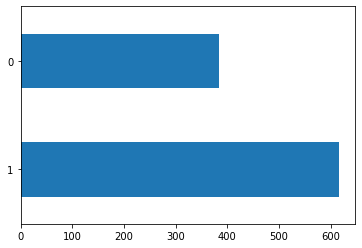

In [259]:
df["mode"].value_counts().plot.barh();

In [260]:
df.describe().T

count           mean           std           min  \
acousticness      1000.0       0.257183      0.292118      0.000003   
danceability      1000.0       0.598306      0.169390      0.000000   
duration_ms       1000.0  223686.193000  60016.777707  52600.000000   
energy            1000.0       0.622594      0.215598      0.000020   
instrumentalness  1000.0       0.066153      0.213646      0.000000   
liveness          1000.0       0.186408      0.150413      0.028000   
loudness          1000.0      -7.415329      4.313893    -38.643000   
mode              1000.0       0.617000      0.486362      0.000000   
popularity        1000.0      59.117000      9.755125      0.000000   
speechiness       1000.0       0.109291      0.110735      0.000000   
tempo             1000.0     121.351493     31.050428      0.000000   
valence           1000.0       0.439846      0.234399      0.000000   
year              1000.0    2015.500000      2.873719   2011.000000   

                            25%            50%            75%         max  
acousticness           0.025400       0.129000       0.429250       0.996  
danceability           0.497000       0.610000       0.722000       0.960  
duration_ms       191013.250000  215261.000000  248833.250000  644273.000  
energy                 0.492000       0.650500       0.784750       0.999  
instrumentalness       0.000000       0.000003       0.000674       0.999  
liveness               0.098875       0.123000       0.226000       0.959  
loudness              -8.500750      -6.450500      -4.992500      -1.432  
mode                   0.000000       1.000000       1.000000       1.000  
popularity            54.000000      59.000000      66.000000      81.000  
speechiness            0.037275       0.057350       0.140000       0.699  
tempo                 97.380500     120.013000     141.989500     215.669  
valence                0.269000       0.425000       0.603250       0.976  
year                2013.000000    2015.500000    2018.000000    2020.000

In [261]:
y = df["mode"]
X = df.drop(["mode"], axis=1)

In [262]:
#statsmodels
loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.649459
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   mode   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      988
Method:                           MLE   Df Model:                           11
Date:                Mon, 13 Jun 2022   Pseudo R-squ.:                 0.02412
Time:                        15:17:53   Log-Likelihood:                -649.46
converged:                       True   LL-Null:                       -665.51
Covariance Type:            nonrobust   LLR p-value:                 0.0007325
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
acousticness         0.2452      0.309      0.793      0.428      -0.361       0.851
danceability        -0.2577      0.492     -0.524      0.600      -1.221       0.706
duration_ms      -4.777e-07   1.16e-06     -0.413      0.680   -2.75e-06    1.79e-06
energy               0.0990      0.527      0.188      0.851      -0.934       1.132
instrumentalness    -1.0168      0.419     -2.424      0.015      -1.839      -0.195
liveness            -0.8906      0.451     -1.974      0.048      -1.775      -0.006
loudness            -0.0416      0.029     -1.437      0.151      -0.098       0.015
popularity          -0.0122      0.008     -1.615      0.106      -0.027       0.003
speechiness         -2.1311      0.627     -3.399      0.001      -3.360      -0.902
tempo                0.0032      0.002      1.457      0.145      -0.001       0.008
valence              0.0995      0.351      0.284      0.777      -0.588       0.787
year                 0.0005      0.000      1.190      0.234      -0.000       0.001
====================================================================================
"""

In [263]:
#scikit-learn
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [264]:
loj_model.intercept_

array([2.78555771e-07])

In [265]:
loj_model.coef_

array([[ 4.63681367e-05, -1.84801560e-05, -2.36192008e-07,
        -2.94284713e-05, -2.66949089e-05, -3.78804753e-05,
        -3.31395794e-04, -1.75173081e-03, -3.72675923e-05,
         2.35351706e-03, -5.52301873e-06,  1.71577433e-04]])

#### 5.3.1.2 Tahmin & Model Tuning
Lojistik regresyon için girilebilecek bir hiperparametre olmadığından model tuning değil de model doğrulama yapacağız.

In [266]:
y_pred = loj_model.predict(X)
confusion_matrix(y, y_pred)

array([[  0, 383],
       [  0, 617]], dtype=int64)

In [267]:
accuracy_score(y, y_pred)

0.617

In [268]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       383
           1       0.62      1.00      0.76       617

    accuracy                           0.62      1000
   macro avg       0.31      0.50      0.38      1000
weighted avg       0.38      0.62      0.47      1000



**modele ilişkin olasılık değerleri**

In [269]:
loj_model.predict(X)[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [270]:
y[0:10]

168909    0
168910    0
168911    1
168912    0
168913    1
168914    1
168915    1
168916    1
168917    1
168918    0
Name: mode, dtype: int64

In [271]:
#modele ilişkin olasılık değerleri. ilk sutun '0' ikinci sutun '1' sınıfına ait olma olasılık
loj_model.predict_proba(X)[0:10]

array([[0.37530181, 0.62469819],
       [0.37092714, 0.62907286],
       [0.37629247, 0.62370753],
       [0.36844995, 0.63155005],
       [0.36314641, 0.63685359],
       [0.39381834, 0.60618166],
       [0.38710469, 0.61289531],
       [0.38629794, 0.61370206],
       [0.38939248, 0.61060752],
       [0.3590513 , 0.6409487 ]])

#### esikleme isleminin el ile yapilmasi

In [272]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [273]:
y_probs[0:10]

array([0.62469819, 0.62907286, 0.62370753, 0.63155005, 0.63685359,
       0.60618166, 0.61289531, 0.61370206, 0.61060752, 0.6409487 ])

In [274]:
#esikleme isleminin el ile yapilmasi
y_pred = [1 if i > 0.62 else 0 for i in y_probs]

In [275]:
y_pred[0:10]

[1, 1, 1, 1, 1, 0, 0, 0, 0, 1]

#### raporlama

In [276]:
confusion_matrix(y, y_pred)

array([[231, 152],
       [346, 271]], dtype=int64)

In [277]:
accuracy_score(y, y_pred)

0.502

In [278]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.60      0.48       383
           1       0.64      0.44      0.52       617

    accuracy                           0.50      1000
   macro avg       0.52      0.52      0.50      1000
weighted avg       0.55      0.50      0.51      1000



In [279]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.62469819, 0.62907286, 0.62370753, 0.63155005, 0.63685359])

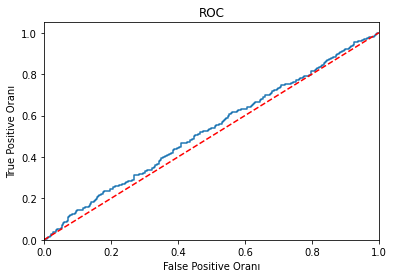

AUC= 0.5


In [280]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()
print("AUC=",logit_roc_auc)

In [281]:
#test train ayırma işlemi
#verisetindeki verisetinin azlığından, sınıfların eşit dağılmamasından dolayı
#test setini 30% olarak ayarladık
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

In [282]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [283]:
accuracy_score(y_test, loj_model.predict(X_test))

0.5933333333333334

In [284]:
cross_val_score(loj_model, X_test, y_test, cv = 10)

array([0.6       , 0.56666667, 0.56666667, 0.6       , 0.66666667,
       0.6       , 0.6       , 0.6       , 0.63333333, 0.6       ])

In [285]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.6033333333333333

### 5.3.2. Gaussian Naive Bayes
Olasılık temelli bir modelleme tekniğidir. Temel amaç belirli bir örneğin her bir sınıfa ait olma olasılığının koşullu olasılık temelli hesaplanmasıdır.

#### 5.3.2.1 Model

In [286]:
st = spotify.tail(1000)
df = st.select_dtypes(include = ["float64", "int64"])
df = df.drop("key", axis = 1)
y = df["mode"]
X = df.drop(["mode"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

In [287]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [288]:
nb_model.predict(X_test)[0:10]

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [289]:
nb_model.predict_proba(X_test)[0:10]

array([[0.50387965, 0.49612035],
       [0.48331922, 0.51668078],
       [0.51570855, 0.48429145],
       [0.27358742, 0.72641258],
       [0.48853286, 0.51146714],
       [0.48162353, 0.51837647],
       [0.49193675, 0.50806325],
       [0.45086336, 0.54913664],
       [0.50638842, 0.49361158],
       [0.43886451, 0.56113549]])

In [290]:
y_pred = nb_model.predict(X_test)

In [291]:
accuracy_score(y_test, y_pred)

0.59

In [292]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.5766666666666665

### 5.3.3 KNN
#### 5.3.3.1 Model

In [293]:
st = spotify.tail(1000)
df = st.select_dtypes(include = ["float64", "int64"])
df = df.drop("key", axis = 1)
y = df["mode"]
X = df.drop(["mode"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

In [294]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

#### 5.3.3.2 Tahmin

In [295]:
y_pred = knn_model.predict(X_test)

In [296]:
accuracy_score(y_test, y_pred)

0.5

In [297]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.16      0.20       122
           1       0.56      0.74      0.64       178

    accuracy                           0.50       300
   macro avg       0.42      0.45      0.42       300
weighted avg       0.45      0.50      0.46       300



#### 5.3.3.3 Model Tuning

In [298]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [299]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [300]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.6185714285714285
En iyi parametreler: {'n_neighbors': 45}


In [301]:
knn = KNeighborsClassifier(45)
knn_tuned = knn.fit(X_train, y_train)

In [302]:
knn_tuned.score(X_test, y_test)

0.5466666666666666

In [303]:
y_pred = knn_tuned.predict(X_test)

In [304]:
accuracy_score(y_test, y_pred)

0.5466666666666666

### 5.3.4 Yapay Sinir Ağları
İnsan beyninin bilgiyi işleme şeklini referans alan sınıflandırma ve regresyon problemleri için kullanılabilen kuvvetli makine öğrenmesi algoritmalarından bir tanesidir.

#### 5.3.4.1 Model

In [305]:
st = spotify.tail(1000)
df = st.select_dtypes(include = ["float64", "int64"])
df = df.drop("key", axis = 1)
y = df["mode"]
X = df.drop(["mode"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

In [306]:
scaler = StandardScaler()

In [307]:
#veri standardizasyonu
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [308]:
X_test_scaled[0:5]

array([[-6.10932483e-01,  1.82542514e+00,  1.28449009e-01,
         2.69570703e-03, -3.16263063e-01, -8.12728140e-01,
         7.19556701e-01,  8.34504968e-01,  1.68378944e+00,
        -1.06224710e+00,  1.84046035e+00,  1.72731724e-01],
       [ 1.42944864e+00,  1.05079145e+00,  6.96008933e-02,
        -1.12744466e+00, -3.15595395e-01,  1.80229172e-01,
        -6.61315112e-01,  1.05590102e+00, -6.46748150e-01,
        -5.67024991e-01, -8.17982941e-01,  8.73672053e-01],
       [-7.82572652e-01,  1.12121269e+00, -3.10835975e-01,
         2.69570703e-03, -2.93792582e-01, -4.84323155e-01,
        -7.06088366e-02,  7.23806943e-01, -3.84735048e-01,
         5.54575928e-01, -1.03071461e-01,  8.73672053e-01],
       [-4.55835945e-01, -2.55242893e+00, -7.72641136e-01,
         1.69561853e+00,  4.28373916e+00,  3.65138599e+00,
        -2.06610399e+00,  5.02410893e-01, -5.68603892e-01,
        -8.45857177e-01, -1.89672871e+00,  5.23201888e-01],
       [ 1.70517582e+00, -1.16160934e+00,  6.4112901

In [309]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [310]:
#modelden neler ogrenebiliriz? 
dir(mlpc)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_backprop',
 '_check_feature_names',
 '_check_n_features',
 '_check_solver',
 '_compute_loss_grad',
 '_estimator_type',
 '_fit',
 '_fit_lbfgs',
 '_fit_stochastic',
 '_forward_pass',
 '_forward_pass_fast',
 '_get_param_names',
 '_get_tags',
 '_init_coef',
 '_initialize',
 '_label_binarizer',
 '_loss_grad_lbfgs',
 '_more_tags',
 '_no_improvement_count',
 '_optimizer',
 '_random_state',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_unpack',
 '_update_no_improvement_count',
 '_validate_data',
 '_validate_hyperparameters',
 '_validate_inpu

#### 5.3.4.2 Tahmin

In [311]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.5766666666666667

#### 5.3.4.3 Model Tuning

In [312]:
mlpc

MLPClassifier()

In [313]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}

In [314]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 5, 
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [315]:
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

En iyi parametreler: {'activation': 'relu', 'alpha': 1e-05, 'hidden_layer_sizes': (100, 100), 'solver': 'sgd'}


In [316]:
mlpc_tuned = MLPClassifier(activation = "logistic", 
                           alpha = 0.01, 
                           hidden_layer_sizes = (3, 5),
                          solver = "adam")

In [317]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', alpha=0.01, hidden_layer_sizes=(3, 5))

In [318]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.5933333333333334

### 5.3.5 Karar Ağaçları / Classification and Regression Trees (CART)
Temel amaç veriseti içerisindeki karmaşık yapıları basit karar yapılarına dönüştürmektir.
Heterojen verisetleri belirlenmiş bir hedef değişkene göre homojen alt gruplara ayrılır.

#### 5.3.5.1 Model

In [319]:
st = spotify.tail(1000)
df = st.select_dtypes(include = ["float64", "int64"])
df = df.drop("key", axis = 1)
y = df["mode"]
X = df.drop(["mode"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

In [320]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

#### 5.3.5.2 Tahmin

In [321]:
cart_model

DecisionTreeClassifier()

In [322]:
#modelin python koduna donusturulmesi
print(skompile(cart_model.predict).to("python/code"))

((((1 if x[9] <= 50.52399826049805 else 0) if x[2] <= 168683.0 else (1 if x
    [6] <= -10.226500034332275 else 0) if x[6] <= -9.61899995803833 else 1 if
    x[1] <= 0.7350000143051147 else 0 if x[7] <= 55.5 else 1) if x[8] <= 
    0.030700000002980232 else (0 if x[1] <= 0.676499992609024 else 1) if x[
    8] <= 0.03140000067651272 else ((((((0 if x[3] <= 0.6435000002384186 else
    1) if x[6] <= -7.362500190734863 else 0) if x[6] <= -5.574000120162964 else
    1 if x[9] <= 124.55249786376953 else 0) if x[6] <= -4.42549991607666 else
    0) if x[9] <= 128.98149490356445 else 1 if x[3] <= 0.8360000252723694 else
    0 if x[1] <= 0.511000007390976 else 1) if x[9] <= 165.9749984741211 else
    0) if x[0] <= 0.0093899997882545 else ((0 if x[2] <= 182268.5 else (0 if
    x[10] <= 0.03775000013411045 else 1 if x[7] <= 60.5 else 1 if x[11] <= 
    2012.5 else 0) if x[6] <= -5.573499917984009 else 0 if x[6] <= 
    -5.0960001945495605 else 0 if x[9] <= 105.98799896240234 else 1) if x[
    11] 

In [323]:
x = [6,148,72,35,0,33.6,0.627,50,11,21.8,75,214]

In [324]:
((((1 if x[6] <= -15.274499416351318 else 0) if x[2] <= 168683.0 else (1 if
    x[6] <= -10.226500034332275 else 0) if x[6] <= -9.61899995803833 else 1 if
    x[1] <= 0.7350000143051147 else 0 if x[1] <= 0.7625000178813934 else 1) if
    x[8] <= 0.030700000002980232 else (0 if x[1] <= 0.676499992609024 else 
    1) if x[8] <= 0.03140000067651272 else ((((((1 if x[8] <= 
    0.041749998927116394 else 0) if x[6] <= -7.362500190734863 else 0) if x
    [6] <= -5.574000120162964 else 1 if x[9] <= 124.55249786376953 else 0) if
    x[6] <= -4.42549991607666 else 0) if x[9] <= 128.98149490356445 else 1 if
    x[3] <= 0.8360000252723694 else 0 if x[0] <= 0.0037749999901279807 else
    1) if x[9] <= 165.9749984741211 else 0) if x[0] <= 0.0093899997882545 else
    ((0 if x[2] <= 182268.5 else (0 if x[10] <= 0.03775000013411045 else 1 if
    x[4] <= 0.7650000154972076 else 0 if x[0] <= 0.6889999955892563 else 1) if
    x[6] <= -5.573499917984009 else (1 if x[4] <= 0.004249000128766056 else
    0) if x[2] <= 217467.0 else 0) if x[11] <= 2013.5 else (((1 if x[7] <= 
    64.0 else 0) if x[2] <= 104753.5 else (0 if x[6] <= -11.482500076293945
     else 1) if x[8] <= 0.03199999965727329 else 1) if x[10] <= 
    0.42899999022483826 else 0 if x[10] <= 0.4364999979734421 else (1 if x[
    3] <= 0.5509999990463257 else 0 if x[1] <= 0.784500002861023 else 1) if
    x[3] <= 0.651500016450882 else 1) if x[7] <= 74.0 else 0) if x[5] <= 
    0.1145000010728836 else (((1 if x[10] <= 0.1810000017285347 else (1 if 
    x[0] <= 0.04309999942779541 else 0 if x[4] <= 0.0005854999908478931 else
    1) if x[5] <= 0.21799999475479126 else 0 if x[6] <= -9.62399959564209 else
    (1 if x[7] <= 60.5 else 0) if x[0] <= 0.1251000016927719 else 1) if x[3
    ] <= 0.6394999921321869 else ((1 if x[8] <= 0.046299999579787254 else 0
    ) if x[2] <= 165191.5 else 1 if x[5] <= 0.7559999823570251 else 0 if x[
    5] <= 0.9044999778270721 else 1) if x[9] <= 159.0070037841797 else (0 if
    x[6] <= -3.862499952316284 else 1) if x[10] <= 0.6254999935626984 else 
    1) if x[4] <= 0.0035849999403581023 else 0 if x[4] <= 
    0.028500000946223736 else (0 if x[8] <= 0.05100000090897083 else 1) if 
    x[10] <= 0.455499991774559 else 1) if x[0] <= 0.6694999933242798 else (
    1 if x[4] <= 0.013199999928474426 else 1 if x[1] <= 0.2604999989271164 else
    0) if x[6] <= -10.460999965667725 else 0) if x[8] <= 
    0.054100001230835915 else (((((((1 if x[6] <= -23.104000091552734 else 
    0) if x[6] <= -15.592000007629395 else 1) if x[9] <= 155.79450225830078
     else 0) if x[3] <= 0.5800000131130219 else 1 if x[2] <= 126036.5 else 
    (((0 if x[4] <= 5.6999999742402e-07 else 1) if x[8] <= 
    0.07029999978840351 else 0) if x[4] <= 0.027836499517434277 else 1) if 
    x[9] <= 149.00900268554688 else 1) if x[2] <= 163727.5 else ((((0 if x[
    10] <= 0.7680000066757202 else 1) if x[2] <= 190967.0 else ((((1 if x[2
    ] <= 195477.5 else ((0 if x[2] <= 218606.5 else 1) if x[1] <= 
    0.7569999992847443 else 0) if x[3] <= 0.4860000014305115 else (1 if x[8
    ] <= 0.19550000876188278 else 0 if x[9] <= 126.99349975585938 else 1) if
    x[7] <= 50.5 else 0 if x[10] <= 0.5945000052452087 else 1 if x[10] <= 
    0.6710000038146973 else 0) if x[11] <= 2018.5 else 1 if x[9] <= 
    133.4010009765625 else 0 if x[9] <= 158.5145034790039 else 1) if x[3] <=
    0.8589999973773956 else 1) if x[1] <= 0.862500011920929 else 1) if x[0] <=
    0.5354999899864197 else 1 if x[11] <= 2019.0 else 0) if x[6] <= 
    -5.871000051498413 else 1) if x[6] <= -5.513000011444092 else 1 if x[5] <=
    0.05309999920427799 else ((1 if x[5] <= 0.39649998396635056 else 0) if 
    x[10] <= 0.3125 else 0 if x[9] <= 140.07349395751953 else 0 if x[5] <= 
    0.13649999722838402 else 1) if x[1] <= 0.5855000019073486 else (((0 if 
    x[6] <= -4.864499807357788 else ((1 if x[5] <= 0.20599999278783798 else
    0) if x[0] <= 0.10459999740123749 else 1) if x[11] <= 2016.5 else 0 if 
    x[11] <= 2019.5 else 0 if x[3] <= 0.6494999825954437 else 1) if x[0] <=
    0.6570000052452087 else 1) if x[8] <= 0.33799999952316284 else 1) if x[
    3] <= 0.9135000109672546 else 1) if x[4] <= 2.2849999368190765e-06 else
    (((0 if x[1] <= 0.39900000393390656 else 1) if x[9] <= 
    76.01950073242188 else 0) if x[7] <= 68.5 else 1) if x[6] <= 
    -11.270999908447266 else (((1 if x[6] <= -4.490499973297119 else 0) if 
    x[4] <= 8.805000106804073e-05 else (0 if x[10] <= 0.2510000020265579 else
    0 if x[4] <= 0.00018399999680696055 else 1) if x[10] <= 
    0.49549999833106995 else 0) if x[5] <= 0.09769999980926514 else (((0 if
    x[8] <= 0.2960500046610832 else 1) if x[11] <= 2011.5 else 1) if x[6] <=
    -7.703000068664551 else (1 if x[11] <= 2013.5 else 0) if x[2] <= 
    189513.0 else 1 if x[9] <= 94.01700210571289 else (0 if x[6] <= 
    -7.1000001430511475 else 1) if x[7] <= 53.5 else ((1 if x[10] <= 
    0.4794999957084656 else 0 if x[0] <= 0.05379999987781048 else 1 if x[0] <=
    0.3034999966621399 else 0) if x[6] <= -5.240999937057495 else 0 if x[3] <=
    0.973499983549118 else 1) if x[10] <= 0.5614999830722809 else 0) if x[5
    ] <= 0.48100000619888306 else 0 if x[3] <= 0.8499999940395355 else 1) if
    x[0] <= 0.6024999916553497 else 1 if x[9] <= 77.5620002746582 else 0) if
    x[10] <= 0.8779999911785126 else 1 if x[9] <= 158.70800018310547 else 0
    ) if x[9] <= 162.01749420166016 else (((1 if x[7] <= 55.0 else (0 if x[
    3] <= 0.7014999985694885 else 1) if x[4] <= 5.274999921311974e-06 else 
    0) if x[1] <= 0.4335000067949295 else 1) if x[0] <= 0.2775000035762787 else
    1 if x[11] <= 2014.5 else 0 if x[4] <= 0.00018250000357511453 else 0 if
    x[11] <= 2016.0 else 1) if x[6] <= -3.4809999465942383 else 1 if x[5] <=
    0.13074999675154686 else 0) if x[7] <= 74.5 else 0 if x[7] <= 79.5 else 1)

1

In [325]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.5833333333333334

#### 5.3.5.3 Model Tuning

In [326]:
cart_model

DecisionTreeClassifier()

In [327]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [328]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


In [329]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

En iyi parametreler: {'max_depth': 1, 'min_samples_split': 2}


In [330]:
#final
cart = tree.DecisionTreeClassifier(max_depth = 1, min_samples_split = 2)
cart_tuned = cart.fit(X_train, y_train)

In [331]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.5933333333333334

### 5.3.6 Random Forests
Temeli birden çok karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesidir.

Bagging (Breiman, 1996) ile Random Subspace (Ho, 1998) yöntemlerinin birleşimi ile oluşmuştur. 

Ağaçlar için gözlemler bootstrap rastgele örnek seçim yöntemi ile değişkenler random subspace yöntemi ile seçilir. 

Karar ağacının her bir düğümünde en iyi dallara ayırıcı (bilgi kazancı) değişken tüm değişkenler arasından rastgele seçilen daha az sayıdaki değişken arasından seçilir. 

Ağaç oluşturmada veri setinin 2/3'ü kullanılır. Dışarıda kalan veri ağaçların performans değerlendirmesi ve değişken öneminin belirlenmesi için kullanılır. 

Her düğüm noktasında rastgele değişken seçimi yapılır. (regresyon'da p/3, sınıflama'da karekök p) 

Nihai tahmin için ağaçlardan tahmin değerleri talep edilirken her bir ağacın daha önce hesaplanan hata oranları göz önüne alınarak ağaçlara ağırlık verilir. 

#### 5.3.6.1 Model

In [332]:
st = spotify.tail(1000)
df = st.select_dtypes(include = ["float64", "int64"])
df = df.drop("key", axis = 1)
y = df["mode"]
X = df.drop(["mode"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

In [333]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

#### 5.3.6.2 Tahmin

In [334]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.5933333333333334

#### 5.3.6.3 Model Tuning

In [335]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [336]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [337]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [338]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 2, 'max_features': 5, 'min_samples_split': 5, 'n_estimators': 10}


In [339]:
#final
rf_tuned = RandomForestClassifier(max_depth = 5, 
                                  max_features = 2, 
                                  min_samples_split = 5,
                                  n_estimators = 500)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=2, min_samples_split=5,
                       n_estimators=500)

In [340]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.5866666666666667

In [341]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

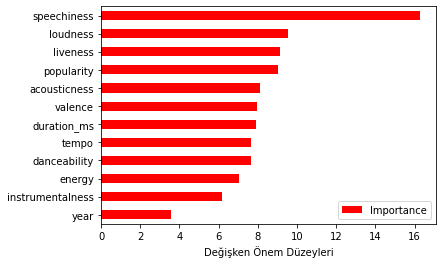

In [342]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

### 5.3.7 Gradient Boosting Machines (GBM)
AdaBoost'un sınıflandırma ve regresyon problemlerine kolayca uyarlanabilen genellenmiş bir versiyonudur.

Adaptive Boosting (AdaBoost) zayıf sınıflandırıcıların bir araya gelerek güçlü bir sınıflandırıcı oluşturması için geliştirilen bir yöntemdir.

• Gradient boosting tek bir tahminsel model formunda olan modeller serisi oluşturur. 

• Seri içerisindeki bir model serideki bir önceki modelin tahmin artıklarının/ hatalarının (residuals) üzerine kurularak (fit) oluşturulur. 

• GBM diferansiyellenebilen herhangi bir kayıp fonksiyonunu optimize edebilen Gradient descent algoritmasını kullanmaktadır. 

• GB bir çok temel öğrenici tipi (base learner type) kullanabilir. (Trees, linear terms, splines,...) 

• Cost fonksiyonları ve link fonksiyonları modifiye edilebilirdir. 

• Boosting + Gradient Descent 

#### 5.3.7.1 Model

In [343]:
st = spotify.tail(1000)
df = st.select_dtypes(include = ["float64", "int64"])
df = df.drop("key", axis = 1)
y = df["mode"]
X = df.drop(["mode"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

In [344]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

#### 5.3.7.2 Tahmin

In [345]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.5666666666666667

#### 5.3.7.3 Model Tuning

In [346]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [347]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)

In [348]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 100]},
             verbose=2)

In [349]:
print("En iyi parametreler: " + str(gbm_cv.best_params_))

En iyi parametreler: {'learning_rate': 0.001, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}


In [350]:
gbm = GradientBoostingClassifier(learning_rate = 0.001, 
                                 max_depth = 3,
                                min_samples_split = 2,
                                n_estimators = 100)

In [351]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [352]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.5933333333333334

### 5.3.8 XGBoost (eXtreme Gradient Boosting)
XGBoost, GBM'in hız ve tahmin performansını arttırmak üzere optimize edilmiş; ölçeklenebilir ve farklı platformlara entegre edilebilir halidir.
    
    R, Python, Hadoop, Scala, Julia ile kullanılabilir
    Ölçeklenebilir
    Hızlı
    Tahmin başarısı yüksek
    Birçok kaggle yarışmasında başarısını kanıtlamış.

#### 5.3.8.1 Model

In [353]:
st = spotify.tail(1000)
df = st.select_dtypes(include = ["float64", "int64"])
df = df.drop("key", axis = 1)
y = df["mode"]
X = df.drop(["mode"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

In [354]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [355]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

#### 5.3.8.2 Tahmin

In [356]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.58

#### 5.3.8.3 Model Tuning

In [357]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}

In [358]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)

In [359]:
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
[15:45:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [360]:
xgb_cv_model.best_params_

{'learning_rate': 0.02,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 0.8}

In [361]:
xgb = XGBClassifier(learning_rate = 0.02, 
                    max_depth = 3,
                    min_samples_split = 2,
                    n_estimators = 100,
                    subsample = 0.8)

In [362]:
xgb_tuned =  xgb.fit(X_train,y_train)

[15:45:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [363]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.5733333333333334

### 5.3.9 Light GBM

Light GBM, XGBoost'un eğitim süresini azaltmaya yönelik geliştirilmiş bir diğer GBM türüdür.

2017 yılında Microsoft tarafından geliştirilmiştir.

    Daha performanslıdır.
    Level-wise büyüme stratejisi yerine Leaf-wise büyüme stratejisi kullanır.
    Breadth-first search (BSF) yerine depth-first search (DFS) arama algoritmasını kullanır.

In [364]:
st = spotify.tail(1000)
df = st.select_dtypes(include = ["float64", "int64"])
df = df.drop("key", axis = 1)
y = df["mode"]
X = df.drop(["mode"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

In [365]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

#### 5.3.9.2 Tahmin

In [366]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.58

#### 5.3.9.3 Model Tuning

In [367]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [368]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2)

In [369]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


GridSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_samples': [5, 10, 20],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [370]:
lgbm_cv_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 4,
 'min_child_samples': 10,
 'n_estimators': 100,
 'subsample': 0.6}

In [371]:
lgbm = LGBMClassifier(learning_rate = 0.01, 
                       max_depth = 4,
                       subsample = 0.6,
                       n_estimators = 100,
                       min_child_samples = 10)

In [372]:
lgbm_tuned = lgbm.fit(X_train,y_train)

In [373]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.6

### 5.3.10 CatBoost

Kategorik değişkenler ile otomatik olarak ücadele edebilen, hızlı, başarılı bir diğer GBM türevidir.
2017 yılında Yandex tarafından geliştirilmiştir.

    Kategorik değişken desteği vardır.
    Hızlı ve ölçeklenebilir GPU desteği vardır.
    Hızlı train ve hızlı tahmin yapar

#### 5.3.10.1 Model

In [374]:
st = spotify.tail(1000)
df = st.select_dtypes(include = ["float64", "int64"])
df = df.drop("key", axis = 1)
y = df["mode"]
X = df.drop(["mode"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

In [375]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

Learning rate set to 0.008847
0:	learn: 0.6920749	total: 54.9ms	remaining: 54.9s
1:	learn: 0.6907705	total: 57.3ms	remaining: 28.6s
2:	learn: 0.6894809	total: 59.7ms	remaining: 19.8s
3:	learn: 0.6878315	total: 62.1ms	remaining: 15.5s
4:	learn: 0.6865020	total: 64.4ms	remaining: 12.8s
5:	learn: 0.6848765	total: 66.9ms	remaining: 11.1s
6:	learn: 0.6835775	total: 69.4ms	remaining: 9.85s
7:	learn: 0.6821397	total: 71.8ms	remaining: 8.9s
8:	learn: 0.6808084	total: 74.2ms	remaining: 8.17s
9:	learn: 0.6797612	total: 76.6ms	remaining: 7.58s
10:	learn: 0.6787197	total: 78.9ms	remaining: 7.1s
11:	learn: 0.6775477	total: 81.2ms	remaining: 6.69s
12:	learn: 0.6763058	total: 83.6ms	remaining: 6.34s
13:	learn: 0.6749673	total: 85.9ms	remaining: 6.05s
14:	learn: 0.6738827	total: 88.2ms	remaining: 5.79s
15:	learn: 0.6724134	total: 90.6ms	remaining: 5.57s
16:	learn: 0.6714680	total: 93.1ms	remaining: 5.38s
17:	learn: 0.6706138	total: 95.4ms	remaining: 5.21s
18:	learn: 0.6692308	total: 97.8ms	remaining: 

196:	learn: 0.5410172	total: 497ms	remaining: 2.02s
197:	learn: 0.5405851	total: 499ms	remaining: 2.02s
198:	learn: 0.5400657	total: 501ms	remaining: 2.02s
199:	learn: 0.5396962	total: 504ms	remaining: 2.01s
200:	learn: 0.5394791	total: 506ms	remaining: 2.01s
201:	learn: 0.5388186	total: 508ms	remaining: 2.01s
202:	learn: 0.5383963	total: 510ms	remaining: 2s
203:	learn: 0.5379243	total: 513ms	remaining: 2s
204:	learn: 0.5372206	total: 515ms	remaining: 2s
205:	learn: 0.5367700	total: 517ms	remaining: 1.99s
206:	learn: 0.5364367	total: 519ms	remaining: 1.99s
207:	learn: 0.5358929	total: 522ms	remaining: 1.99s
208:	learn: 0.5352723	total: 524ms	remaining: 1.98s
209:	learn: 0.5348877	total: 526ms	remaining: 1.98s
210:	learn: 0.5343256	total: 529ms	remaining: 1.98s
211:	learn: 0.5338695	total: 531ms	remaining: 1.97s
212:	learn: 0.5333707	total: 533ms	remaining: 1.97s
213:	learn: 0.5326659	total: 535ms	remaining: 1.97s
214:	learn: 0.5323664	total: 538ms	remaining: 1.96s
215:	learn: 0.5318859

430:	learn: 0.4484376	total: 1.01s	remaining: 1.33s
431:	learn: 0.4482218	total: 1.01s	remaining: 1.33s
432:	learn: 0.4480013	total: 1.01s	remaining: 1.33s
433:	learn: 0.4476340	total: 1.02s	remaining: 1.33s
434:	learn: 0.4472576	total: 1.02s	remaining: 1.32s
435:	learn: 0.4469118	total: 1.02s	remaining: 1.32s
436:	learn: 0.4467002	total: 1.02s	remaining: 1.32s
437:	learn: 0.4464066	total: 1.03s	remaining: 1.32s
438:	learn: 0.4460123	total: 1.03s	remaining: 1.31s
439:	learn: 0.4456613	total: 1.03s	remaining: 1.31s
440:	learn: 0.4454994	total: 1.03s	remaining: 1.31s
441:	learn: 0.4451976	total: 1.03s	remaining: 1.31s
442:	learn: 0.4448157	total: 1.04s	remaining: 1.3s
443:	learn: 0.4444719	total: 1.04s	remaining: 1.3s
444:	learn: 0.4440445	total: 1.04s	remaining: 1.3s
445:	learn: 0.4437351	total: 1.04s	remaining: 1.3s
446:	learn: 0.4434215	total: 1.05s	remaining: 1.3s
447:	learn: 0.4429541	total: 1.05s	remaining: 1.29s
448:	learn: 0.4425948	total: 1.05s	remaining: 1.29s
449:	learn: 0.442

661:	learn: 0.3788159	total: 1.53s	remaining: 780ms
662:	learn: 0.3785719	total: 1.53s	remaining: 778ms
663:	learn: 0.3781477	total: 1.53s	remaining: 775ms
664:	learn: 0.3777781	total: 1.53s	remaining: 773ms
665:	learn: 0.3775059	total: 1.54s	remaining: 771ms
666:	learn: 0.3773887	total: 1.54s	remaining: 768ms
667:	learn: 0.3771849	total: 1.54s	remaining: 766ms
668:	learn: 0.3770135	total: 1.54s	remaining: 764ms
669:	learn: 0.3767491	total: 1.54s	remaining: 761ms
670:	learn: 0.3764982	total: 1.55s	remaining: 759ms
671:	learn: 0.3763062	total: 1.55s	remaining: 757ms
672:	learn: 0.3759889	total: 1.55s	remaining: 754ms
673:	learn: 0.3756145	total: 1.55s	remaining: 752ms
674:	learn: 0.3754390	total: 1.56s	remaining: 750ms
675:	learn: 0.3751259	total: 1.56s	remaining: 747ms
676:	learn: 0.3748127	total: 1.56s	remaining: 745ms
677:	learn: 0.3745387	total: 1.56s	remaining: 743ms
678:	learn: 0.3742011	total: 1.57s	remaining: 741ms
679:	learn: 0.3739519	total: 1.57s	remaining: 738ms
680:	learn: 

820:	learn: 0.3359560	total: 1.87s	remaining: 408ms
821:	learn: 0.3356630	total: 1.87s	remaining: 406ms
822:	learn: 0.3353015	total: 1.87s	remaining: 403ms
823:	learn: 0.3348954	total: 1.88s	remaining: 401ms
824:	learn: 0.3347020	total: 1.88s	remaining: 399ms
825:	learn: 0.3345441	total: 1.88s	remaining: 396ms
826:	learn: 0.3342987	total: 1.88s	remaining: 394ms
827:	learn: 0.3339888	total: 1.89s	remaining: 392ms
828:	learn: 0.3336785	total: 1.89s	remaining: 390ms
829:	learn: 0.3333088	total: 1.89s	remaining: 387ms
830:	learn: 0.3331302	total: 1.89s	remaining: 385ms
831:	learn: 0.3328855	total: 1.9s	remaining: 383ms
832:	learn: 0.3327056	total: 1.9s	remaining: 380ms
833:	learn: 0.3325551	total: 1.9s	remaining: 378ms
834:	learn: 0.3323014	total: 1.9s	remaining: 376ms
835:	learn: 0.3319749	total: 1.9s	remaining: 374ms
836:	learn: 0.3318190	total: 1.91s	remaining: 371ms
837:	learn: 0.3316731	total: 1.91s	remaining: 369ms
838:	learn: 0.3314648	total: 1.91s	remaining: 367ms
839:	learn: 0.331

978:	learn: 0.2969048	total: 2.21s	remaining: 47.5ms
979:	learn: 0.2967023	total: 2.21s	remaining: 45.2ms
980:	learn: 0.2964937	total: 2.22s	remaining: 43ms
981:	learn: 0.2962578	total: 2.22s	remaining: 40.7ms
982:	learn: 0.2961678	total: 2.22s	remaining: 38.4ms
983:	learn: 0.2960437	total: 2.22s	remaining: 36.2ms
984:	learn: 0.2957533	total: 2.23s	remaining: 33.9ms
985:	learn: 0.2954564	total: 2.23s	remaining: 31.7ms
986:	learn: 0.2951784	total: 2.23s	remaining: 29.4ms
987:	learn: 0.2950728	total: 2.23s	remaining: 27.1ms
988:	learn: 0.2948980	total: 2.24s	remaining: 24.9ms
989:	learn: 0.2945803	total: 2.24s	remaining: 22.6ms
990:	learn: 0.2943578	total: 2.24s	remaining: 20.4ms
991:	learn: 0.2940596	total: 2.24s	remaining: 18.1ms
992:	learn: 0.2938181	total: 2.25s	remaining: 15.8ms
993:	learn: 0.2937017	total: 2.25s	remaining: 13.6ms
994:	learn: 0.2934821	total: 2.25s	remaining: 11.3ms
995:	learn: 0.2932118	total: 2.25s	remaining: 9.04ms
996:	learn: 0.2929422	total: 2.25s	remaining: 6.

#### 5.3.10.2 Tahmin

In [376]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6

#### 5.3.10.3 Model Tuning

In [377]:
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8] }

In [378]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=10, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)
catb_cv_model.best_params_

Fitting 10 folds for each of 18 candidates, totalling 180 fits
0:	learn: 0.6923325	total: 2.38ms	remaining: 1.19s
1:	learn: 0.6914766	total: 4.86ms	remaining: 1.21s
2:	learn: 0.6905975	total: 6.46ms	remaining: 1.07s
3:	learn: 0.6894530	total: 7.48ms	remaining: 927ms
4:	learn: 0.6885471	total: 8.47ms	remaining: 838ms
5:	learn: 0.6876863	total: 9.48ms	remaining: 781ms
6:	learn: 0.6869955	total: 10.5ms	remaining: 738ms
7:	learn: 0.6859039	total: 11.5ms	remaining: 707ms
8:	learn: 0.6852478	total: 12.5ms	remaining: 683ms
9:	learn: 0.6843243	total: 13.6ms	remaining: 664ms
10:	learn: 0.6834794	total: 14.6ms	remaining: 649ms
11:	learn: 0.6825904	total: 15.5ms	remaining: 632ms
12:	learn: 0.6817093	total: 16.6ms	remaining: 621ms
13:	learn: 0.6810320	total: 17.7ms	remaining: 613ms
14:	learn: 0.6802013	total: 18.6ms	remaining: 600ms
15:	learn: 0.6795595	total: 19.5ms	remaining: 590ms
16:	learn: 0.6785873	total: 20.5ms	remaining: 582ms
17:	learn: 0.6779423	total: 21.4ms	remaining: 574ms
18:	learn: 

313:	learn: 0.5973530	total: 318ms	remaining: 189ms
314:	learn: 0.5972612	total: 319ms	remaining: 188ms
315:	learn: 0.5972026	total: 321ms	remaining: 187ms
316:	learn: 0.5970433	total: 322ms	remaining: 186ms
317:	learn: 0.5969613	total: 323ms	remaining: 185ms
318:	learn: 0.5967578	total: 324ms	remaining: 184ms
319:	learn: 0.5966064	total: 325ms	remaining: 183ms
320:	learn: 0.5963772	total: 325ms	remaining: 181ms
321:	learn: 0.5961852	total: 326ms	remaining: 180ms
322:	learn: 0.5960425	total: 327ms	remaining: 179ms
323:	learn: 0.5958473	total: 328ms	remaining: 178ms
324:	learn: 0.5954827	total: 329ms	remaining: 177ms
325:	learn: 0.5952544	total: 330ms	remaining: 176ms
326:	learn: 0.5951672	total: 331ms	remaining: 175ms
327:	learn: 0.5950286	total: 332ms	remaining: 174ms
328:	learn: 0.5948316	total: 333ms	remaining: 173ms
329:	learn: 0.5947069	total: 334ms	remaining: 172ms
330:	learn: 0.5945157	total: 335ms	remaining: 171ms
331:	learn: 0.5944359	total: 336ms	remaining: 170ms
332:	learn: 

489:	learn: 0.5713975	total: 481ms	remaining: 9.81ms
490:	learn: 0.5712670	total: 482ms	remaining: 8.83ms
491:	learn: 0.5711504	total: 483ms	remaining: 7.85ms
492:	learn: 0.5709814	total: 484ms	remaining: 6.87ms
493:	learn: 0.5708379	total: 485ms	remaining: 5.89ms
494:	learn: 0.5707030	total: 486ms	remaining: 4.91ms
495:	learn: 0.5705908	total: 487ms	remaining: 3.92ms
496:	learn: 0.5705543	total: 487ms	remaining: 2.94ms
497:	learn: 0.5704716	total: 488ms	remaining: 1.96ms
498:	learn: 0.5703200	total: 489ms	remaining: 980us
499:	learn: 0.5701065	total: 490ms	remaining: 0us


{'depth': 3, 'iterations': 500, 'learning_rate': 0.01}

In [379]:
catb_cv_model.best_params_

{'depth': 3, 'iterations': 500, 'learning_rate': 0.01}

In [380]:
catb = CatBoostClassifier(iterations = 500, 
                          learning_rate = 0.01, 
                          depth = 3)

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

0:	learn: 0.6923325	total: 14.3ms	remaining: 7.11s
1:	learn: 0.6914766	total: 15.4ms	remaining: 3.83s
2:	learn: 0.6905975	total: 16.3ms	remaining: 2.7s
3:	learn: 0.6894530	total: 17.3ms	remaining: 2.14s
4:	learn: 0.6885471	total: 18.3ms	remaining: 1.81s
5:	learn: 0.6876863	total: 19.3ms	remaining: 1.59s
6:	learn: 0.6869955	total: 20.3ms	remaining: 1.43s
7:	learn: 0.6859039	total: 21.4ms	remaining: 1.31s
8:	learn: 0.6852478	total: 22.6ms	remaining: 1.23s
9:	learn: 0.6843243	total: 23.8ms	remaining: 1.17s
10:	learn: 0.6834794	total: 24.9ms	remaining: 1.11s
11:	learn: 0.6825904	total: 25.9ms	remaining: 1.05s
12:	learn: 0.6817093	total: 27ms	remaining: 1.01s
13:	learn: 0.6810320	total: 28.3ms	remaining: 981ms
14:	learn: 0.6802013	total: 29.3ms	remaining: 949ms
15:	learn: 0.6795595	total: 30.7ms	remaining: 930ms
16:	learn: 0.6785873	total: 32ms	remaining: 911ms
17:	learn: 0.6779423	total: 33.3ms	remaining: 891ms
18:	learn: 0.6773414	total: 34.4ms	remaining: 871ms
19:	learn: 0.6763504	total:

245:	learn: 0.6079321	total: 260ms	remaining: 269ms
246:	learn: 0.6077758	total: 261ms	remaining: 268ms
247:	learn: 0.6076021	total: 262ms	remaining: 267ms
248:	learn: 0.6074434	total: 263ms	remaining: 265ms
249:	learn: 0.6073583	total: 264ms	remaining: 264ms
250:	learn: 0.6071455	total: 266ms	remaining: 264ms
251:	learn: 0.6069298	total: 267ms	remaining: 263ms
252:	learn: 0.6068071	total: 268ms	remaining: 262ms
253:	learn: 0.6066770	total: 269ms	remaining: 261ms
254:	learn: 0.6065888	total: 270ms	remaining: 260ms
255:	learn: 0.6063975	total: 271ms	remaining: 258ms
256:	learn: 0.6062000	total: 272ms	remaining: 257ms
257:	learn: 0.6060857	total: 273ms	remaining: 256ms
258:	learn: 0.6058789	total: 274ms	remaining: 255ms
259:	learn: 0.6057710	total: 275ms	remaining: 254ms
260:	learn: 0.6056716	total: 276ms	remaining: 253ms
261:	learn: 0.6055593	total: 277ms	remaining: 251ms
262:	learn: 0.6054858	total: 278ms	remaining: 250ms
263:	learn: 0.6054169	total: 279ms	remaining: 249ms
264:	learn: 

418:	learn: 0.5812268	total: 422ms	remaining: 81.7ms
419:	learn: 0.5811382	total: 423ms	remaining: 80.6ms
420:	learn: 0.5808536	total: 424ms	remaining: 79.7ms
421:	learn: 0.5806582	total: 425ms	remaining: 78.6ms
422:	learn: 0.5805788	total: 426ms	remaining: 77.6ms
423:	learn: 0.5803773	total: 427ms	remaining: 76.6ms
424:	learn: 0.5802334	total: 428ms	remaining: 75.6ms
425:	learn: 0.5801427	total: 429ms	remaining: 74.6ms
426:	learn: 0.5800253	total: 430ms	remaining: 73.5ms
427:	learn: 0.5799106	total: 431ms	remaining: 72.5ms
428:	learn: 0.5798502	total: 432ms	remaining: 71.5ms
429:	learn: 0.5796538	total: 433ms	remaining: 70.5ms
430:	learn: 0.5794450	total: 434ms	remaining: 69.5ms
431:	learn: 0.5792685	total: 435ms	remaining: 68.4ms
432:	learn: 0.5791568	total: 436ms	remaining: 67.4ms
433:	learn: 0.5790669	total: 437ms	remaining: 66.4ms
434:	learn: 0.5788998	total: 438ms	remaining: 65.4ms
435:	learn: 0.5787725	total: 439ms	remaining: 64.4ms
436:	learn: 0.5787034	total: 440ms	remaining: 

In [381]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.6033333333333334

# 5.3.11 Tüm Modellerin Karşılaştırılması

In [382]:
modeller = [
    loj_model,
    nb_model,
    knn_tuned,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    xgb_tuned,
    lgbm_tuned,
    catb_tuned 
]


for model in modeller:
    if(model!=mlpc_tuned):
        y_pred = model.predict(X_test)
    else:
        y_pred = model.predict(X_test_scaled)
    
    
    dogruluk = accuracy_score(y_test, y_pred)
    isimler = model.__class__.__name__
    print("-"*30)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

------------------------------
LogisticRegression:
Accuracy: 59.3333%
------------------------------
GaussianNB:
Accuracy: 59.0000%
------------------------------
KNeighborsClassifier:
Accuracy: 54.6667%
------------------------------
MLPClassifier:
Accuracy: 59.3333%
------------------------------
DecisionTreeClassifier:
Accuracy: 59.3333%
------------------------------
RandomForestClassifier:
Accuracy: 58.6667%
------------------------------
GradientBoostingClassifier:
Accuracy: 59.3333%
------------------------------
XGBClassifier:
Accuracy: 57.3333%
------------------------------
LGBMClassifier:
Accuracy: 60.0000%
------------------------------
CatBoostClassifier:
Accuracy: 60.3333%


**Not:** Yapay sinir ağlarında X setlerini scale ettiğimizden onu ayirdik

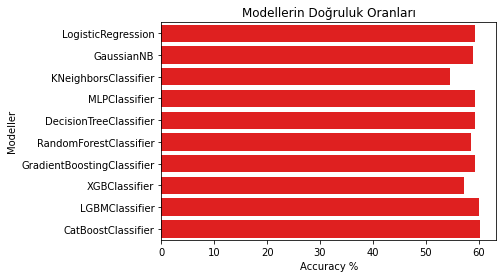

In [383]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    if(model!=mlpc_tuned):
        y_pred = model.predict(X_test)
    else:
        y_pred = model.predict(X_test_scaled)
        
        
    dogruluk = accuracy_score(y_test, y_pred)    
    isimler = model.__class__.__name__
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları'); 

### 5.3.12 Modellerin Kaydedilmesi ve Tekrar Kullanılması

In [384]:
# Save Model Using Pickle
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle
#uzak sunucudan datanin cekilmesi
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)
# Fit the model on training set
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

**Modelin Kaydedilmesi**

In [385]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

**Modelin Tekrar Kullanılması**

In [386]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.7874015748031497


# 6. GÖZETİMSİZ ÖĞRENME
Makine öğrenmesi modellerinde, bağımlı değişkenin elimizde olmadığı durumlarda gözlem birimlerinin bir şekilde anlamlı bir hale getirilme çabası olarak nitelendirebiliriz.

Bu bölümde:
    
    K-means
    Hiyerarşik Kümeleme Analizi
    Temel Bileşen Analizi

In [387]:
!pip install --upgrade matplotlib --user
!pip install yellowbrick --user

In [388]:
from warnings import filterwarnings
filterwarnings('ignore')

### 6.1 K-Means
Temel amaç, gözlemleri birbirine olan benzerliklerini kullanarak kümelere ayırmaktır.
İşlem adımları:

    1. Küme sayısını belirle
    2. Rastgele k merkezi seç
    3. Her gözlem için k merkezlerine olan uzaklıkları hesapla
    4. Gözlemleri kendilerine en yakın k merkezine ata
    5. Atama işleminden sonra oluşan kümeler için tekrar küme merkezi hesapla
    6. belirlenen iterasyon kadar işlemi tekrarla, küme içi hata değerinin en küçük olduğu durumdaki gözlemlerin kümelenme yapısını nihai kümelenme olarak seç
    

#### 6.1.1 K-MEANS Model

In [389]:
kmeans = KMeans(n_clusters = 4)
kmeans

KMeans(n_clusters=4)

In [390]:
k_fit = kmeans.fit(df)

In [391]:
k_fit.n_clusters

4

In [392]:
k_fit.cluster_centers_

array([[ 2.34608021e-01,  6.10786517e-01,  2.13243854e+05,
         6.48160963e-01,  3.60176296e-02,  1.81120225e-01,
        -6.66867790e+00,  6.21722846e-01,  5.97453184e+01,
         1.06924719e-01,  1.23275062e+02,  4.65760000e-01,
         2.01570787e+03],
       [ 2.67603167e-01,  5.08602381e-01,  4.03002167e+05,
         6.14826190e-01,  1.50497406e-01,  2.35980952e-01,
        -8.23683333e+00,  6.42857143e-01,  5.65000000e+01,
         1.12073810e-01,  1.23451786e+02,  3.20057143e-01,
         2.01369048e+03],
       [ 3.32281699e-01,  6.20850515e-01,  1.51813072e+05,
         5.43570022e-01,  1.46309244e-01,  1.79222680e-01,
        -9.36625773e+00,  6.18556701e-01,  6.14123711e+01,
         1.23063402e-01,  1.15343577e+02,  4.57641546e-01,
         2.01678351e+03],
       [ 2.44348993e-01,  5.66694783e-01,  2.75809339e+05,
         6.31308522e-01,  5.31085943e-02,  1.95691739e-01,
        -7.35327826e+00,  6.00000000e-01,  5.62000000e+01,
         1.02658696e-01,  1.21569483e

In [393]:
k_fit.labels_

array([3, 2, 3, 0, 2, 3, 1, 0, 3, 3, 3, 2, 2, 1, 3, 0, 0, 0, 3, 3, 1, 2,
       2, 3, 3, 3, 0, 3, 3, 0, 0, 3, 1, 3, 2, 3, 3, 0, 0, 0, 3, 0, 0, 0,
       3, 3, 0, 3, 0, 2, 3, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 1, 0, 3, 2, 0, 1, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 3, 1,
       2, 2, 0, 0, 3, 0, 0, 0, 3, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0,
       1, 3, 0, 3, 0, 0, 3, 0, 3, 1, 3, 0, 0, 0, 3, 0, 3, 3, 1, 3, 0, 3,
       0, 0, 0, 2, 0, 3, 0, 0, 3, 3, 3, 2, 3, 3, 0, 3, 3, 3, 0, 3, 0, 0,
       0, 3, 0, 1, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 3, 1, 0, 3,
       3, 3, 0, 1, 0, 3, 3, 0, 3, 1, 3, 0, 2, 3, 0, 3, 2, 3, 3, 3, 3, 3,
       2, 0, 0, 3, 0, 0, 3, 3, 2, 0, 0, 0, 0, 0, 2, 0, 2, 1, 3, 3, 3, 0,
       0, 0, 0, 1, 3, 0, 0, 2, 2, 3, 1, 0, 3, 0, 3, 0, 1, 0, 2, 3, 0, 3,
       0, 2, 3, 0, 3, 0, 3, 3, 0, 0, 0, 1, 1, 3, 0, 2, 1, 0, 3, 3, 0, 0,
       3, 0, 3, 0, 0, 3, 1, 0, 0, 3, 2, 0, 0, 0, 3, 3, 0, 3, 1, 3, 0, 3,
       3, 0, 3, 0, 0, 2, 0, 1, 3, 0, 3, 2, 0, 0, 3,

#### 6.1.2 Görsellestirme

In [394]:
#iki degisken uzerinden gorsellestirme yapalim (2 boyutta veriyi gorebilmek icin)
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(df)

In [395]:
kumeler = k_fit.labels_

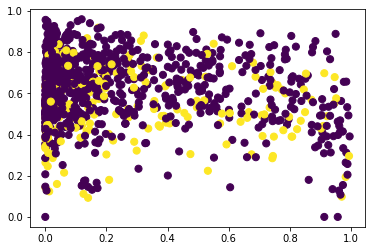

In [396]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")

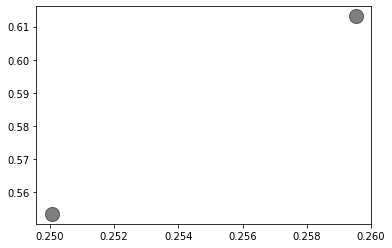

In [397]:
merkezler = k_fit.cluster_centers_

plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);

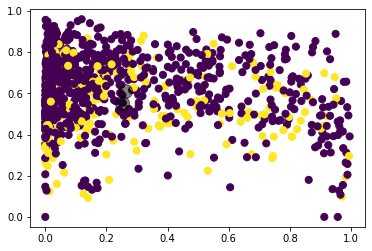

In [398]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")
merkezler = k_fit.cluster_centers_
plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);

In [399]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_
merkezler = kmeans.cluster_centers_

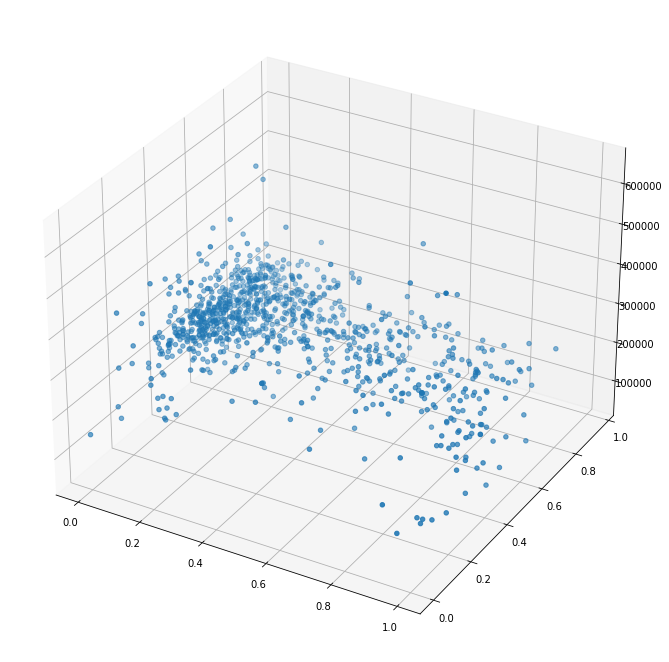

In [400]:
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2]);

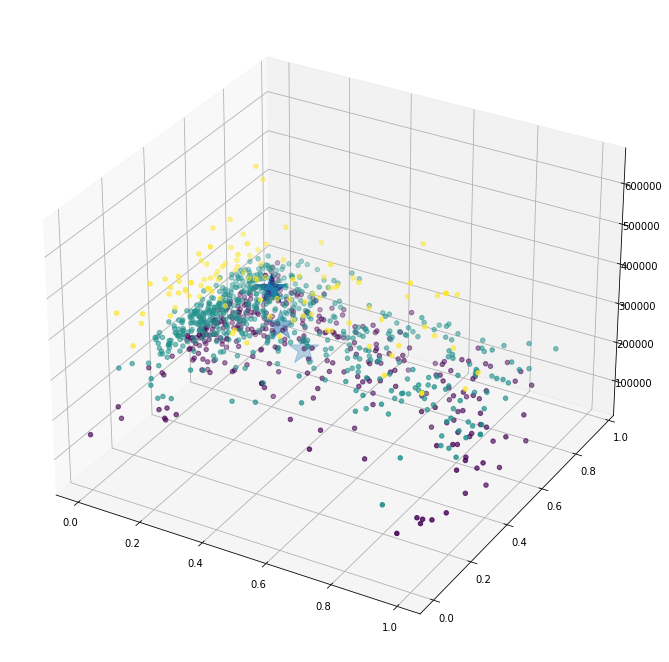

In [401]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2],  c=kumeler)
ax.scatter(merkezler[:, 0], merkezler[:, 1], merkezler[:, 2], 
           marker='*', 
           s=1000);

#### 6.1.3 Kümeler ve gözlem birimleri

In [402]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_

In [403]:
pd.DataFrame({"no" : df.index, "Kumeler": kumeler})[0:10]

no  Kumeler
0  168909        0
1  168910        1
2  168911        2
3  168912        0
4  168913        1
5  168914        0
6  168915        2
7  168916        0
8  168917        2
9  168918        0

In [404]:
df["kume_no"] = kumeler

In [405]:
df.head()

acousticness  danceability  duration_ms  energy  instrumentalness  \
168909      0.012600         0.515       255240   0.697          0.000343   
168910      0.000009         0.573       139920   0.956          0.000000   
168911      0.001160         0.570       307893   0.923          0.000009   
168912      0.008030         0.638       221027   0.709          0.000002   
168913      0.414000         0.777       103493   0.111          0.000000   

        liveness  loudness  mode  popularity  speechiness    tempo  valence  \
168909    0.0912    -5.850     0          54       0.0313  134.893    0.513   
168910    0.1300    -4.629     0          52       0.0800  129.956    0.754   
168911    0.1410    -3.433     1          49       0.0630  135.006    0.403   
168912    0.3350    -5.464     0          54       0.0390  143.984    0.913   
168913    0.4590   -14.423     1          53       0.3350  139.888    0.556   

        year  kume_no  
168909  2011        0  
168910  2011        1  
168911  2011        2  
168912  2011        0  
168913  2011        1

In [406]:
df["kume_no"] = df["kume_no"] + 1

In [407]:
df.head()

acousticness  danceability  duration_ms  energy  instrumentalness  \
168909      0.012600         0.515       255240   0.697          0.000343   
168910      0.000009         0.573       139920   0.956          0.000000   
168911      0.001160         0.570       307893   0.923          0.000009   
168912      0.008030         0.638       221027   0.709          0.000002   
168913      0.414000         0.777       103493   0.111          0.000000   

        liveness  loudness  mode  popularity  speechiness    tempo  valence  \
168909    0.0912    -5.850     0          54       0.0313  134.893    0.513   
168910    0.1300    -4.629     0          52       0.0800  129.956    0.754   
168911    0.1410    -3.433     1          49       0.0630  135.006    0.403   
168912    0.3350    -5.464     0          54       0.0390  143.984    0.913   
168913    0.4590   -14.423     1          53       0.3350  139.888    0.556   

        year  kume_no  
168909  2011        1  
168910  2011        2  
168911  2011        3  
168912  2011        1  
168913  2011        2

#### 6.1.4 Optimum Kume Sayısının Belirlenmesi

In [408]:
st = spotify.tail(100)
df = st.select_dtypes(include = ["float64", "int64"])
df = df.drop("key", axis = 1)
df = df.iloc[:,1:14]
df.index.name = None
df.head()

danceability  duration_ms  energy  instrumentalness  liveness  \
169809         0.234       207532   0.604               0.0    0.0795   
169810         0.606       207617   0.613               0.0    0.1250   
169811         0.440       181533   0.306               0.0    0.1030   
169812         0.456       149053   0.496               0.0    0.1340   
169813         0.629       193747   0.539               0.0    0.1890   

        loudness  mode  popularity  speechiness    tempo  valence  year  
169809    -4.975     1          71       0.0556   76.724    0.126  2020  
169810    -6.758     1          78       0.0306  123.943    0.258  2020  
169811    -8.947     1          69       0.0363  117.288    0.201  2020  
169812    -6.986     1          72       0.0743   90.552    0.450  2020  
169813    -7.006     0          71       0.0630  109.885    0.316  2020

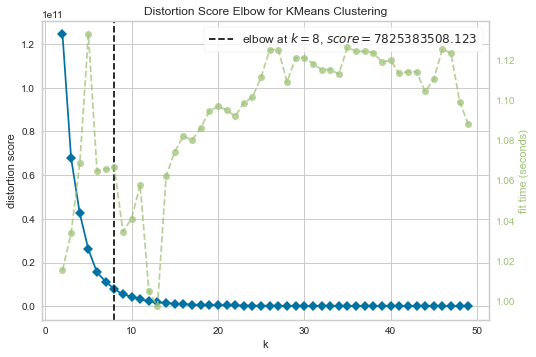

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [409]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,50))
visualizer.fit(df) 
visualizer.poof() 

In [410]:
visualizer.elbow_value_

8

**Not:** burada optimum değer 9 görünüyor ancak verisetinin durumu, elde edilmek istenen sonuç ve veriseti hakkında on bilgi de göz önünde bulunarak alınan uzman kararı burada çok önemlidir. 

In [411]:
kmeans = KMeans(n_clusters = 9)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_

In [412]:
pd.DataFrame({"no" : st.index, "Kumeler": kumeler})[0:10]

no  Kumeler
0  169809        0
1  169810        0
2  169811        8
3  169812        3
4  169813        8
5  169814        0
6  169815        7
7  169816        5
8  169817        3
9  169818        5

### 6.4.2 Hiyerarşik Kümeleme

Temel amaç, gözlemleri birbirine olan benzerliklerini kullanarak alt kümelere ayırmaktır.

Agglomerative Hierarchical Clustering işlem adımları:

    Başlangıçta gözlem sayısı kadar küme vardır.
    1. Veriseti içinde birbirine en yakın olan iki gözlemi bul
    2. Bulunan iki noktayı bir araya getir ve yeni bir küme oluştur.
    3. Aynı işlemi tek bir küme kalıncaya kadar tekrarla

In [413]:
st = spotify.tail(100)
df = st.select_dtypes(include = ["float64", "int64"])
df = df.drop("key", axis = 1)
df = df.iloc[:,1:14]
df.index.name = None
df.head()

danceability  duration_ms  energy  instrumentalness  liveness  \
169809         0.234       207532   0.604               0.0    0.0795   
169810         0.606       207617   0.613               0.0    0.1250   
169811         0.440       181533   0.306               0.0    0.1030   
169812         0.456       149053   0.496               0.0    0.1340   
169813         0.629       193747   0.539               0.0    0.1890   

        loudness  mode  popularity  speechiness    tempo  valence  year  
169809    -4.975     1          71       0.0556   76.724    0.126  2020  
169810    -6.758     1          78       0.0306  123.943    0.258  2020  
169811    -8.947     1          69       0.0363  117.288    0.201  2020  
169812    -6.986     1          72       0.0743   90.552    0.450  2020  
169813    -7.006     0          71       0.0630  109.885    0.316  2020

In [414]:
#hiyerarşik kümeleme için metodlar
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")
hc_single = linkage(df, "single")

In [415]:
hc_complete

array([[3.80000000e+01, 4.00000000e+01, 1.00000000e+00, 2.00000000e+00],
       [3.70000000e+01, 4.20000000e+01, 2.00000000e+00, 2.00000000e+00],
       [3.90000000e+01, 1.00000000e+02, 3.00000000e+00, 3.00000000e+00],
       [6.10000000e+01, 7.90000000e+01, 1.17558846e+01, 2.00000000e+00],
       [4.50000000e+01, 6.70000000e+01, 5.03996401e+01, 2.00000000e+00],
       [6.40000000e+01, 9.00000000e+01, 7.83764436e+01, 2.00000000e+00],
       [3.00000000e+00, 5.60000000e+01, 8.01158099e+01, 2.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 9.75037006e+01, 2.00000000e+00],
       [6.30000000e+01, 9.40000000e+01, 1.02145478e+02, 2.00000000e+00],
       [7.50000000e+01, 9.30000000e+01, 1.18583207e+02, 2.00000000e+00],
       [9.60000000e+01, 9.80000000e+01, 1.60342117e+02, 2.00000000e+00],
       [2.00000000e+01, 2.40000000e+01, 1.74419208e+02, 2.00000000e+00],
       [2.10000000e+01, 9.10000000e+01, 1.75427369e+02, 2.00000000e+00],
       [1.10000000e+01, 1.08000000e+02, 1.84896794e

In [416]:
dir(hc_complete)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

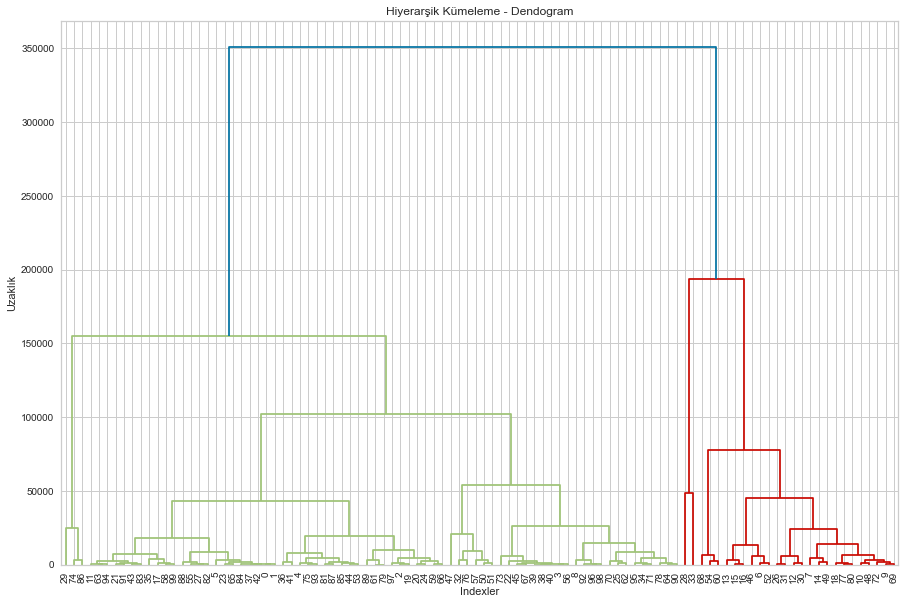

In [417]:
#dendogramın oluşturulması
plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    leaf_font_size=10
);

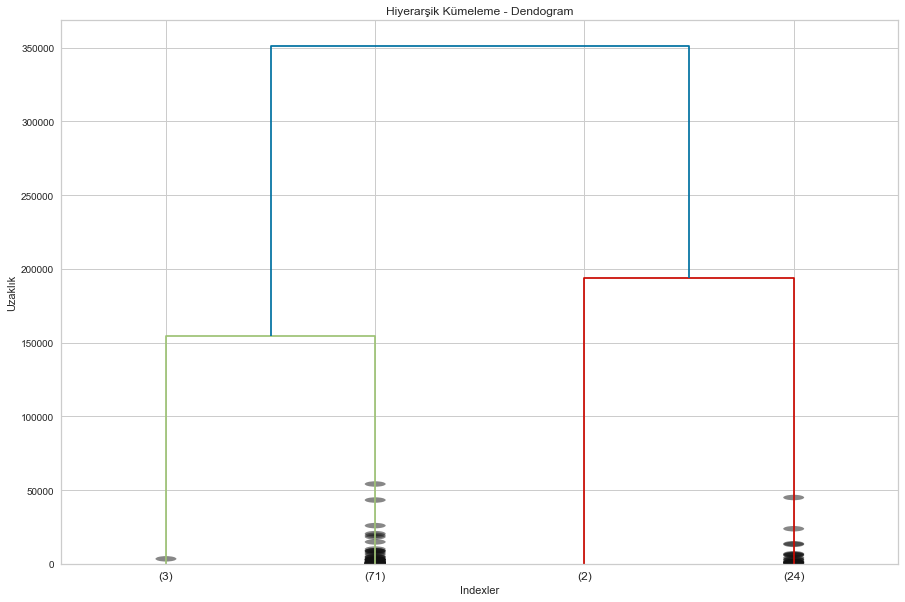

In [418]:
#son 4 kümeyi göster

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    truncate_mode = "lastp",
    p = 4,
    show_contracted = True
);

#### 4.2.1. Optimum Küme Sayısının Belirlenmesi

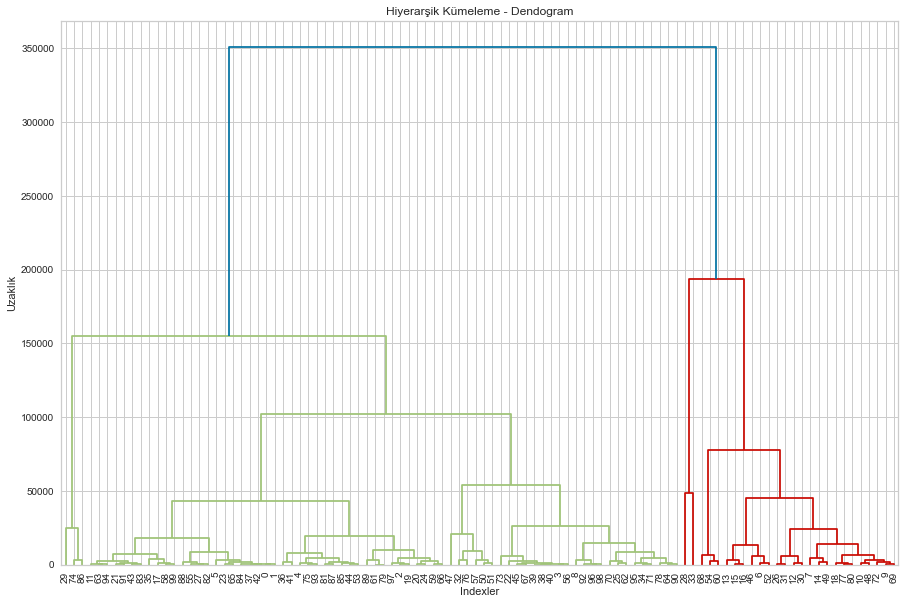

In [419]:
plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
den = dendrogram(
    hc_complete,
    leaf_font_size=10
);

In [420]:
#ustteki grafikte uzaklik kısmında 100.000 dogrultusuna bakarak 6 uygun olabilir denilebilir. 
#uzman yorumuyla birlikte farkli değerler de seçilebilir
cluster = AgglomerativeClustering(n_clusters = 6, 
                                  affinity = "euclidean", 
                                  linkage = "ward")

cluster.fit_predict(df)

array([3, 3, 5, 1, 5, 3, 0, 3, 1, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 5, 5, 3,
       1, 3, 5, 1, 0, 3, 2, 4, 0, 0, 1, 2, 1, 3, 5, 3, 1, 1, 1, 5, 3, 3,
       5, 1, 0, 1, 0, 3, 1, 1, 0, 5, 0, 3, 1, 1, 3, 5, 0, 5, 1, 3, 1, 3,
       5, 1, 0, 0, 1, 1, 0, 1, 4, 5, 1, 0, 1, 5, 0, 5, 3, 3, 3, 5, 4, 5,
       3, 5, 1, 3, 1, 5, 3, 1, 1, 5, 1, 3], dtype=int64)

In [421]:
pd.DataFrame({"no" : df.index, "Kumeler": cluster.fit_predict(df)})[0:10]

no  Kumeler
0  169809        3
1  169810        3
2  169811        5
3  169812        1
4  169813        5
5  169814        3
6  169815        0
7  169816        3
8  169817        1
9  169818        0

In [422]:
df["kume_no"] = cluster.fit_predict(df)

In [423]:
df.head()

danceability  duration_ms  energy  instrumentalness  liveness  \
169809         0.234       207532   0.604               0.0    0.0795   
169810         0.606       207617   0.613               0.0    0.1250   
169811         0.440       181533   0.306               0.0    0.1030   
169812         0.456       149053   0.496               0.0    0.1340   
169813         0.629       193747   0.539               0.0    0.1890   

        loudness  mode  popularity  speechiness    tempo  valence  year  \
169809    -4.975     1          71       0.0556   76.724    0.126  2020   
169810    -6.758     1          78       0.0306  123.943    0.258  2020   
169811    -8.947     1          69       0.0363  117.288    0.201  2020   
169812    -6.986     1          72       0.0743   90.552    0.450  2020   
169813    -7.006     0          71       0.0630  109.885    0.316  2020   

        kume_no  
169809        3  
169810        3  
169811        5  
169812        1  
169813        5

### 6.4.3 PCA (Temel Bileşen Analizi)

Temel fikir, çok değişkenli verinin ana özelliklerini daha az sayıda değişken ile temsil etmektir. Değişken boyutunu azaltma yöntemine gider.

In [424]:
st = spotify.tail(100)
df = st.select_dtypes(include = ["float64", "int64"])
df = df.drop("key", axis = 1)
df = df.iloc[:,1:14]
df.index.name = None
df.head()

danceability  duration_ms  energy  instrumentalness  liveness  \
169809         0.234       207532   0.604               0.0    0.0795   
169810         0.606       207617   0.613               0.0    0.1250   
169811         0.440       181533   0.306               0.0    0.1030   
169812         0.456       149053   0.496               0.0    0.1340   
169813         0.629       193747   0.539               0.0    0.1890   

        loudness  mode  popularity  speechiness    tempo  valence  year  
169809    -4.975     1          71       0.0556   76.724    0.126  2020  
169810    -6.758     1          78       0.0306  123.943    0.258  2020  
169811    -8.947     1          69       0.0363  117.288    0.201  2020  
169812    -6.986     1          72       0.0743   90.552    0.450  2020  
169813    -7.006     0          71       0.0630  109.885    0.316  2020

In [425]:
#veri standardizasyonu
df = StandardScaler().fit_transform(df)
df[0:14,0:14]

array([[-2.53020657,  0.20050581,  0.10984478, -0.14799393, -0.68562628,
         0.78137332,  0.76635604,  0.50619907, -0.69976234, -1.47437777,
        -1.57737469,  0.        ],
       [-0.30442894,  0.20215488,  0.16259841, -0.14799393, -0.31014187,
         0.00310348,  0.76635604,  0.81245607, -0.87734897,  0.05978826,
        -1.00194028,  0.        ],
       [-1.29765229, -0.30389632, -1.63688652, -0.14799393, -0.49169477,
        -0.95238316,  0.76635604,  0.41869707, -0.83685922, -0.15643561,
        -1.25042332,  0.        ],
       [-1.20191992, -0.93403522, -0.52319878, -0.14799393, -0.23587023,
        -0.09641729,  0.76635604,  0.54995007, -0.56692755, -1.02509999,
        -0.16494478,  0.        ],
       [-0.16681366, -0.0669346 , -0.27115366, -0.14799393,  0.21801202,
        -0.10514718, -1.30487651,  0.50619907, -0.6471967 , -0.39696233,
        -0.74909789,  0.        ],
       [-1.59681595,  0.17280143,  1.20008646, -0.14775099,  0.30878847,
         1.03366719, -

In [426]:
#herhangi bir boyut indirgemesi yapmadan tum degiskenler icin bilesen olusturalim
pca = PCA()
pca_fit = pca.fit_transform(df)

In [427]:
bilesen_df = pd.DataFrame(data = pca_fit)
bilesen_df.head()

0         1         2         3         4         5         6   \
0  1.980824 -1.915806  0.760952 -0.017351 -1.832273  0.076977 -0.557587   
1  0.814683 -0.969202  0.287489 -0.511858 -0.756840  0.556923  0.184507   
2  2.557027  0.193827  0.190503 -0.235097 -0.776089  0.804483  0.252056   
3  1.128787 -0.035127  0.912574 -0.490256 -1.152293 -0.214802  0.245195   
4  0.397682 -0.004702 -0.160138  0.119449 -0.545517 -0.190496 -1.189546   

         7         8         9         10   11  
0  0.932503  0.544857 -0.230508 -0.696353 -0.0  
1 -0.430371 -0.293148  0.047835  0.405589 -0.0  
2  0.111386 -0.668189 -0.345413 -0.344348  0.0  
3  0.626165 -0.226999 -0.694243 -0.508558  0.0  
4  0.114263 -1.058206  0.422856  0.155574  0.0

In [428]:
pca.explained_variance_ratio_

array([0.2165367 , 0.14665362, 0.11273407, 0.10559773, 0.09379556,
       0.08131496, 0.07666557, 0.05916631, 0.05543043, 0.03484977,
       0.01725528, 0.        ])

**Not:** birinci bilesenin versetindeki varyansı açıklayabilme oranı 0.22590137, 2. bileşenin  versetindeki varyansı açıklayabilme oranı 0.15615671, ...

In [429]:
#2 bilesen verisetindeki varyansin yaklasik 86%'sini ifade ediyor. 2 bilesene indirgedik
pca = PCA(n_components = 2)
pca_fit = pca.fit_transform(df)

In [430]:
bilesen_df = pd.DataFrame(data = pca_fit, 
                          columns = ["birinci_bilesen","ikinci_bilesen"])
bilesen_df.head()

birinci_bilesen  ikinci_bilesen
0         1.980824       -1.915806
1         0.814683       -0.969202
2         2.557027        0.193827
3         1.128787       -0.035127
4         0.397682       -0.004702

In [431]:
pca.explained_variance_ratio_

array([0.2165367 , 0.14665362])

**Not:** birinci bilesenin versetindeki varyansı açıklayabilme oranı 0.22590137, 2. bileşenin  versetindeki varyansı açıklayabilme oranı 0.15615671, ...

In [432]:
pca = PCA().fit(df)

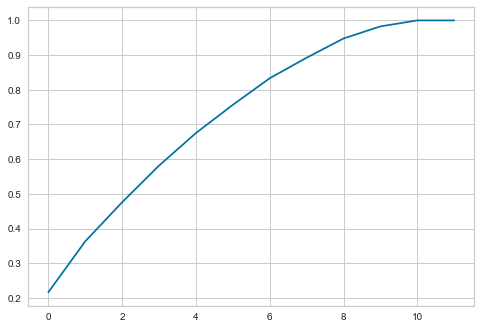

In [433]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

**Not:** yukarıdaki grafik incelendiğinde (x ekseni 0=1, 1=2 gibi düşünelim) 6 bileşen kullandığımızda verisetinin 95%'sinden fazlasını açıklayabiliyoruz anlamına gelir.

# 7. SONUÇ

Verisetimizde popülerliği etkileyen pek çok değişken bulunmaktadır. Girilen ve oluşan çıktı değerlerini incelediğimizde son zamanlarda çıkan şarkıların popülerliğinin çok daha fazla olduğunu görüyoruz. Mantıken de böyle olması şaşırtıcı değil. Bunun yanında son zamanlarda enerjik ve dans edilebilirliği yüksek olan şarkıların daha fazla revaçta olduğunu görüyoruz. Bu şekilde yeni çıkacak olan şarkıların ne kadar tutabileceğini ve parçadan elde edilebilecek kar satışlarını tahmin etmek mümkün olacaktır. 